In [2]:
import pandas as pd
import numpy as np
import requests
import zipfile
import os
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder , StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import (
    GridSearchCV , cross_val_score,
    RandomizedSearchCV , cross_validate,
    StratifiedKFold
)
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

 

In [3]:
from credit_card_default_utils  import *

In [4]:
raw_df =  ReadRawData()
raw_df.head()

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1      20000    2          2         1   24      2      2     -1     -1   
1   2     120000    2          2         2   26     -1      2      0      0   
2   3      90000    2          2         2   34      0      0      0      0   
3   4      50000    2          2         1   37      0      0      0      0   
4   5      50000    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...          0          0          0         0       689         0   
1  ...       3272       3455       3261         0      1000      1000   
2  ...      14331      14948      15549      1518      1500      1000   
3  ...      28314      28959      29547      2000      2019      1200   
4  ...      20940      19146      19131      2000     36681     10000   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
0         0         0         0                           1  
1      1000         0      2000                           1  
2      1000      1000      5000                           0  
3      1100      1069      1000                           0  
4      9000       689       679                           0  

[5 rows x 25 columns]

In [5]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [6]:
raw_df.ID.nunique()

30000

La colonne ID identifie de manière unique chaque observation de la dataframe. Donc chaque ligne de la dataframe correspond à un seul client. Voici la signification de chaque variable (Source : https://www.kaggle.com/datasets/uciml/default-of-credit-card-clients-dataset) :

- ***ID*** : Identifiant de chaque client

- ***LIMIT_BAL*** : Montant du crédit accordé en dollars taïwanais (comprend le crédit individuel et le crédit familial/complémentaire)

- ***SEX*** : Sexe (1=homme, 2=femme)

- ***EDUCATION*** : Niveau d'éducation (1=diplômé d'une école supérieure, 2=université, 3=lycée, 4=autre, 5=inconnu, 6=inconnu)

- ***MARRIAGE*** : Statut matrimonial (1=marié, 2=célibataire, 3=autre)

- ***AGE*** : Âge en années

- ***PAY_0*** : Statut de paiement en septembre 2005 (-1=paiement régulier, 1=retard de paiement d'un mois, 2=retard de paiement de deux mois, … 8=retard de paiement de huit mois, 9=retard de paiement de neuf mois et plus)

- ***PAY_2*** : Statut de paiement en août 2005 (échelle identique à celle ci-dessus)

- ***PAY_3*** : Statut de paiement en juillet 2005 (échelle identique à celle ci-dessus)

- ***PAY_4*** : Statut de paiement en juin 2005 (échelle identique à celle ci-dessus)

- ***PAY_5*** : Statut de paiement en mai 2005 (échelle identique à celle ci-dessus)

- ***PAY_6*** : Statut de paiement en avril 2005 (échelle identique à celle ci-dessus)

- ***BILL_AMT1*** : Montant de la facture en septembre 2005 (en dollars taïwanais)

- ***BILL_AMT2*** : Montant de la facture en août 2005 (en dollars taïwanais)

- ***BILL_AMT3*** : Montant de la facture en juillet 2005 (en dollars taïwanais)

- ***BILL_AMT4*** : Montant de la facture en juin 2005 (en dollars taïwanais)

- ***BILL_AMT5*** : Montant de la facture en mai 2005 (en dollars taïwanais)

- ***BILL_AMT6*** : Montant de la facture en avril 2005 (en dollars taïwanais)

- ***PAY_AMT1*** : Montant du paiement précédent en septembre 2005 (en dollars taïwanais)

- ***PAY_AMT2*** : Montant du paiement précédent en août 2005 (en dollars taïwanais)

- ***PAY_AMT3*** : Montant du paiement précédent en juillet 2005 (en dollars taïwanais)

- ***PAY_AMT4*** : Montant du paiement précédent en juin 2005 (en dollars taïwanais)

- ***PAY_AMT5*** : Montant du paiement précédent en mai 2005 (en dollars taïwanais)

- ***PAY_AMT6*** : Montant du paiement précédent en avril 2005 (en dollars taïwanais)

- ***default payment next month*** : Défaut de paiement (1=oui, 0=non)

In [7]:
df = FormattageRawData()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   id                          30000 non-null  int64   
 1   limit_bal                   30000 non-null  int64   
 2   sex                         30000 non-null  category
 3   education                   30000 non-null  category
 4   marriage                    30000 non-null  category
 5   age                         30000 non-null  int64   
 6   payment_status_sep          30000 non-null  category
 7   payment_status_aug          30000 non-null  category
 8   payment_status_jul          30000 non-null  category
 9   payment_status_jun          30000 non-null  category
 10  payment_status_may          30000 non-null  category
 11  payment_status_apr          30000 non-null  category
 12  bill_statement_sep          30000 non-null  int64   
 13  bill_statement_a

In [9]:
df ['payment_status_sep']

0        2
1       -1
2        0
3        0
4       -1
        ..
29995    0
29996   -1
29997    4
29998    1
29999    0
Name: payment_status_sep, Length: 30000, dtype: category
Categories (12, int64): [-2 < -1 < 0 < 1 ... 6 < 7 < 8 < 9]

In [10]:
df['sex']

0        Female
1        Female
2        Female
3        Female
4          Male
          ...  
29995      Male
29996      Male
29997      Male
29998      Male
29999      Male
Name: sex, Length: 30000, dtype: category
Categories (2, object): ['Female', 'Male']

## Analyse exploratoire des données

In [11]:
df.describe().T

count           mean            std       min  \
id                    30000.0   15000.500000    8660.398374       1.0   
limit_bal             30000.0  167484.322667  129747.661567   10000.0   
age                   30000.0      35.485500       9.217904      21.0   
bill_statement_sep    30000.0   51223.330900   73635.860576 -165580.0   
bill_statement_aug    30000.0   49179.075167   71173.768783  -69777.0   
bill_statement_jul    30000.0   47013.154800   69349.387427 -157264.0   
bill_statement_jun    30000.0   43262.948967   64332.856134 -170000.0   
bill_statement_may    30000.0   40311.400967   60797.155770  -81334.0   
bill_statement_apr    30000.0   38871.760400   59554.107537 -339603.0   
previous_payment_sep  30000.0    5663.580500   16563.280354       0.0   
previous_payment_aug  30000.0    5921.163500   23040.870402       0.0   
previous_payment_jul  30000.0    5225.681500   17606.961470       0.0   
previous_payment_jun  30000.0    4826.076867   15666.159744       0.0   
previous_payment_may  30000.0    4799.387633   15278.305679       0.0   
previous_payment_apr  30000.0    5215.502567   17777.465775       0.0   

                           25%       50%        75%        max  
id                     7500.75   15000.5   22500.25    30000.0  
limit_bal             50000.00  140000.0  240000.00  1000000.0  
age                      28.00      34.0      41.00       79.0  
bill_statement_sep     3558.75   22381.5   67091.00   964511.0  
bill_statement_aug     2984.75   21200.0   64006.25   983931.0  
bill_statement_jul     2666.25   20088.5   60164.75  1664089.0  
bill_statement_jun     2326.75   19052.0   54506.00   891586.0  
bill_statement_may     1763.00   18104.5   50190.50   927171.0  
bill_statement_apr     1256.00   17071.0   49198.25   961664.0  
previous_payment_sep   1000.00    2100.0    5006.00   873552.0  
previous_payment_aug    833.00    2009.0    5000.00  1684259.0  
previous_payment_jul    390.00    1800.0    4505.00   896040.0  
previous_payment_jun    296.00    1500.0    4013.25   621000.0  
previous_payment_may    252.50    1500.0    4031.50   426529.0  
previous_payment_apr    117.75    1500.0    4000.00   528666.0

In [12]:
df.describe(include=['category']).T

count unique         top   freq
sex                         30000      2      Female  18112
education                   30000      4  University  14030
marriage                    30000      3      Single  15964
payment_status_sep          30000     11           0  14737
payment_status_aug          30000     11           0  15730
payment_status_jul          30000     11           0  15764
payment_status_jun          30000     11           0  16455
payment_status_may          30000     10           0  16947
payment_status_apr          30000     10           0  16286
default_payment_next_month  30000      2           0  23364

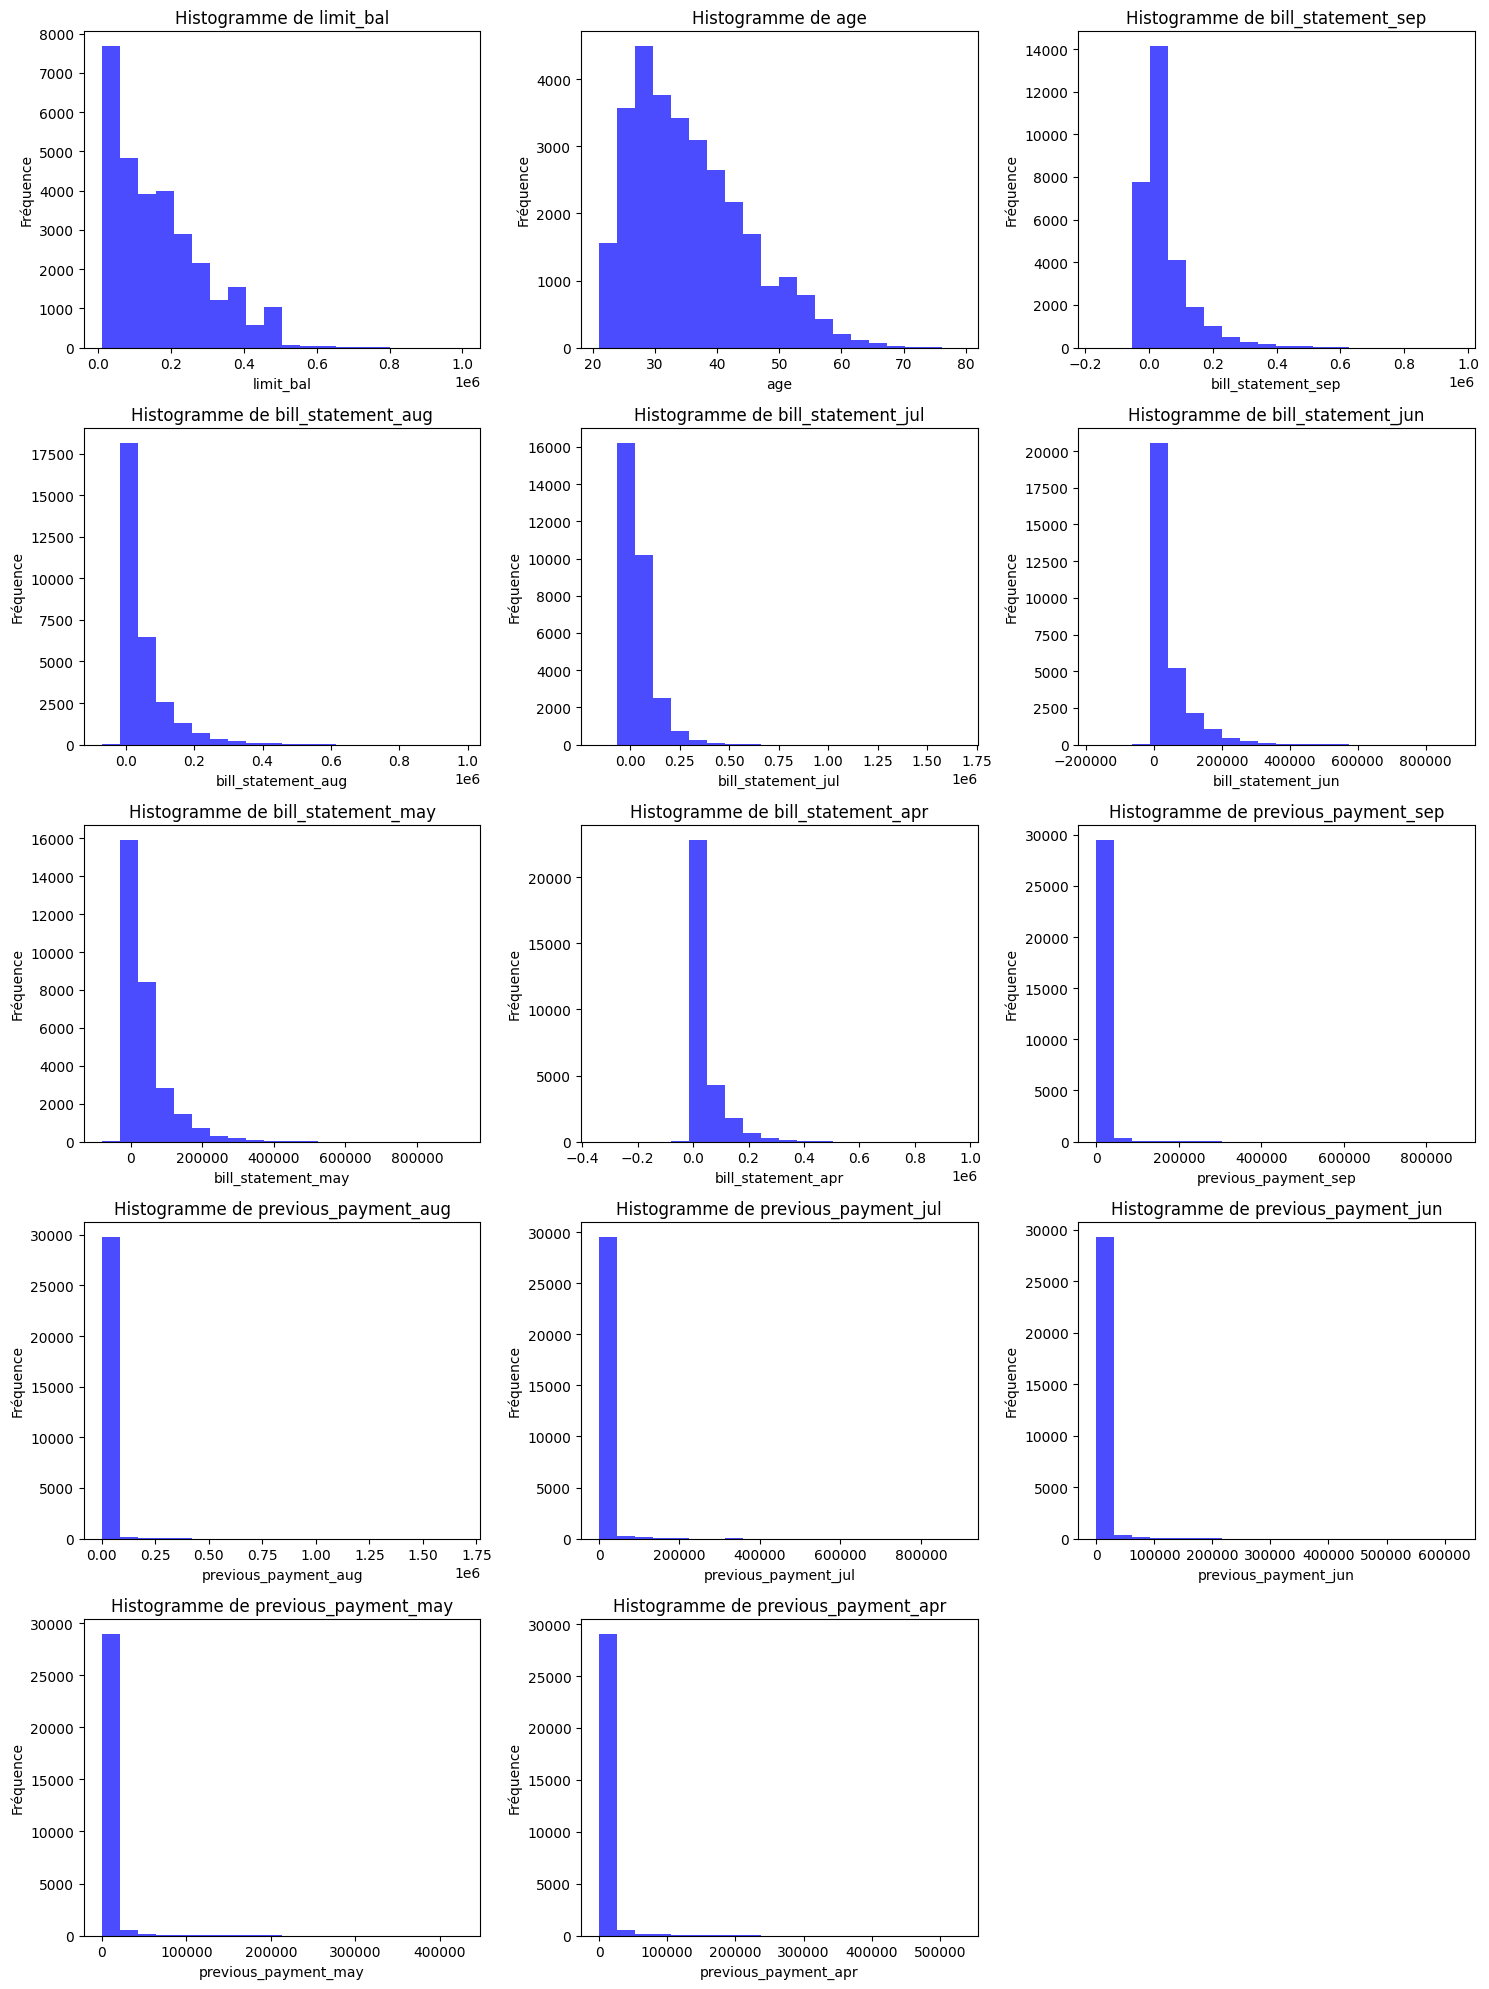

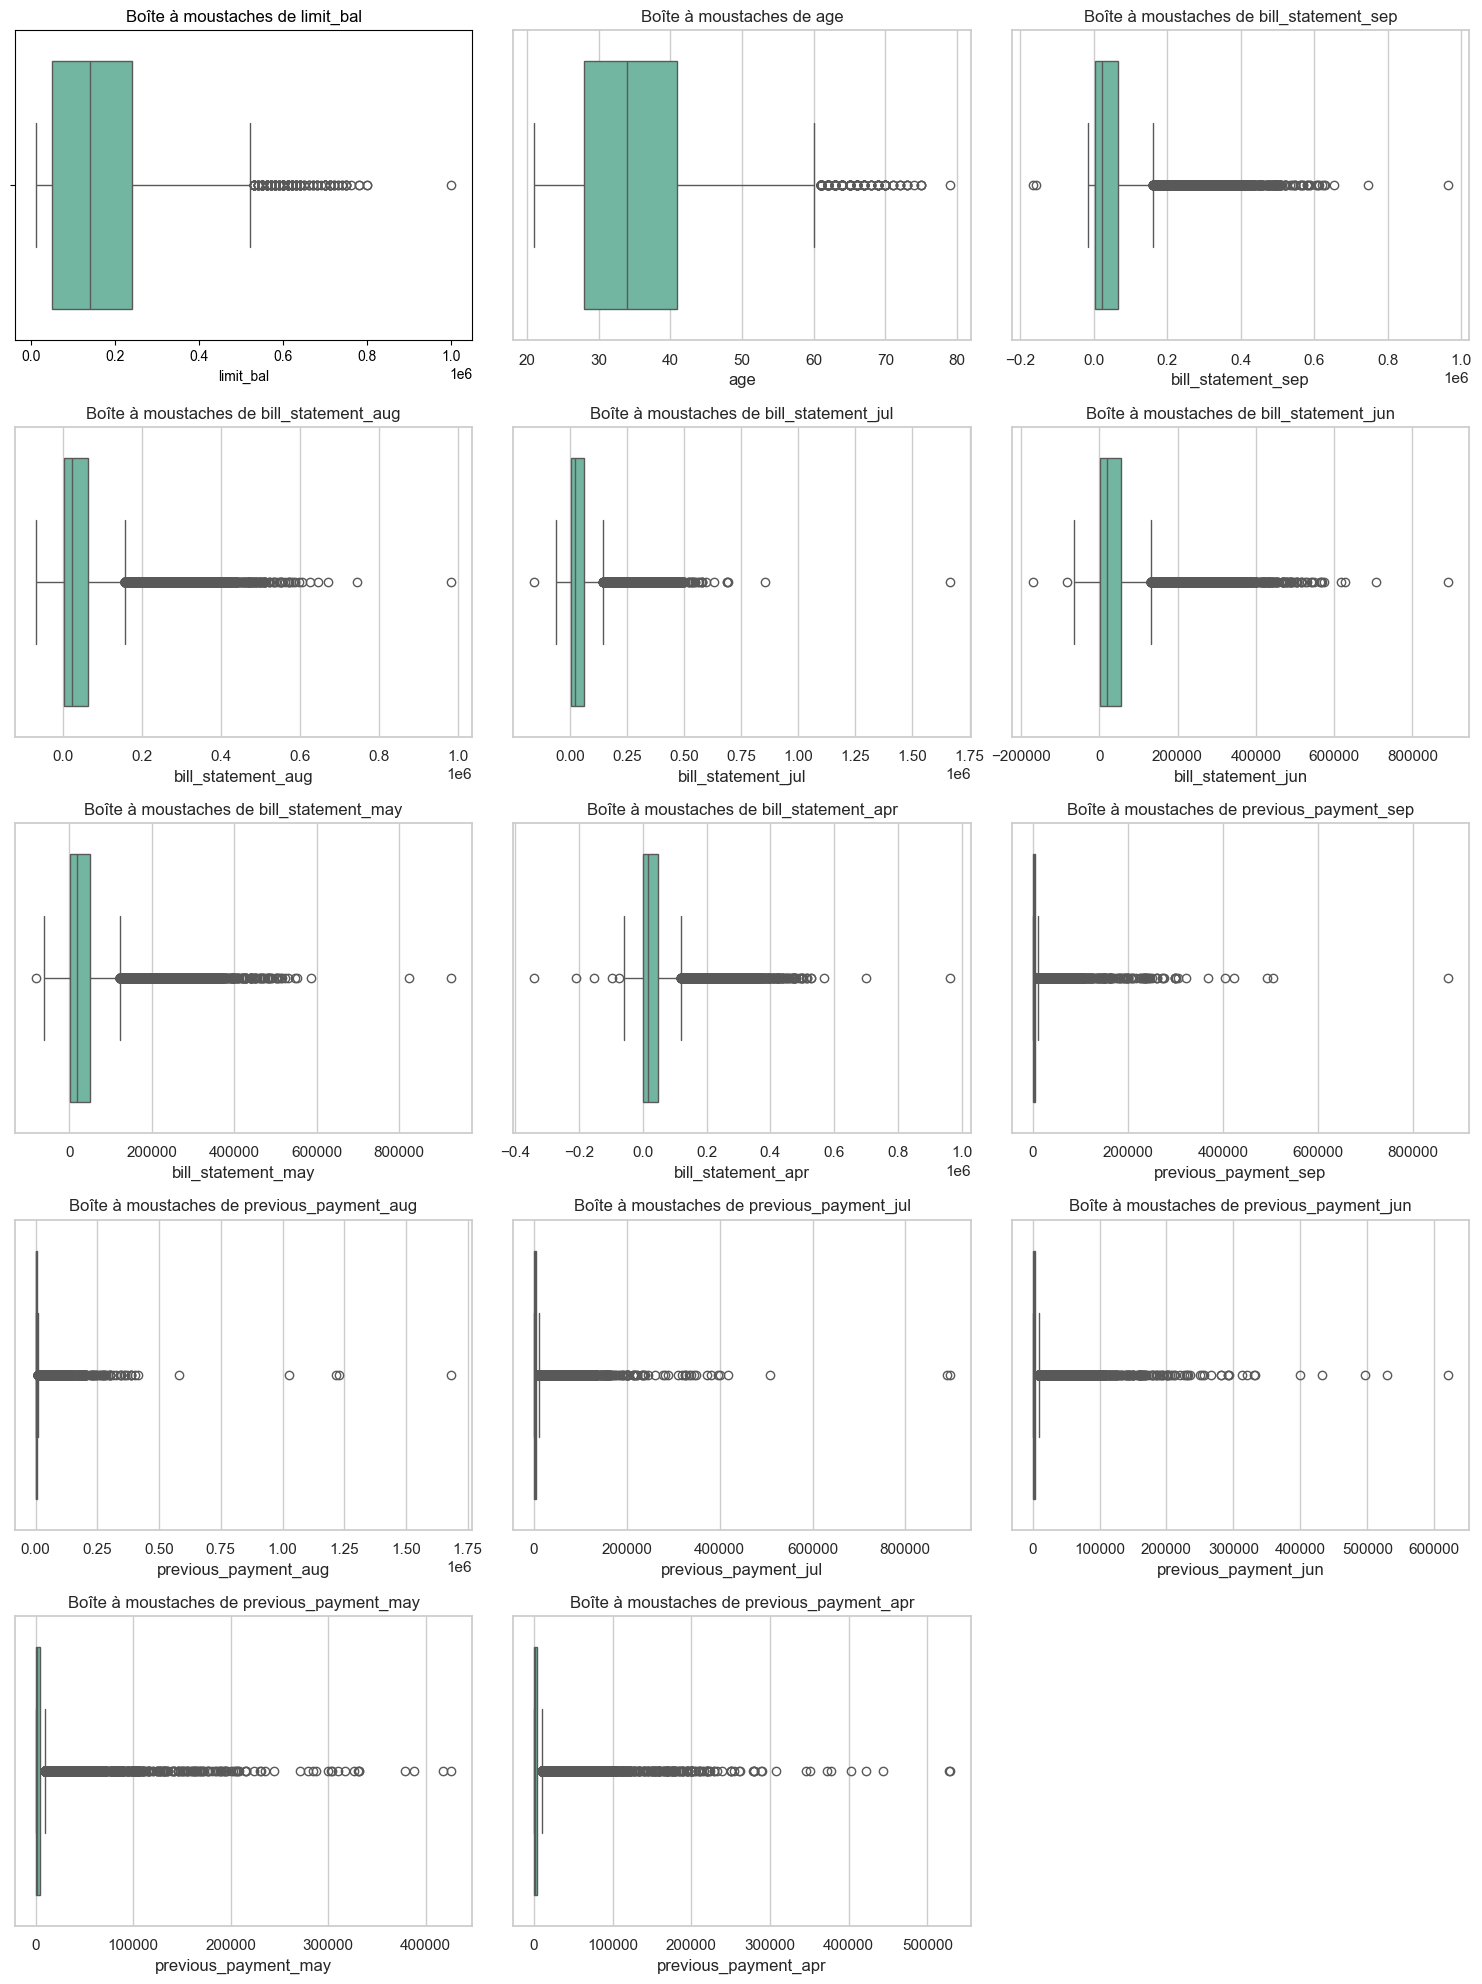

Analyse univariée de la colonne 'sex':

Fréquence des catégories :
sex
Female    0.603733
Male      0.396267
Name: proportion, dtype: float64



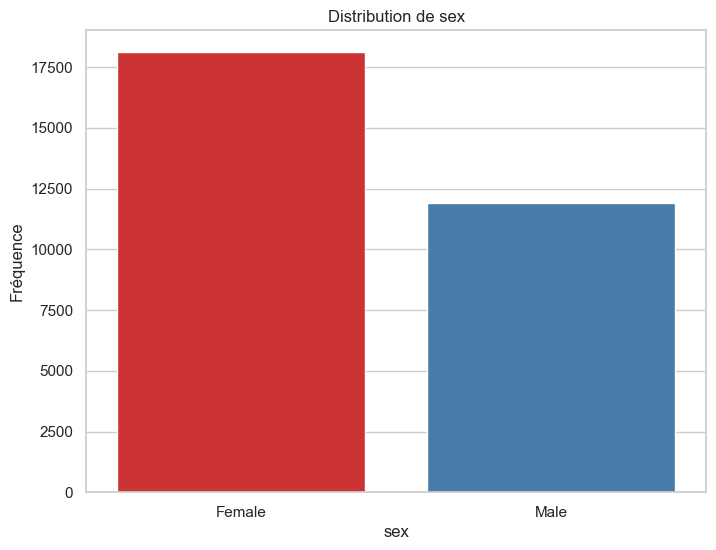

Statistiques descriptives pour sex:

count      30000
unique         2
top       Female
freq       18112
Name: sex, dtype: object


Analyse univariée de la colonne 'education':

Fréquence des catégories :
education
University         0.467667
Graduate school    0.352833
High school        0.163900
Others             0.015600
Name: proportion, dtype: float64



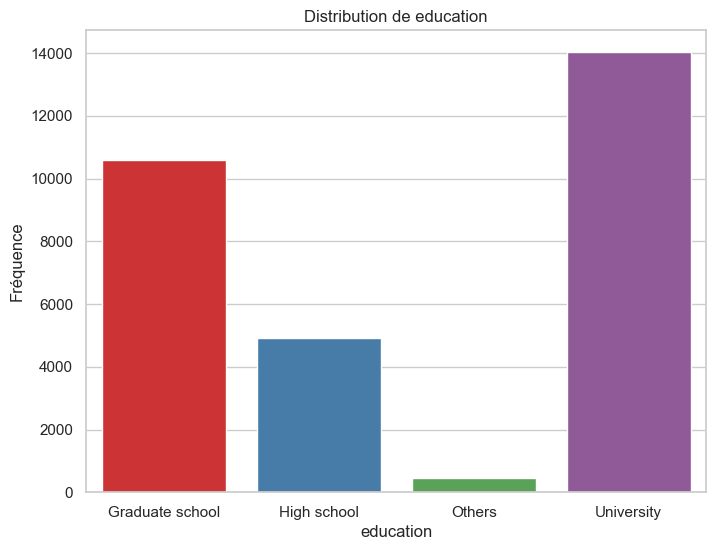

Statistiques descriptives pour education:

count          30000
unique             4
top       University
freq           14030
Name: education, dtype: object


Analyse univariée de la colonne 'marriage':

Fréquence des catégories :
marriage
Single     0.532133
Married    0.455300
Others     0.012567
Name: proportion, dtype: float64



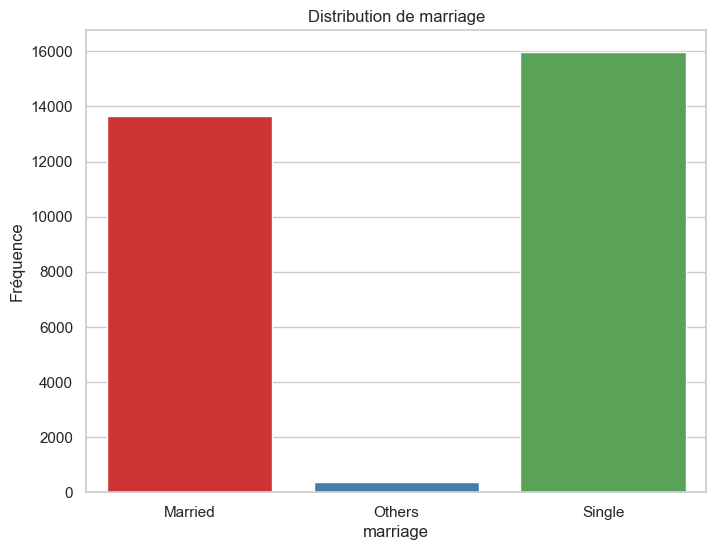

Statistiques descriptives pour marriage:

count      30000
unique         3
top       Single
freq       15964
Name: marriage, dtype: object


Analyse univariée de la colonne 'default_payment_next_month':

Fréquence des catégories :
default_payment_next_month
0    0.7788
1    0.2212
Name: proportion, dtype: float64



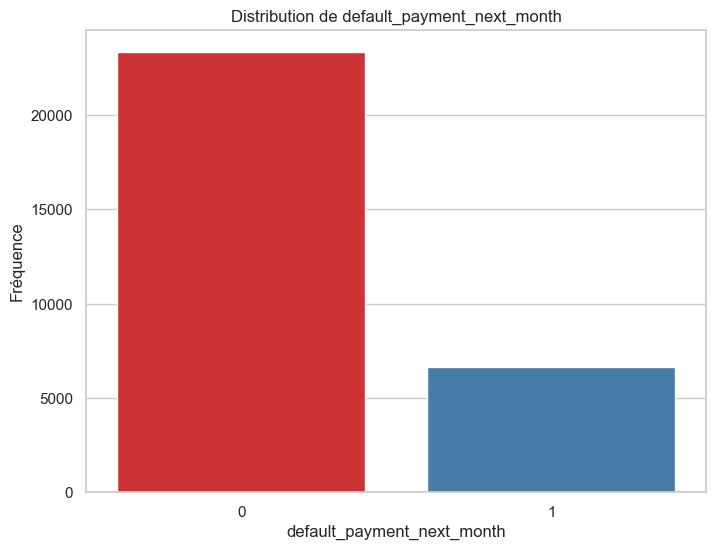

Statistiques descriptives pour default_payment_next_month:

count     30000
unique        2
top           0
freq      23364
Name: default_payment_next_month, dtype: int64


Analyse univariée de la colonne 'payment_status_sep':

Fréquence des catégories :
payment_status_sep
 0    0.491233
-1    0.189533
 1    0.122933
-2    0.091967
 2    0.088900
 3    0.010733
 4    0.002533
 5    0.000867
 8    0.000633
 6    0.000367
 7    0.000300
 9    0.000000
Name: proportion, dtype: float64



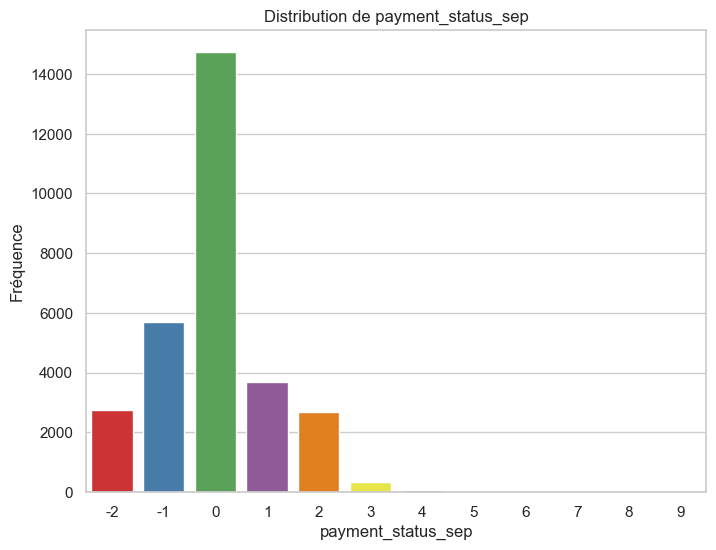

Statistiques descriptives pour payment_status_sep:

count     30000
unique       11
top           0
freq      14737
Name: payment_status_sep, dtype: int64


Analyse univariée de la colonne 'payment_status_aug':

Fréquence des catégories :
payment_status_aug
 0    0.524333
-1    0.201667
 2    0.130900
-2    0.126067
 3    0.010867
 4    0.003300
 1    0.000933
 5    0.000833
 7    0.000667
 6    0.000400
 8    0.000033
 9    0.000000
Name: proportion, dtype: float64



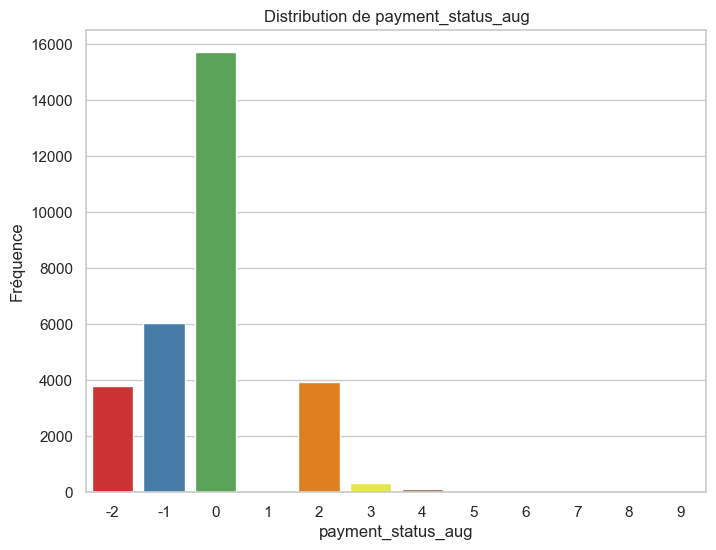

Statistiques descriptives pour payment_status_aug:

count     30000
unique       11
top           0
freq      15730
Name: payment_status_aug, dtype: int64


Analyse univariée de la colonne 'payment_status_jul':

Fréquence des catégories :
payment_status_jul
 0    0.525467
-1    0.197933
-2    0.136167
 2    0.127300
 3    0.008000
 4    0.002533
 7    0.000900
 6    0.000767
 5    0.000700
 1    0.000133
 8    0.000100
 9    0.000000
Name: proportion, dtype: float64



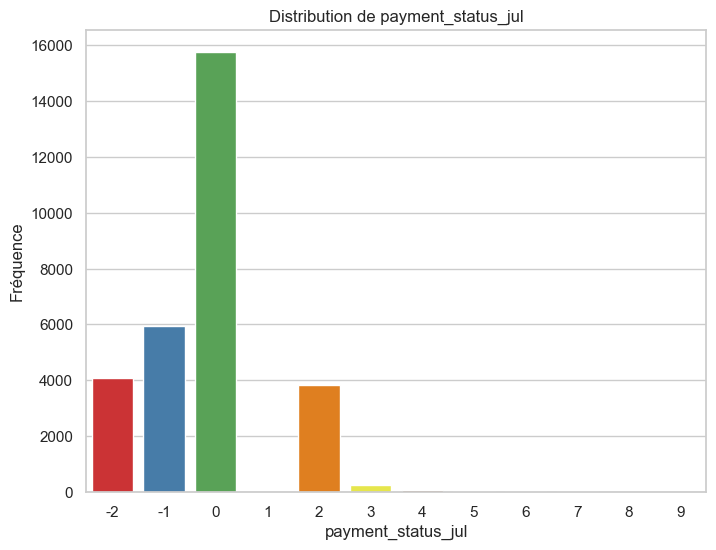

Statistiques descriptives pour payment_status_jul:

count     30000
unique       11
top           0
freq      15764
Name: payment_status_jul, dtype: int64


Analyse univariée de la colonne 'payment_status_jun':

Fréquence des catégories :
payment_status_jun
 0    0.548500
-1    0.189567
-2    0.144933
 2    0.105300
 3    0.006000
 4    0.002300
 7    0.001933
 5    0.001167
 6    0.000167
 1    0.000067
 8    0.000067
 9    0.000000
Name: proportion, dtype: float64



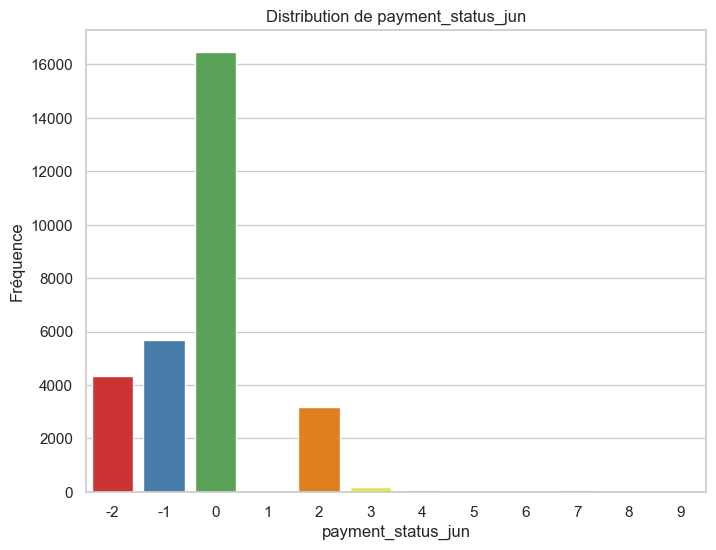

Statistiques descriptives pour payment_status_jun:

count     30000
unique       11
top           0
freq      16455
Name: payment_status_jun, dtype: int64


Analyse univariée de la colonne 'payment_status_may':

Fréquence des catégories :
payment_status_may
 0    0.564900
-1    0.184633
-2    0.151533
 2    0.087533
 3    0.005933
 4    0.002800
 7    0.001933
 5    0.000567
 6    0.000133
 8    0.000033
 1    0.000000
 9    0.000000
Name: proportion, dtype: float64



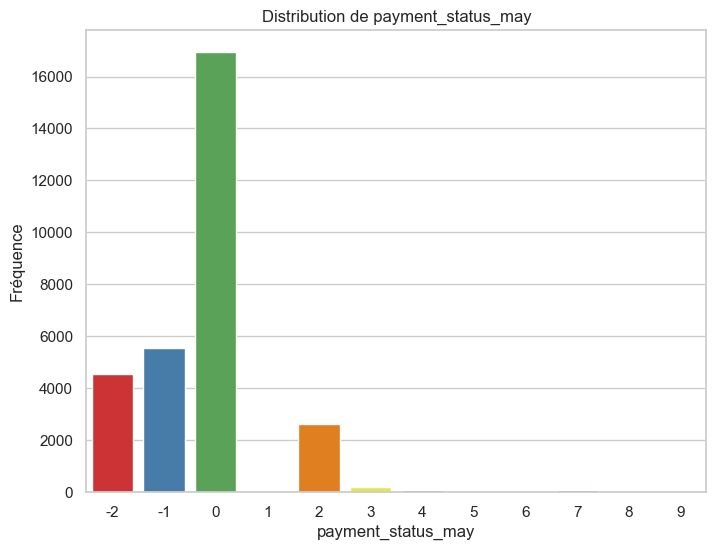

Statistiques descriptives pour payment_status_may:

count     30000
unique       10
top           0
freq      16947
Name: payment_status_may, dtype: int64


Analyse univariée de la colonne 'payment_status_apr':

Fréquence des catégories :
payment_status_apr
 0    0.542867
-1    0.191333
-2    0.163167
 2    0.092200
 3    0.006133
 4    0.001633
 7    0.001533
 6    0.000633
 5    0.000433
 8    0.000067
 1    0.000000
 9    0.000000
Name: proportion, dtype: float64



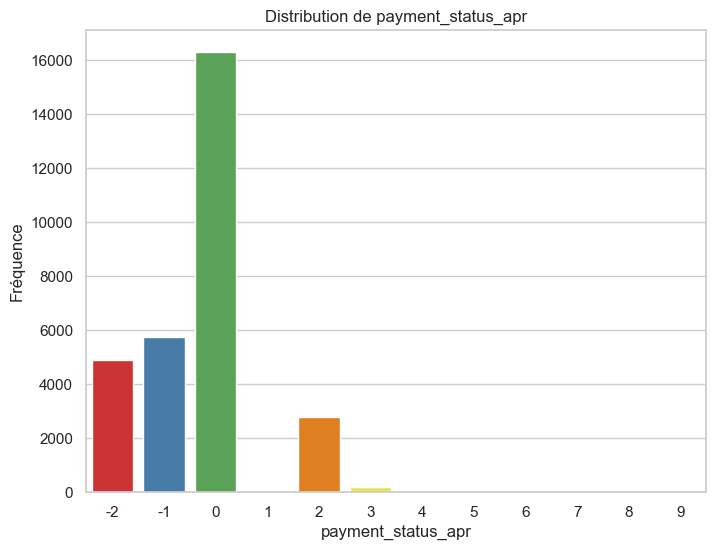

Statistiques descriptives pour payment_status_apr:

count     30000
unique       10
top           0
freq      16286
Name: payment_status_apr, dtype: int64




In [13]:
plot_distributions(df) #la fonction nous permet d'analyser la distribution des variables

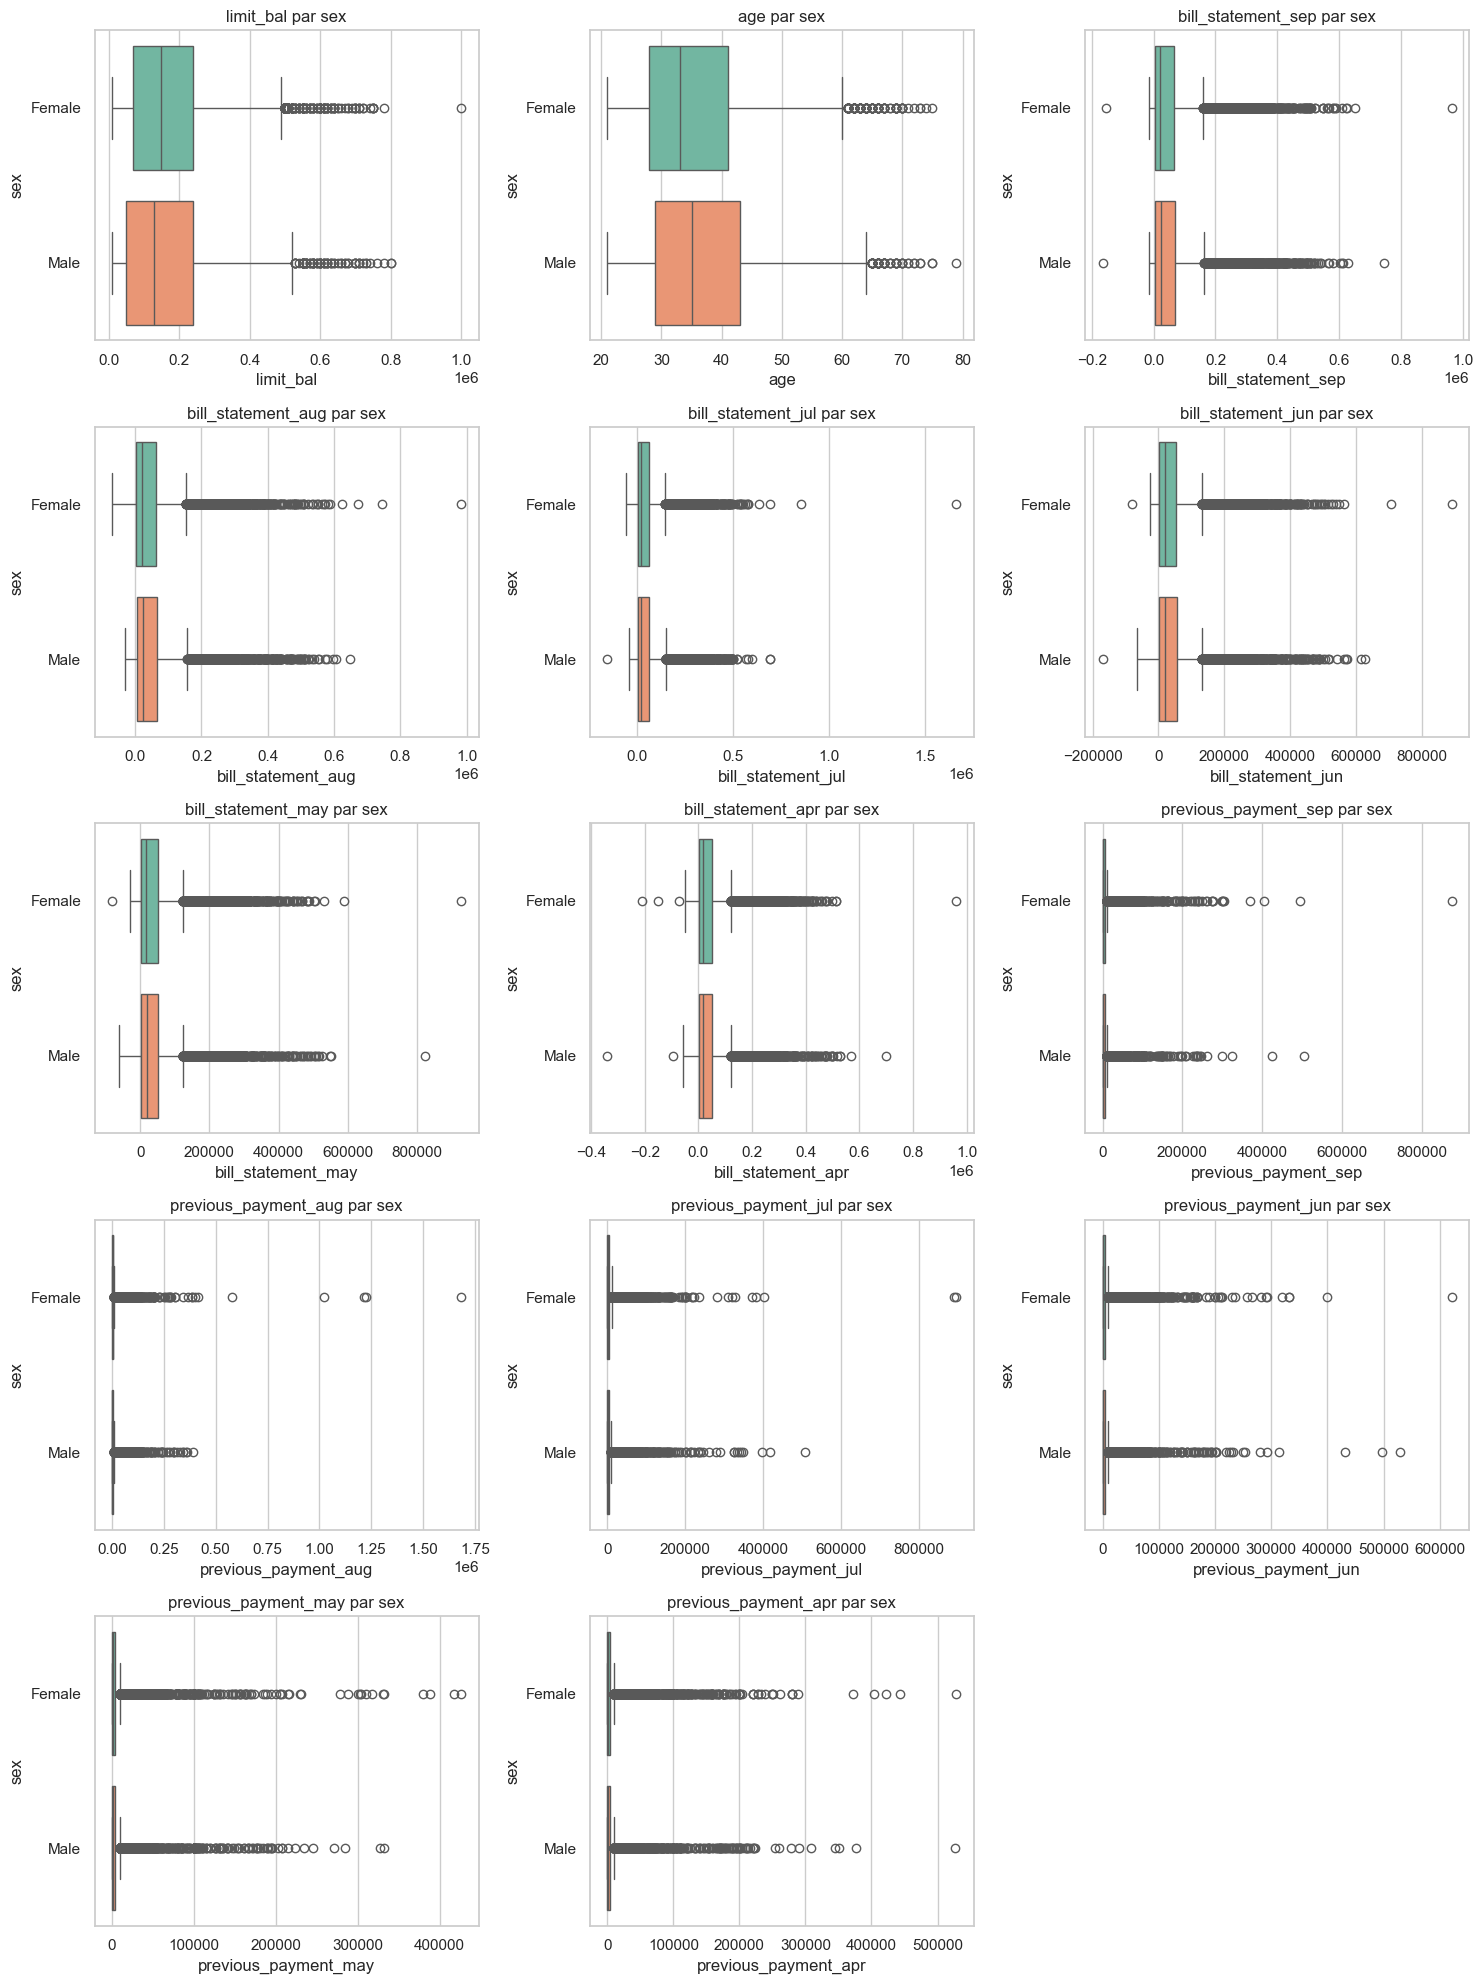

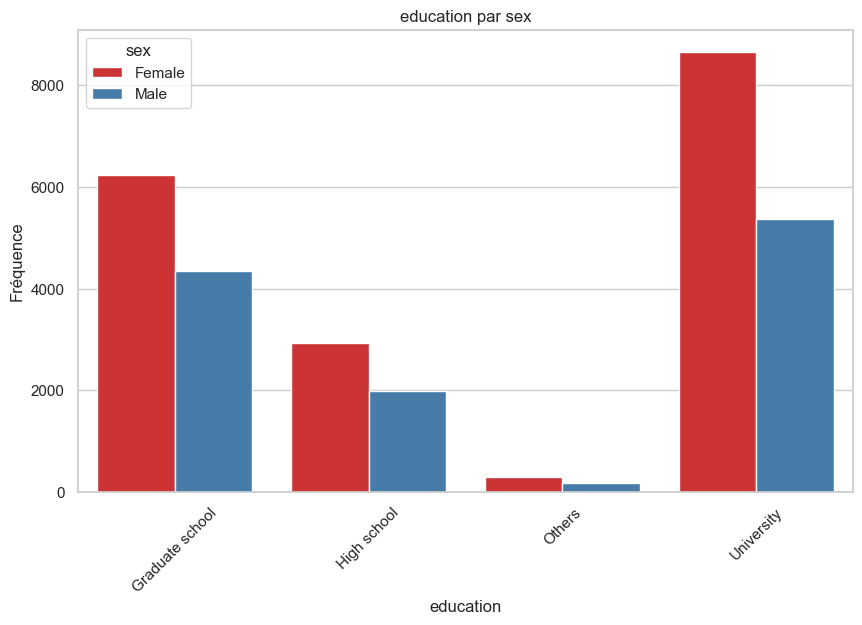

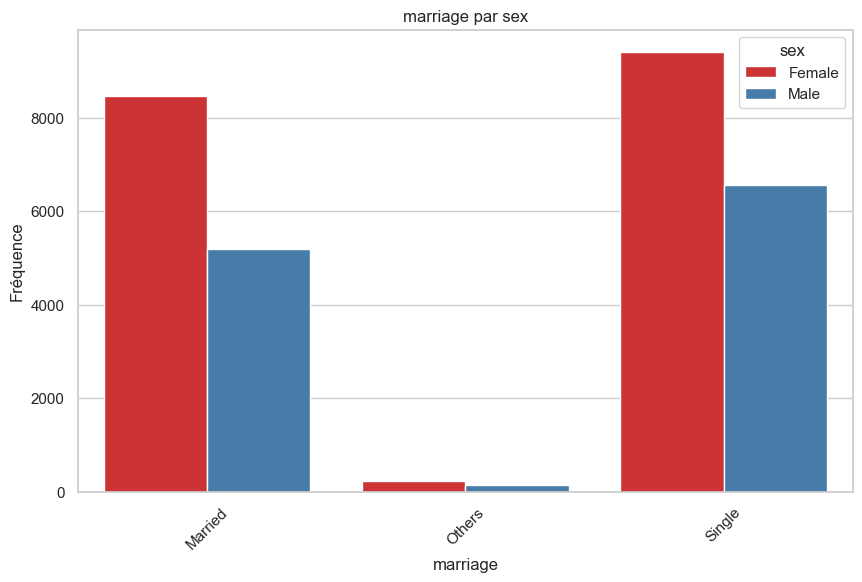

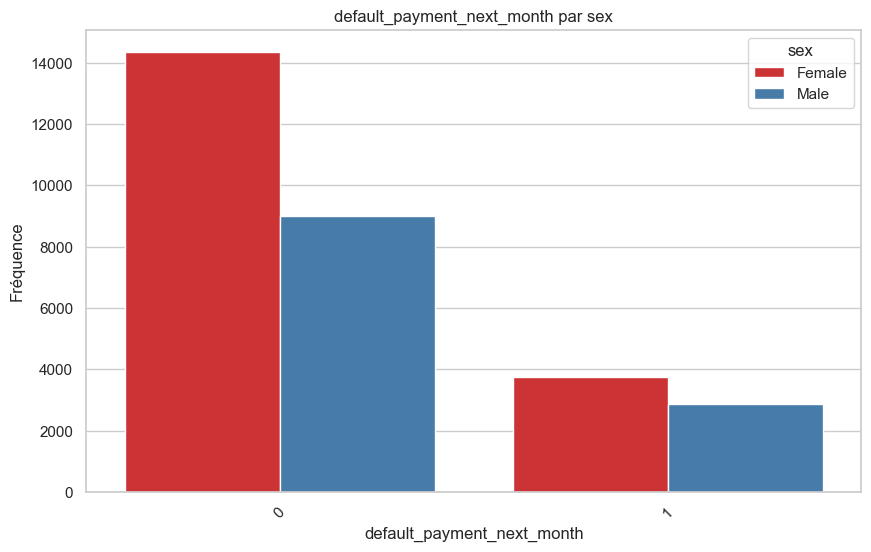

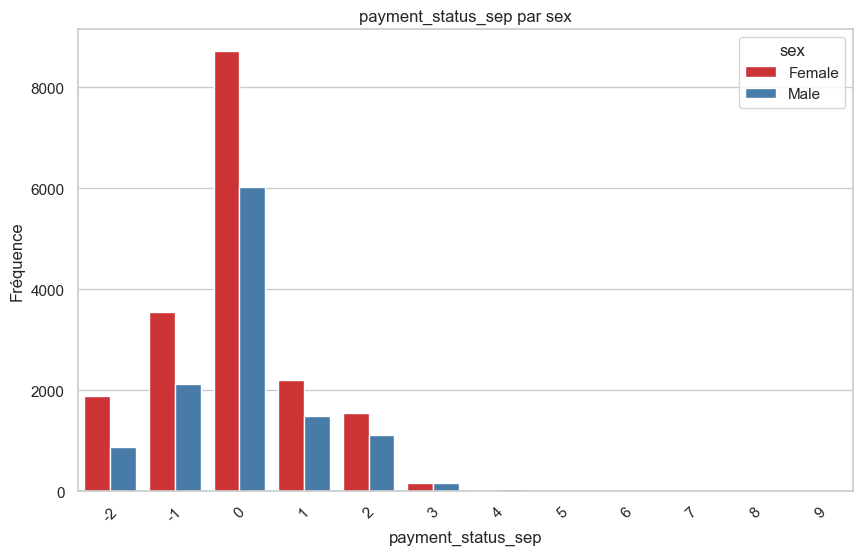

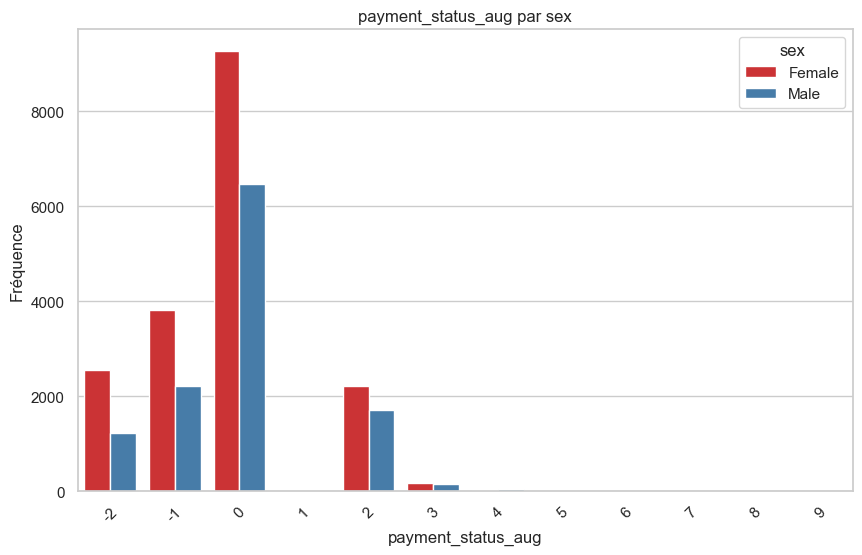

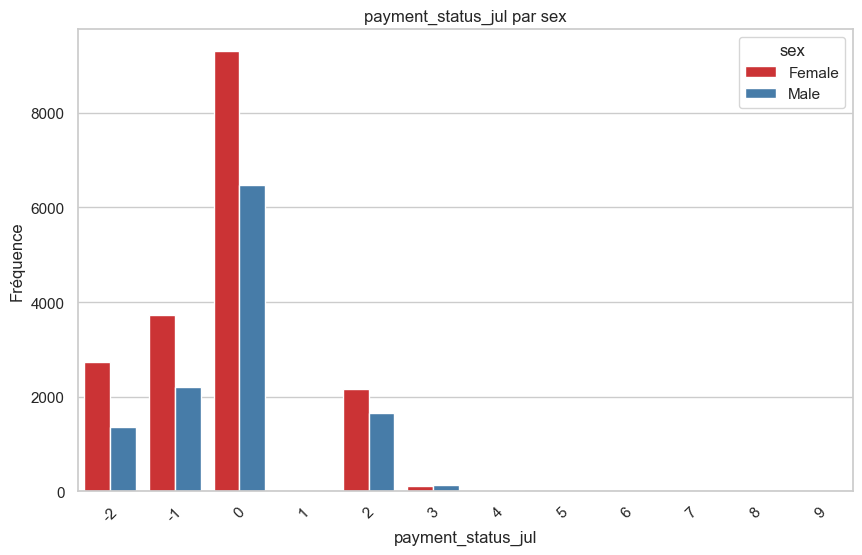

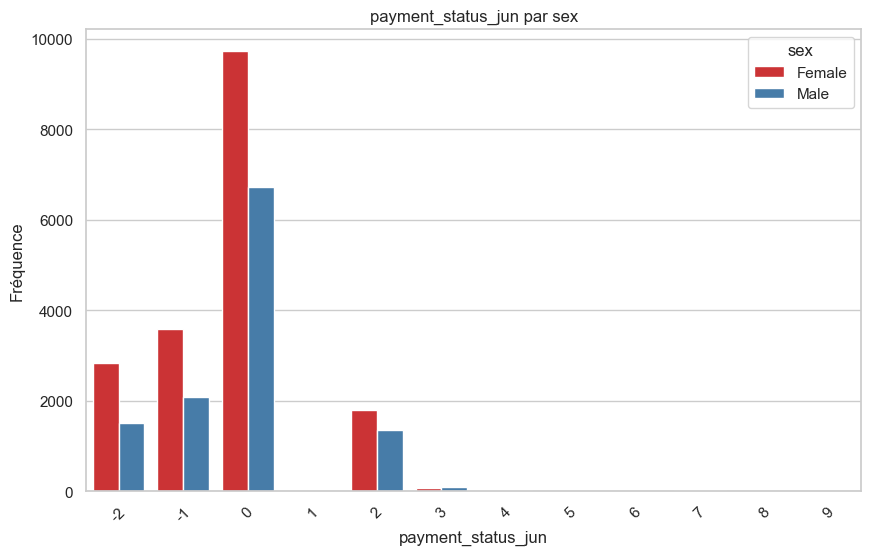

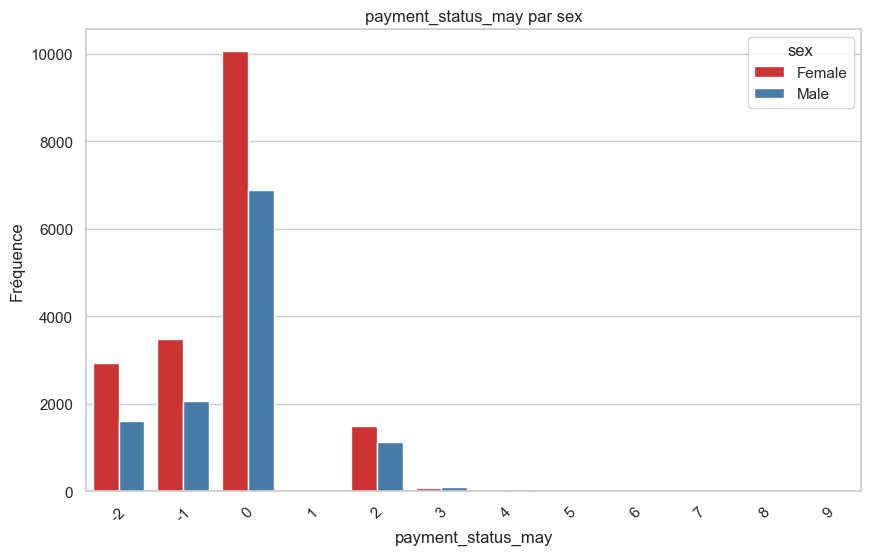

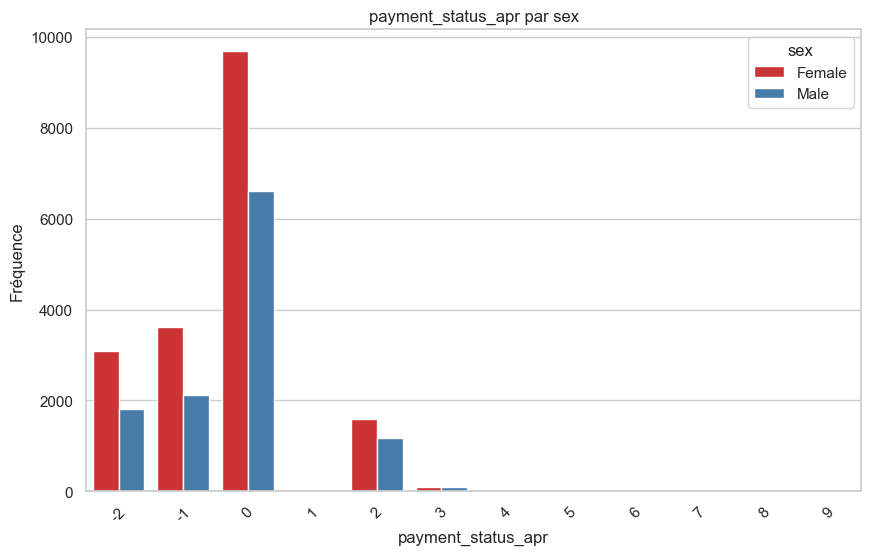

In [14]:
plot_discretize_distributions(df , 'sex')

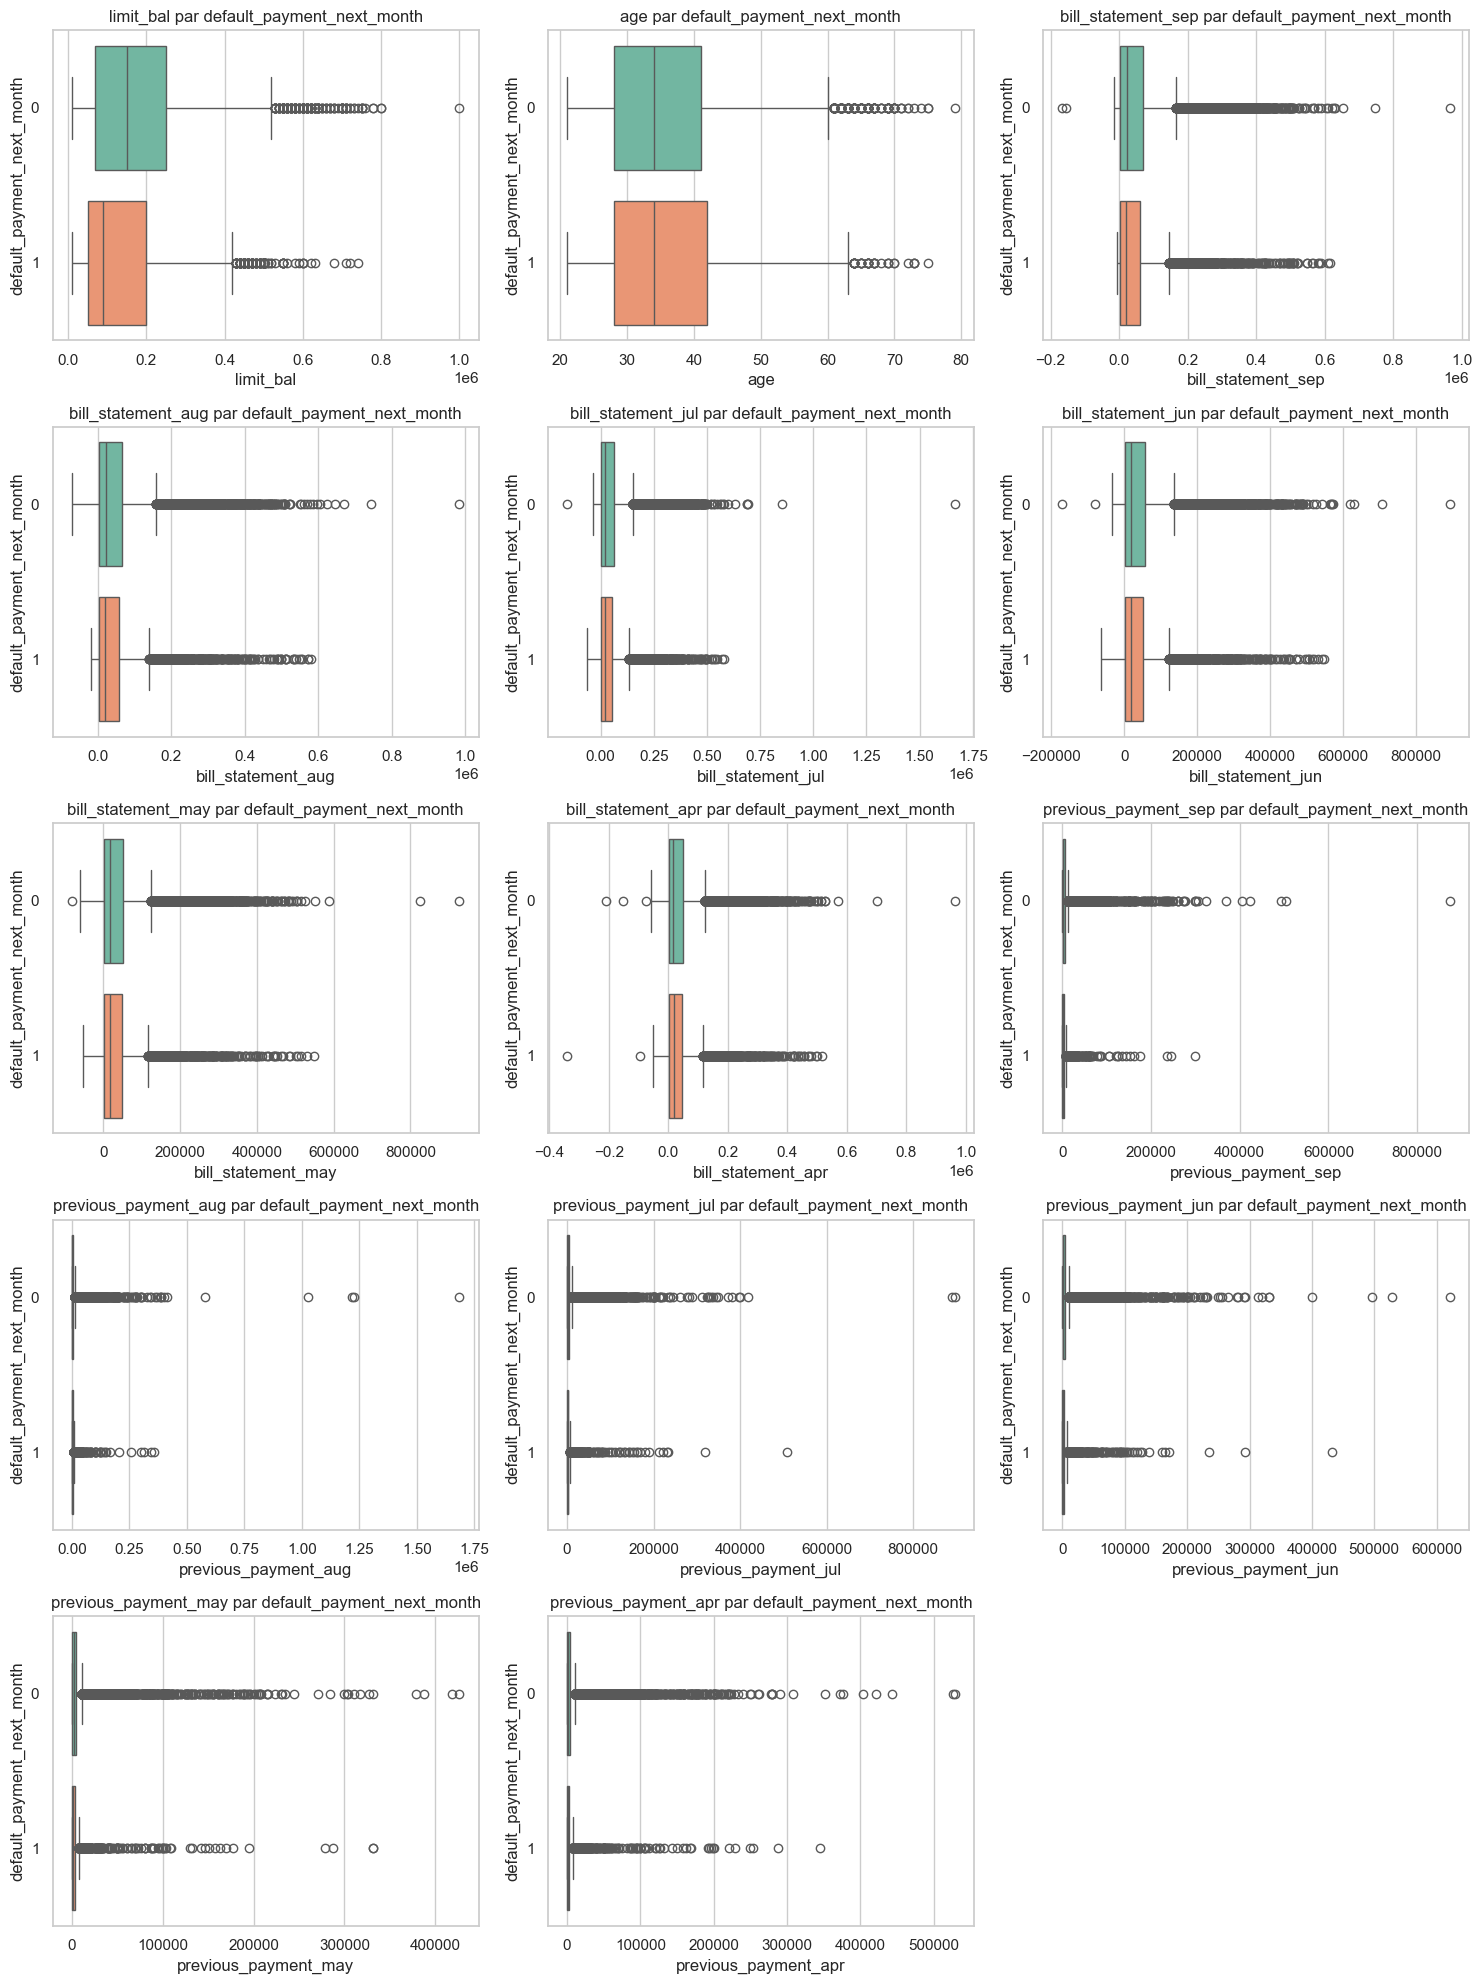

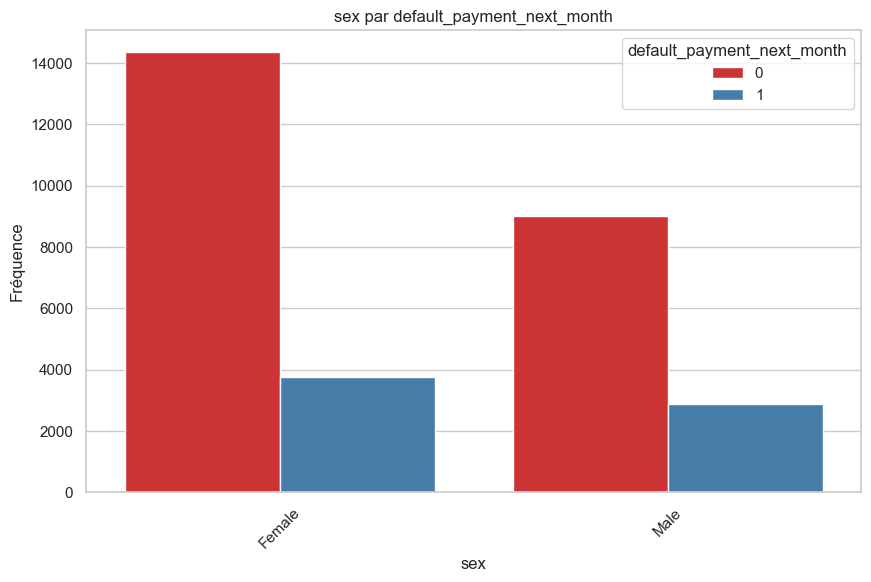

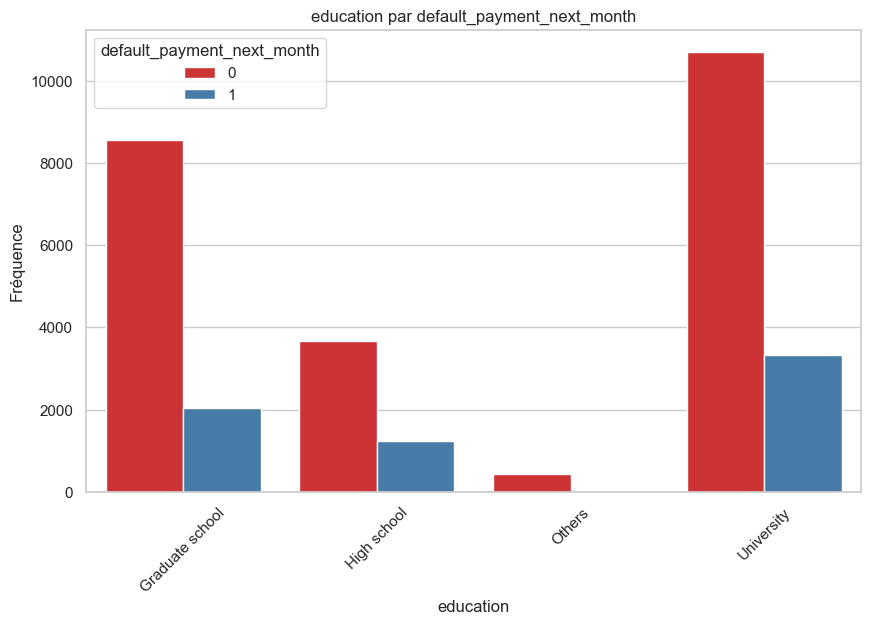

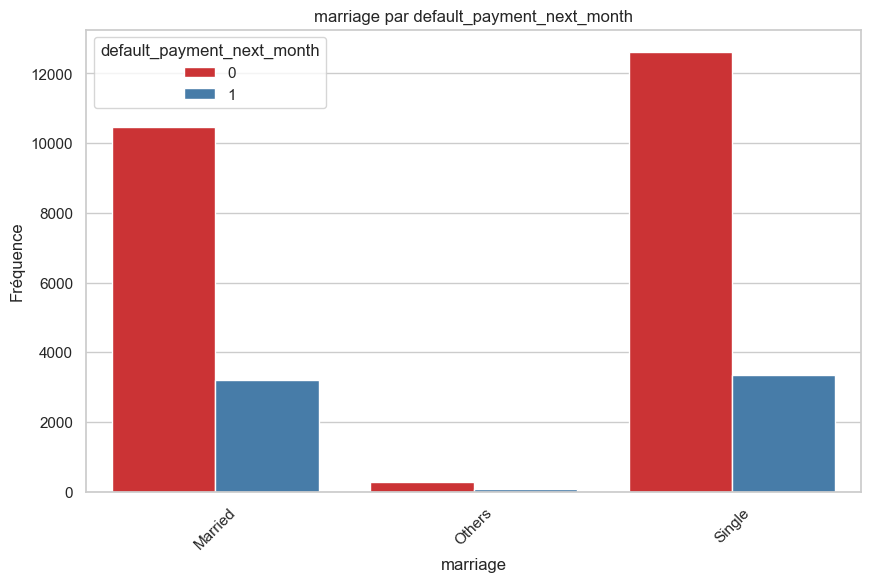

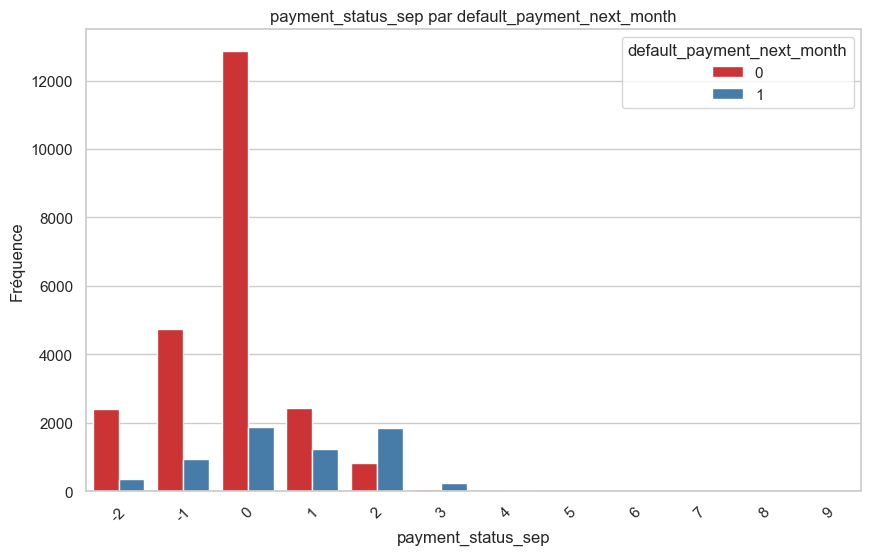

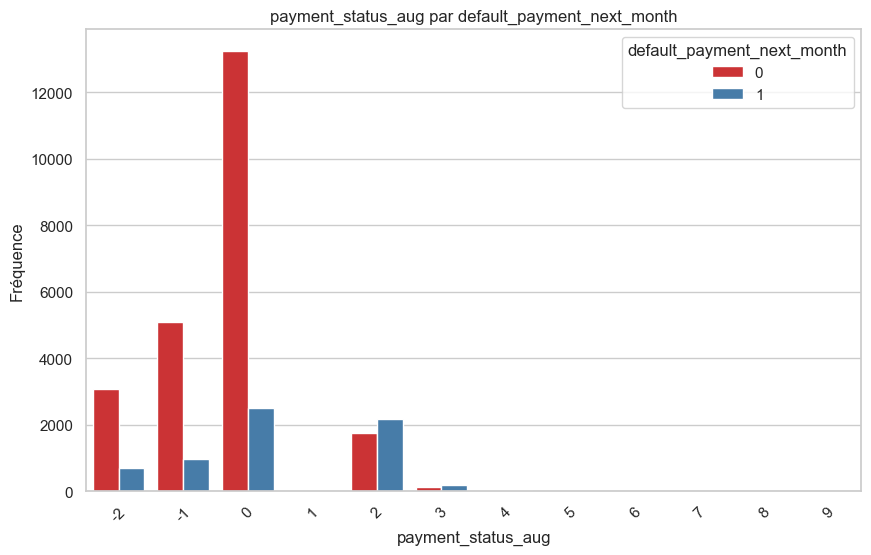

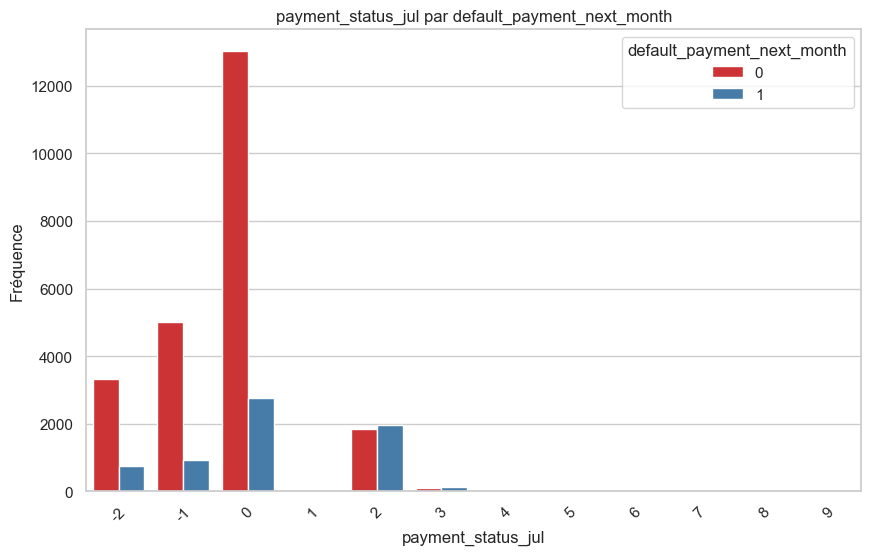

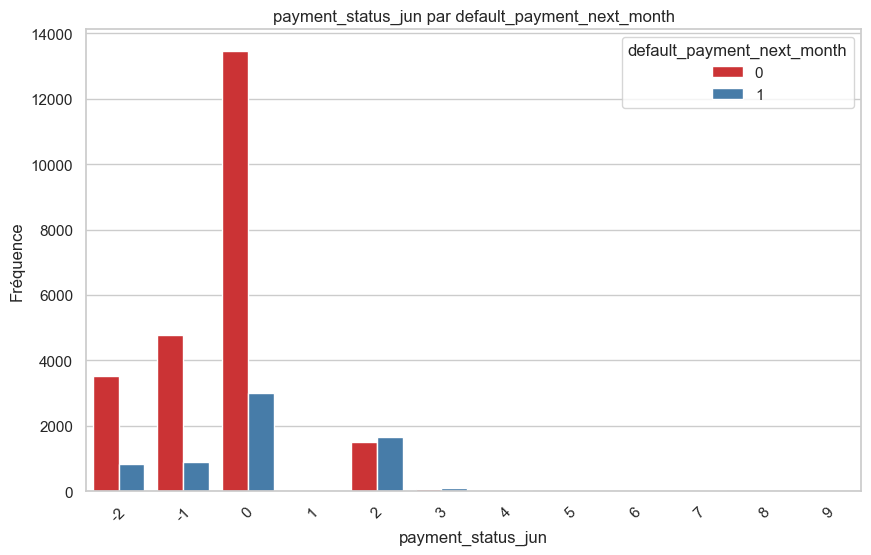

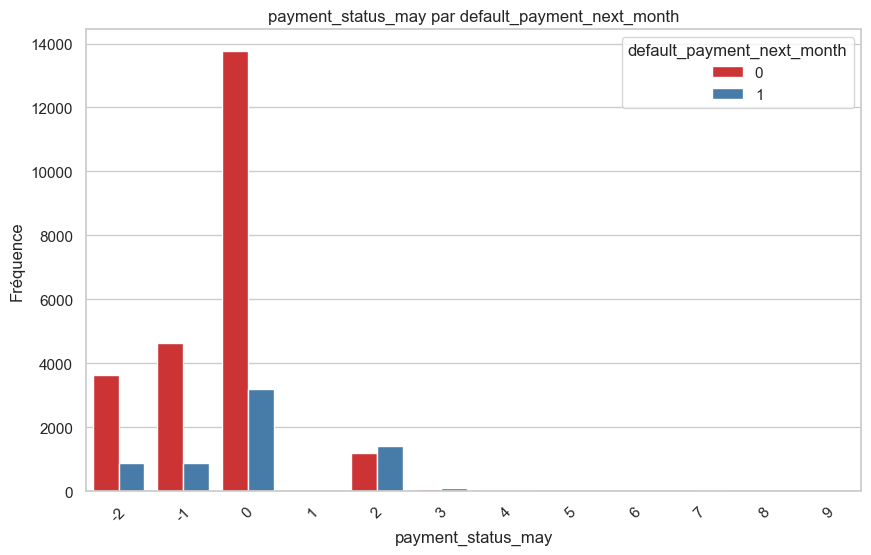

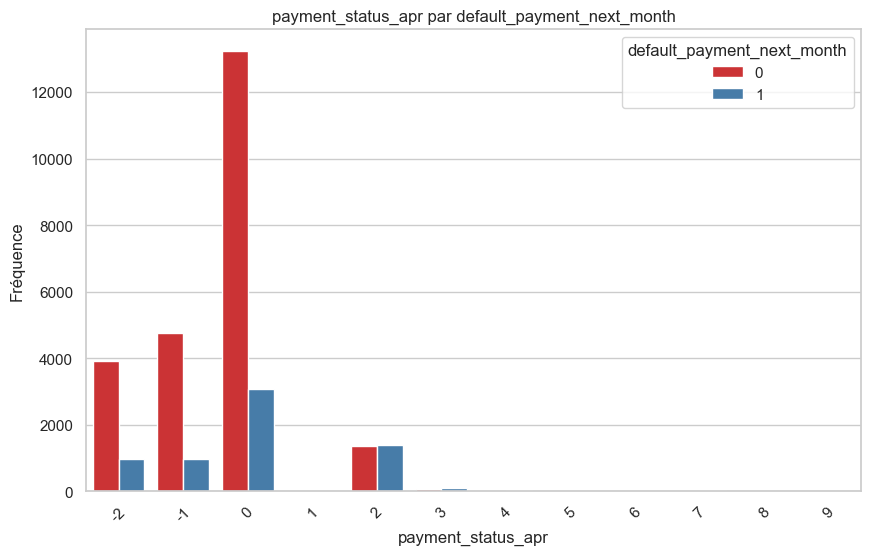

In [15]:
plot_discretize_distributions(df , 'default_payment_next_month')

In [16]:
corr_mat =  df[[c for c in df.columns if c not in ['id' , 'sex' , 'education' , 'marriage']]].corr()
corr_mat

limit_bal       age  payment_status_sep  \
limit_bal                    1.000000  0.144713           -0.271214   
age                          0.144713  1.000000           -0.039447   
payment_status_sep          -0.271214 -0.039447            1.000000   
payment_status_aug          -0.296382 -0.050148            0.672164   
payment_status_jul          -0.286123 -0.053048            0.574245   
payment_status_jun          -0.267460 -0.049722            0.538841   
payment_status_may          -0.249411 -0.053826            0.509426   
payment_status_apr          -0.235195 -0.048773            0.474553   
bill_statement_sep           0.285430  0.056239            0.187068   
bill_statement_aug           0.278314  0.054283            0.189859   
bill_statement_jul           0.283236  0.053710            0.179785   
bill_statement_jun           0.293988  0.051353            0.179125   
bill_statement_may           0.295562  0.049345            0.180635   
bill_statement_apr           0.290389  0.047613            0.176980   
previous_payment_sep         0.195236  0.026147           -0.079269   
previous_payment_aug         0.178408  0.021785           -0.070101   
previous_payment_jul         0.210167  0.029247           -0.070561   
previous_payment_jun         0.203242  0.021379           -0.064005   
previous_payment_may         0.217202  0.022850           -0.058190   
previous_payment_apr         0.219595  0.019478           -0.058673   
default_payment_next_month  -0.153520  0.013890            0.324794   

                            payment_status_aug  payment_status_jul  \
limit_bal                            -0.296382           -0.286123   
age                                  -0.050148           -0.053048   
payment_status_sep                    0.672164            0.574245   
payment_status_aug                    1.000000            0.766552   
payment_status_jul                    0.766552            1.000000   
payment_status_jun                    0.662067            0.777359   
payment_status_may                    0.622780            0.686775   
payment_status_apr                    0.575501            0.632684   
bill_statement_sep                    0.234887            0.208473   
bill_statement_aug                    0.235257            0.237295   
bill_statement_jul                    0.224146            0.227494   
bill_statement_jun                    0.222237            0.227202   
bill_statement_may                    0.221348            0.225145   
bill_statement_apr                    0.219403            0.222327   
previous_payment_sep                 -0.080701            0.001295   
previous_payment_aug                 -0.058990           -0.066793   
previous_payment_jul                 -0.055901           -0.053311   
previous_payment_jun                 -0.046858           -0.046067   
previous_payment_may                 -0.037093           -0.035863   
previous_payment_apr                 -0.036500           -0.035861   
default_payment_next_month            0.263551            0.235253   

                            payment_status_jun  payment_status_may  \
limit_bal                            -0.267460           -0.249411   
age                                  -0.049722           -0.053826   
payment_status_sep                    0.538841            0.509426   
payment_status_aug                    0.662067            0.622780   
payment_status_jul                    0.777359            0.686775   
payment_status_jun                    1.000000            0.819835   
payment_status_may                    0.819835            1.000000   
payment_status_apr                    0.716449            0.816900   
bill_statement_sep                    0.202812            0.206684   
bill_statement_aug                    0.225816            0.226913   
bill_statement_jul                    0.244983            0.243335   
bill_statement_jun                    0.245917            0.271915   
bill_statement

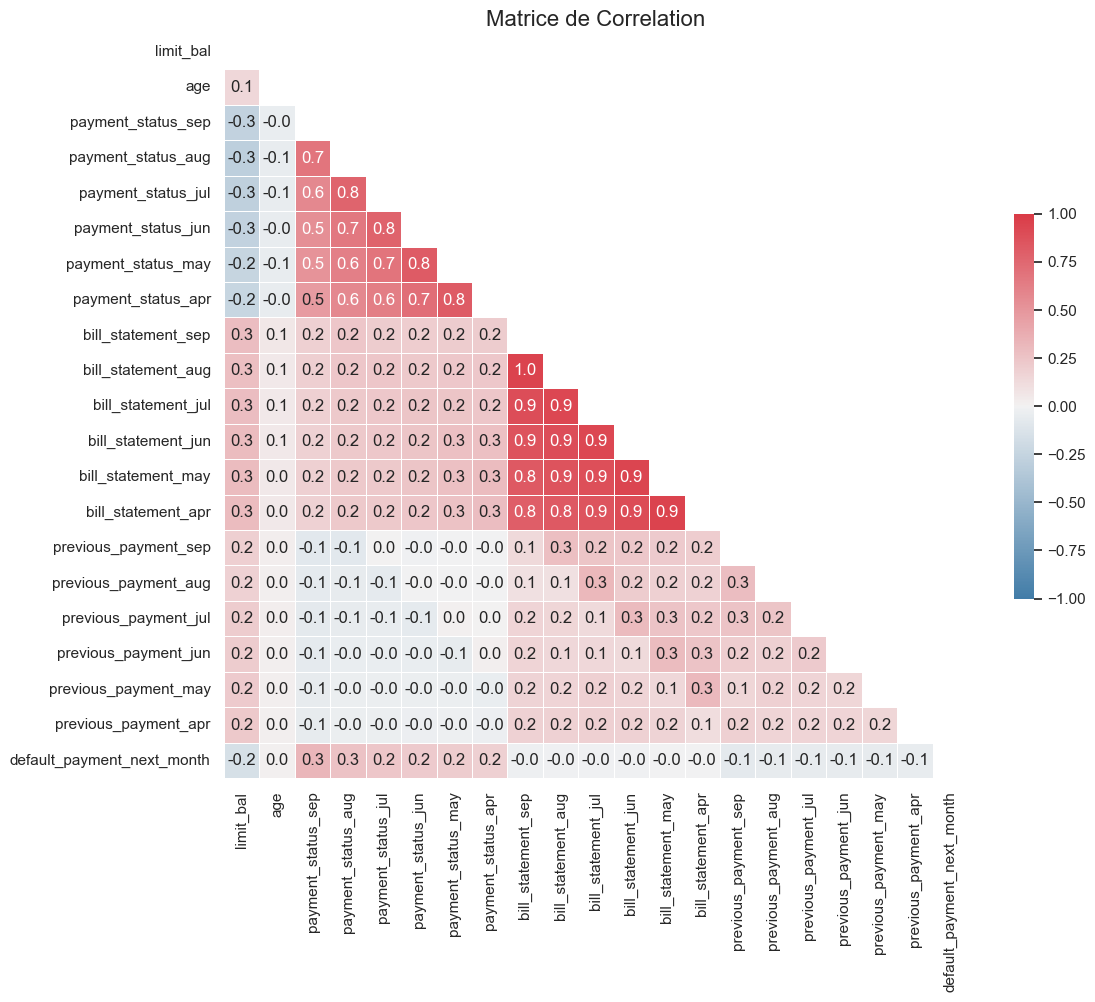

In [17]:
plot_correlation_matrix(corr_mat)

<Axes: xlabel='marriage', ylabel='limit_bal'>

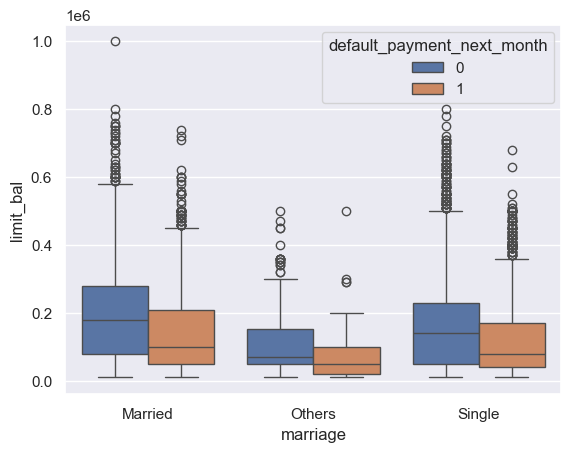

In [18]:
sns.boxplot(data=df, y = 'limit_bal' , x='marriage' , hue= "default_payment_next_month")

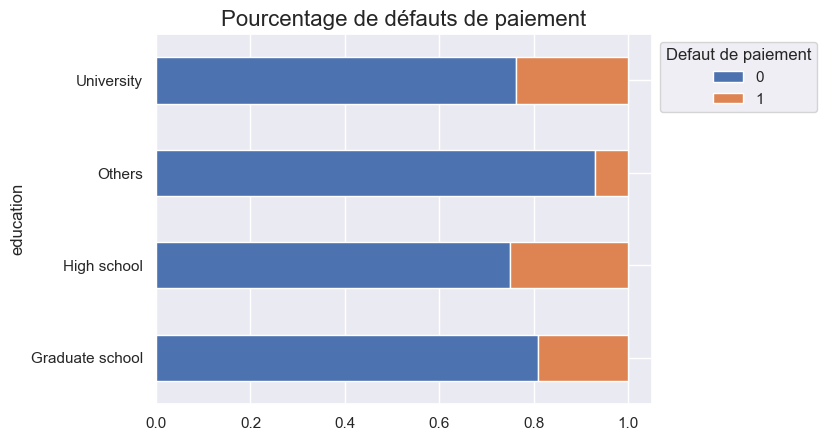

In [19]:
pct_default_by_category(df , "education")

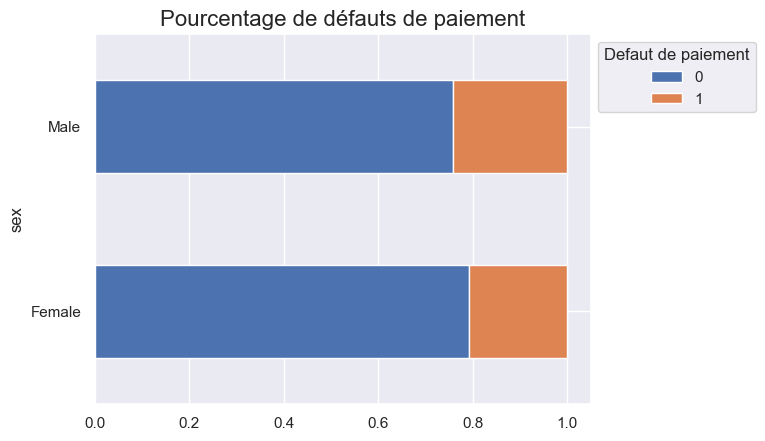

In [20]:
pct_default_by_category(df , "sex")

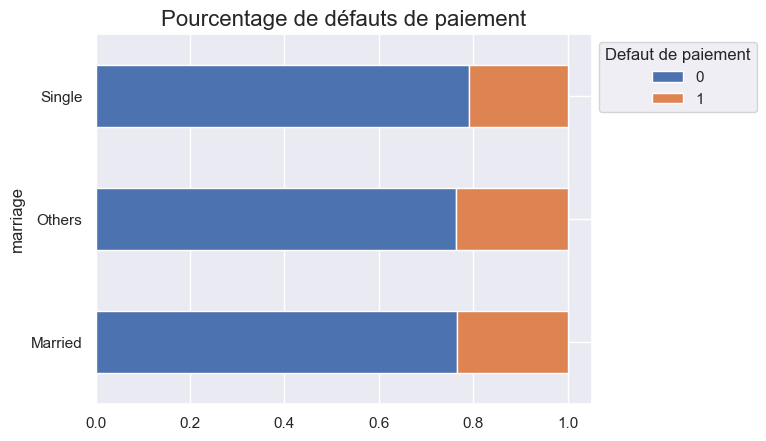

In [21]:
pct_default_by_category(df , "marriage")

# SWEETVIZ

In [22]:
import sweetviz as sv


In [23]:
my_report =  sv.analyze(df)
my_report.show_html()

Done! Use 'show' commands to display/save.   |██████████| [100%]   00:01 -> (00:00 left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.



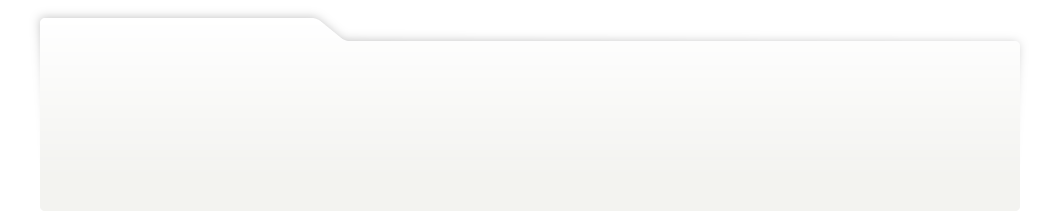
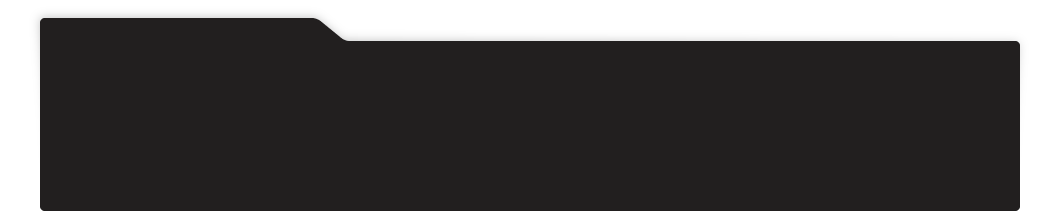
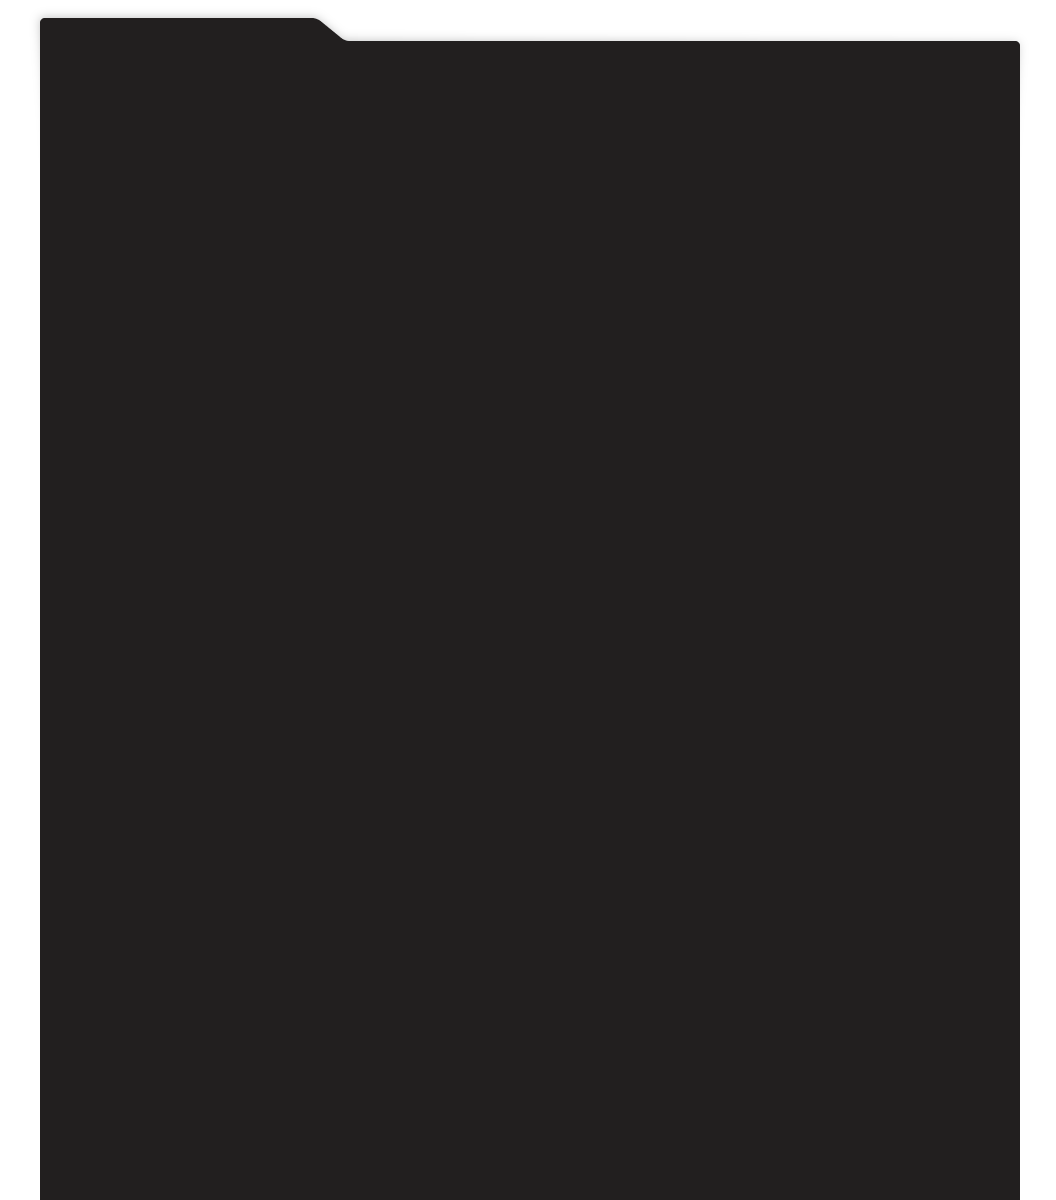
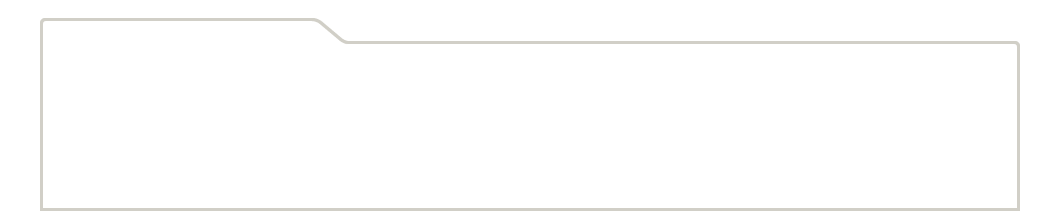
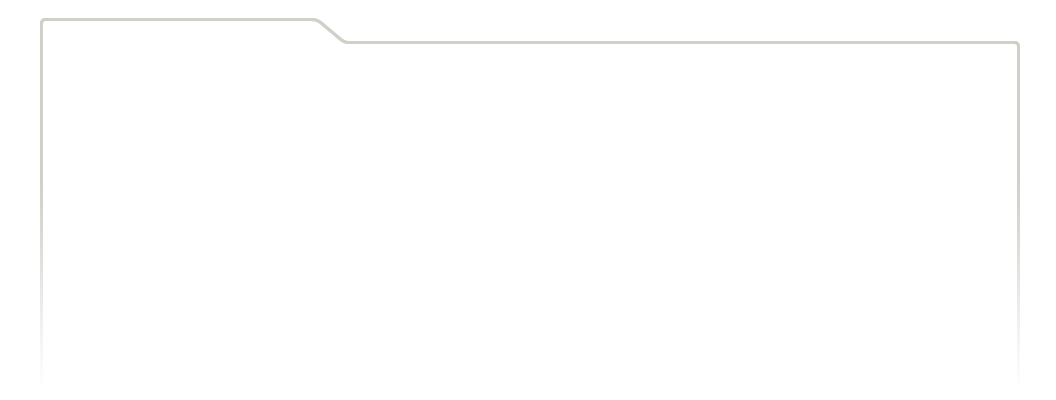
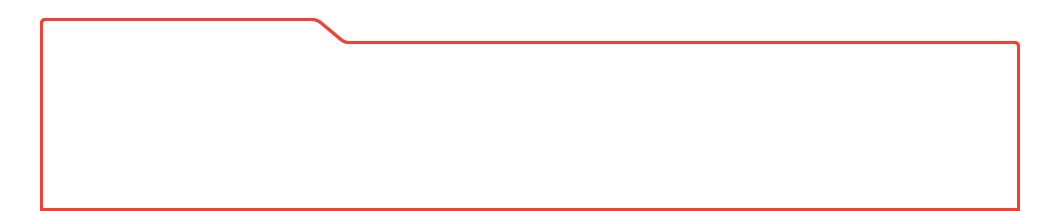
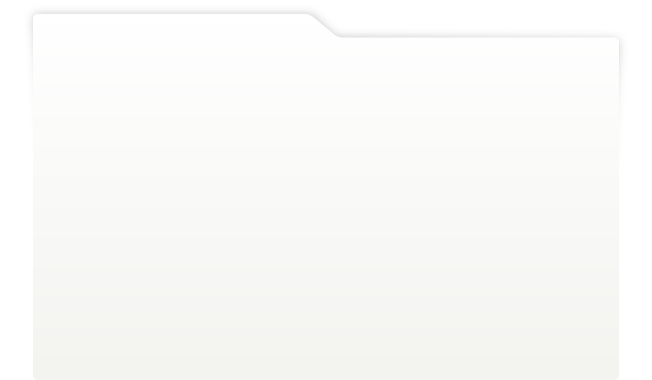
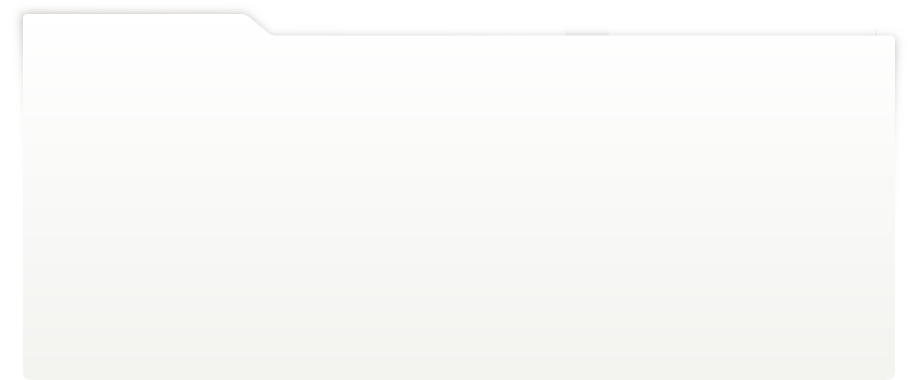
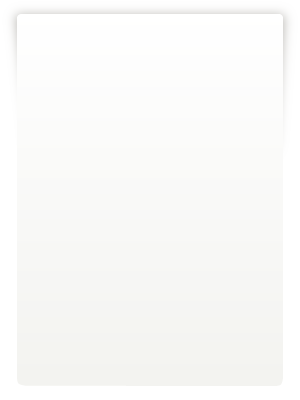
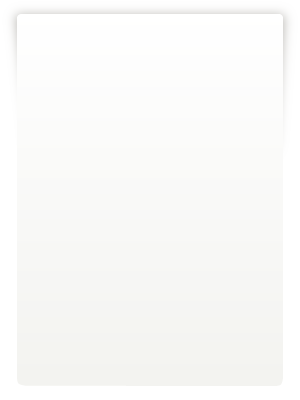
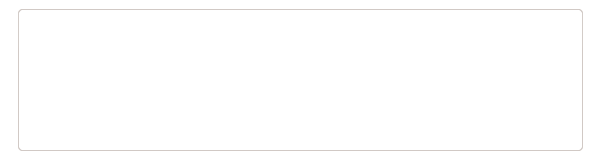
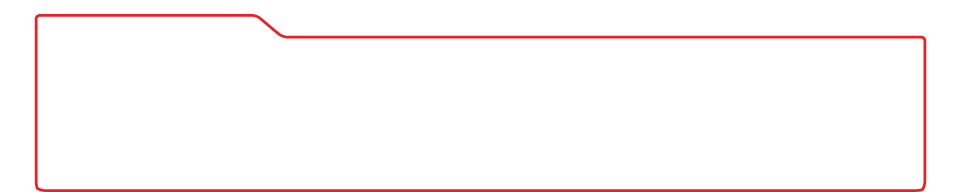
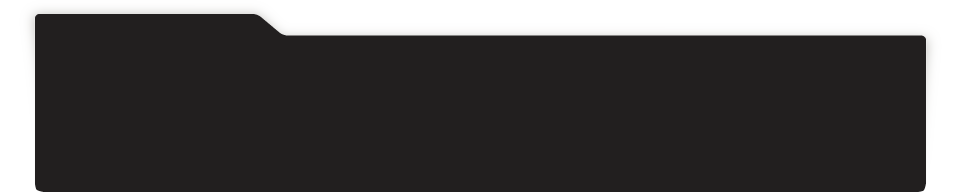
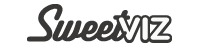
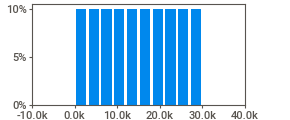
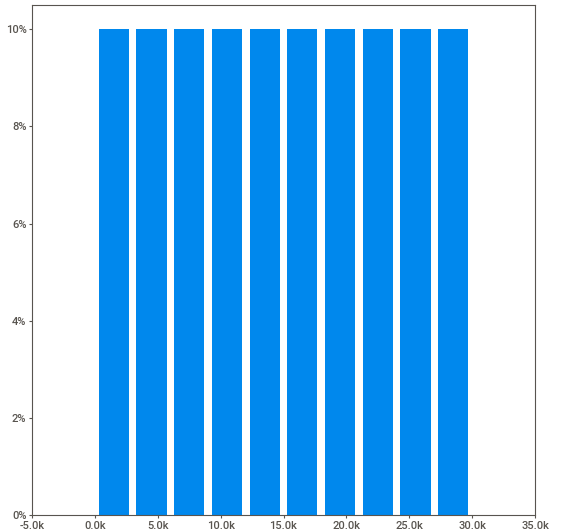
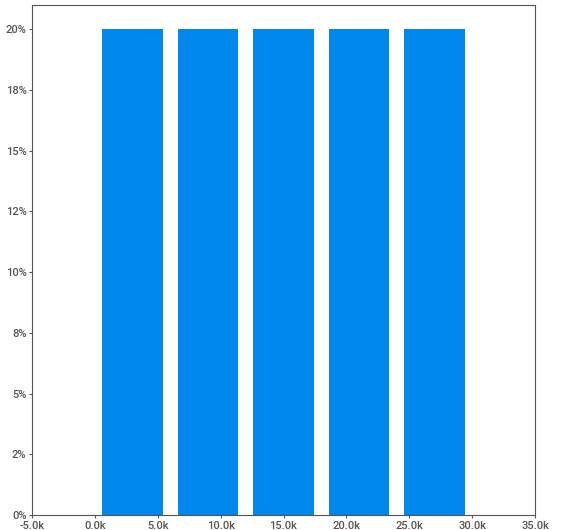
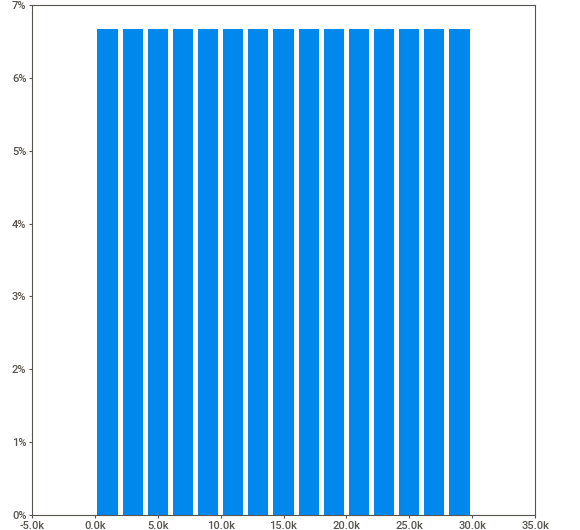
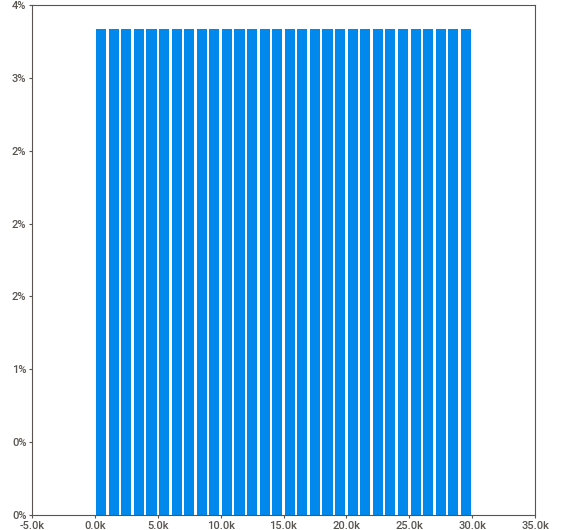
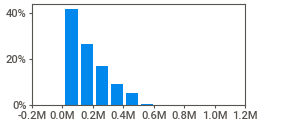
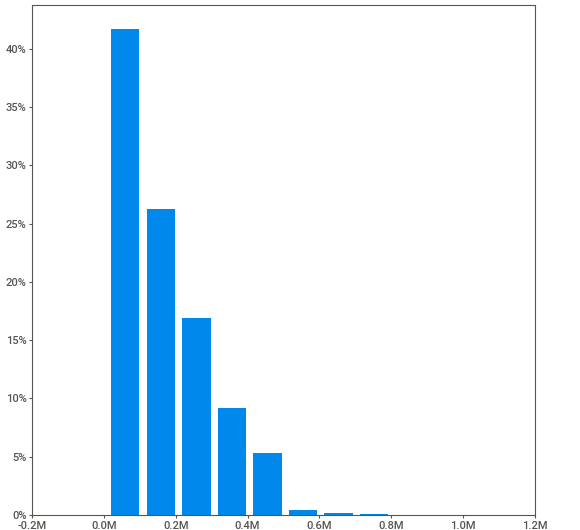
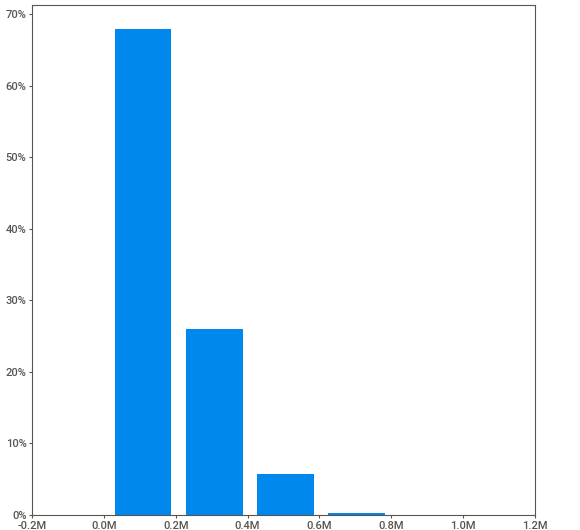
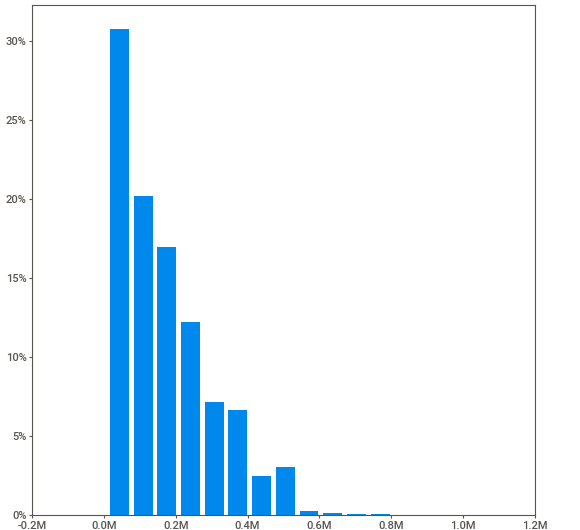
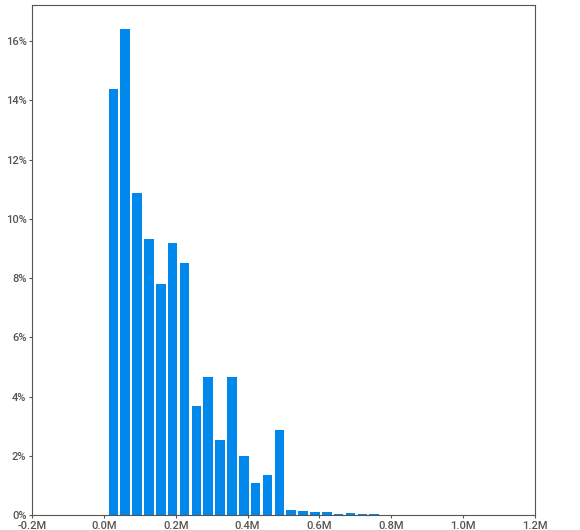
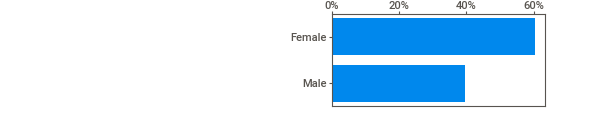
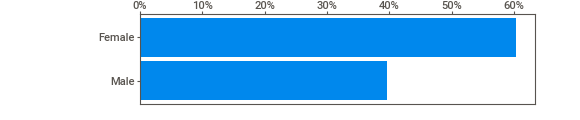
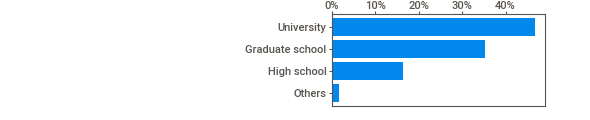
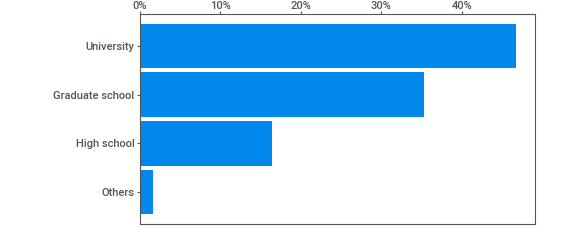
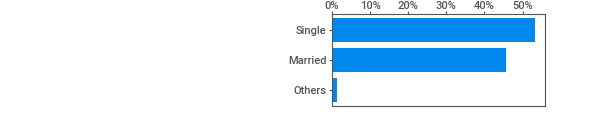
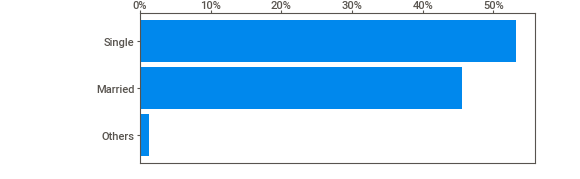
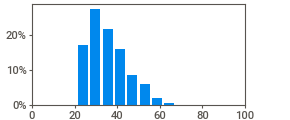
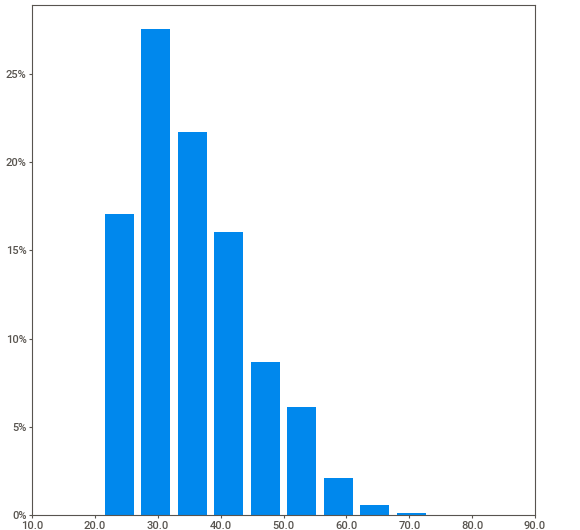
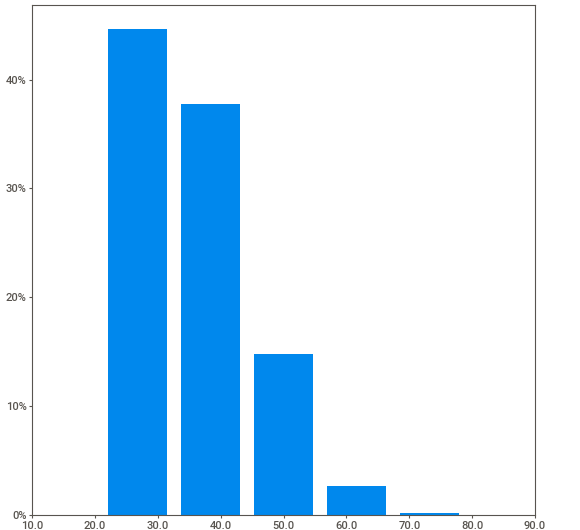
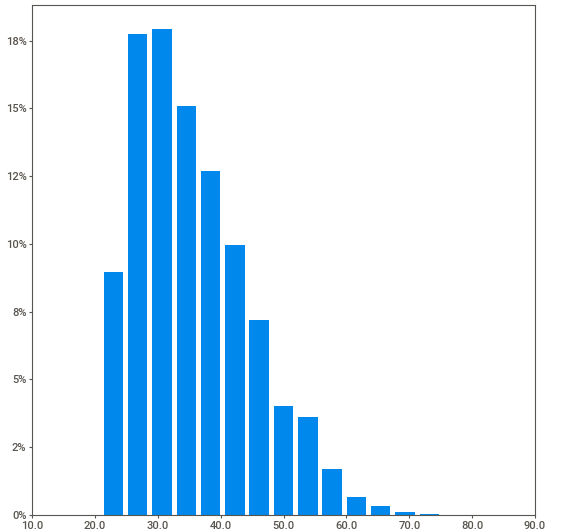
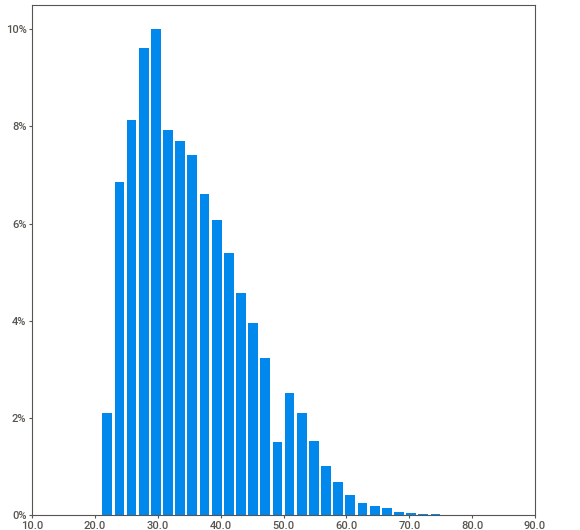
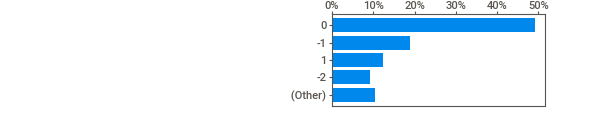
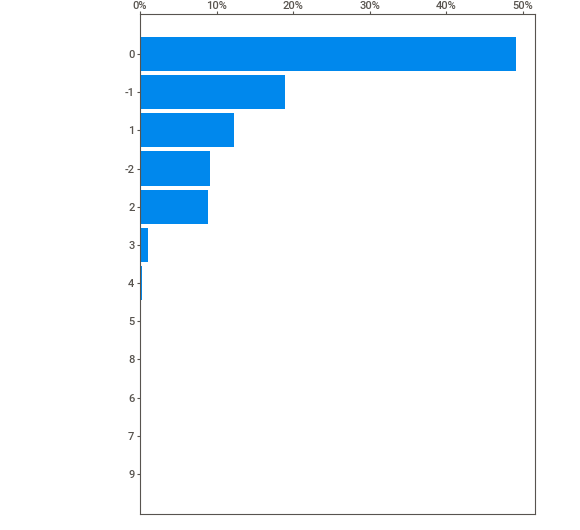
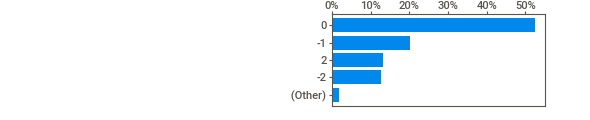
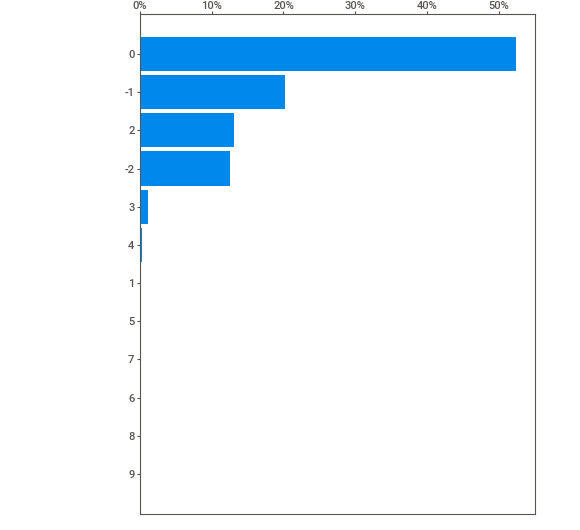
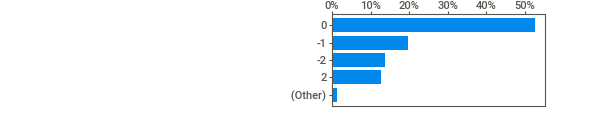
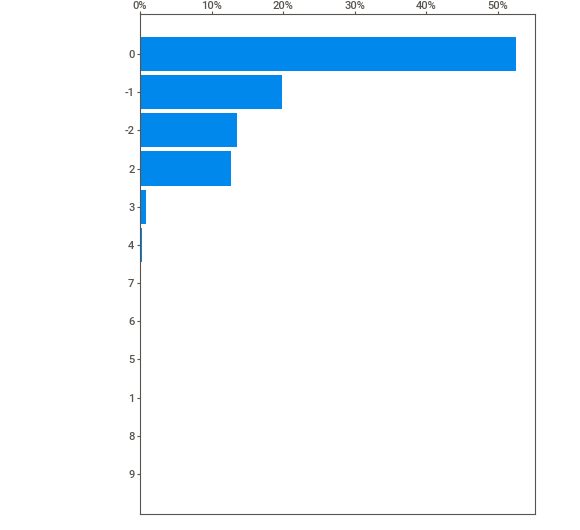
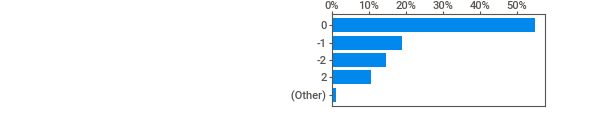
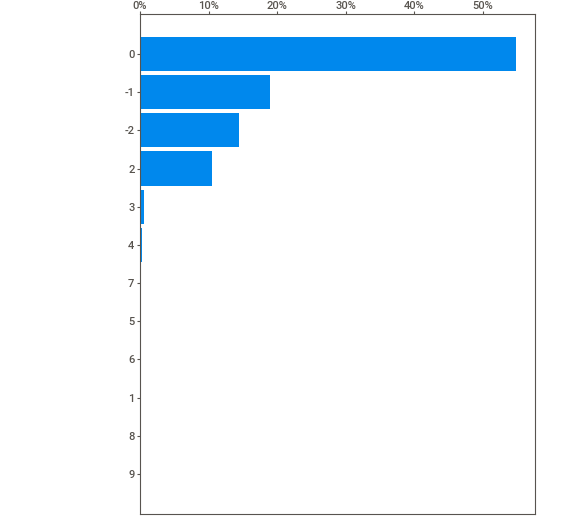
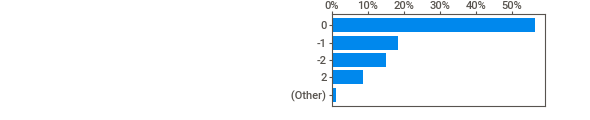
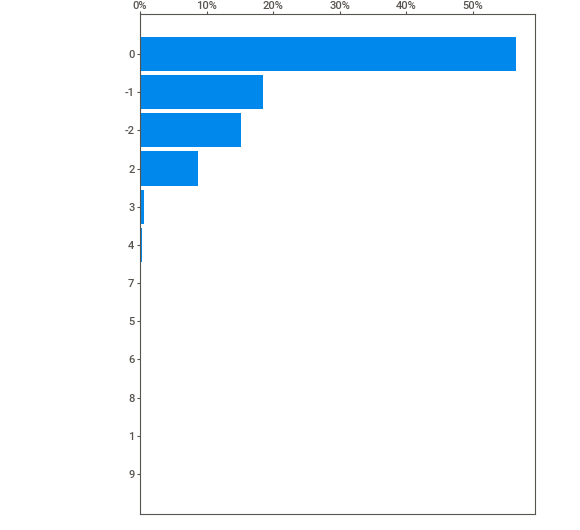
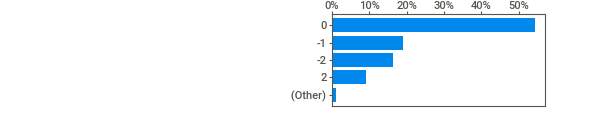
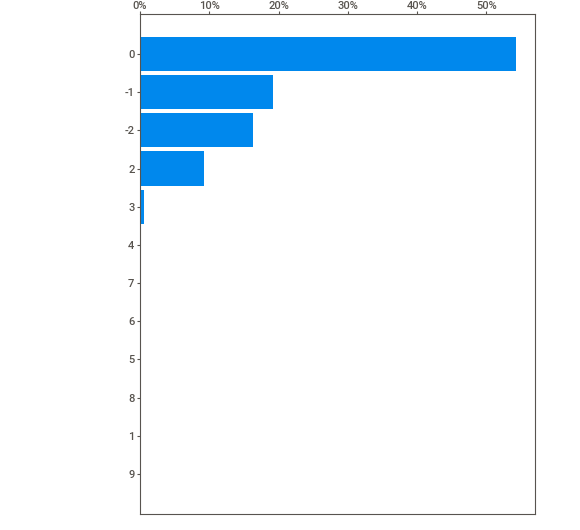
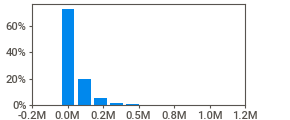
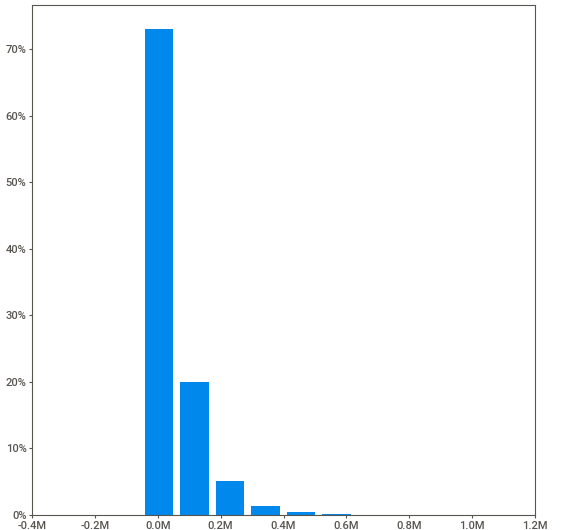
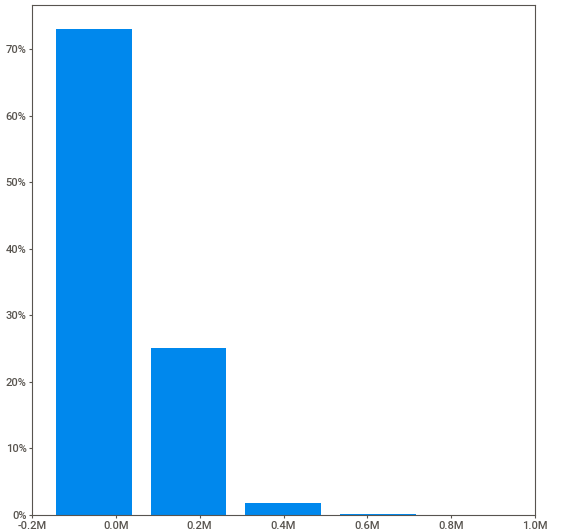
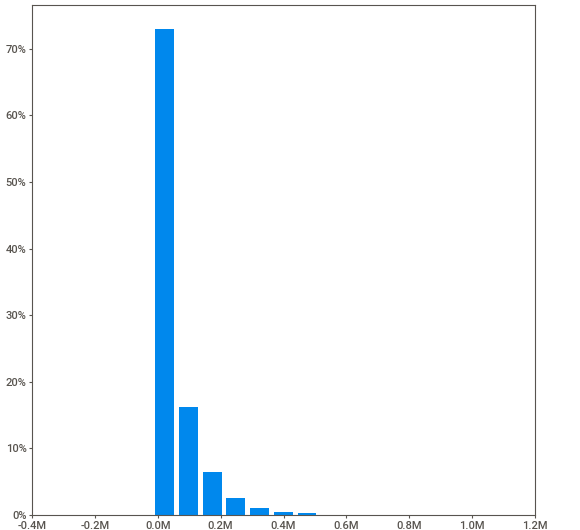
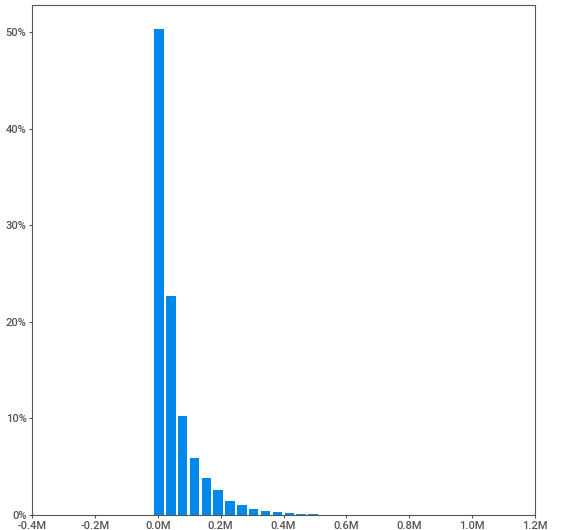
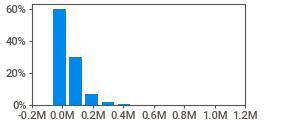
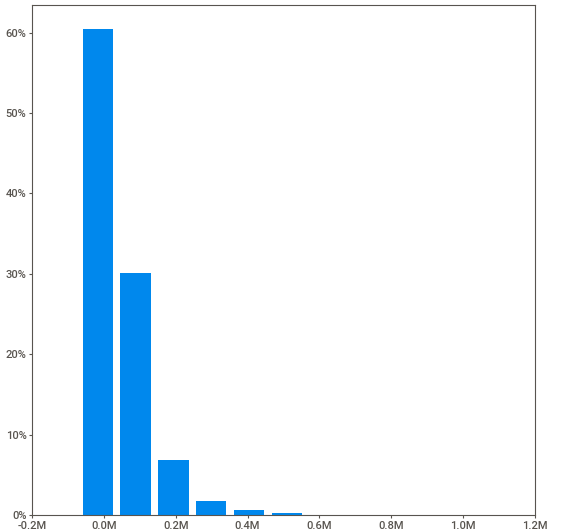
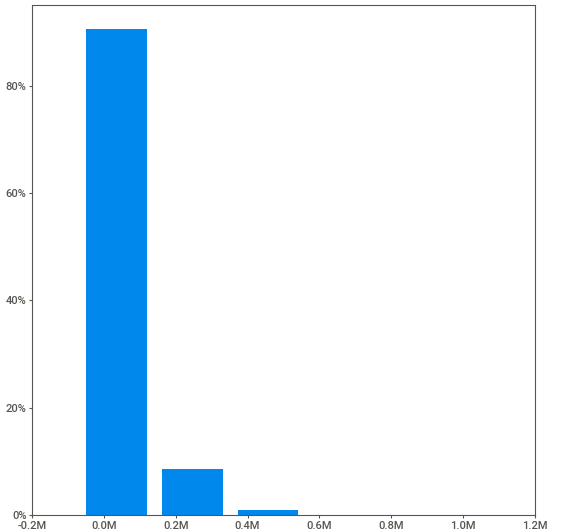
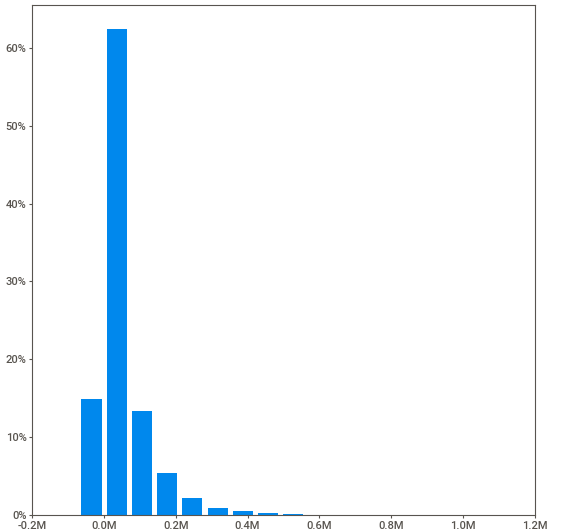
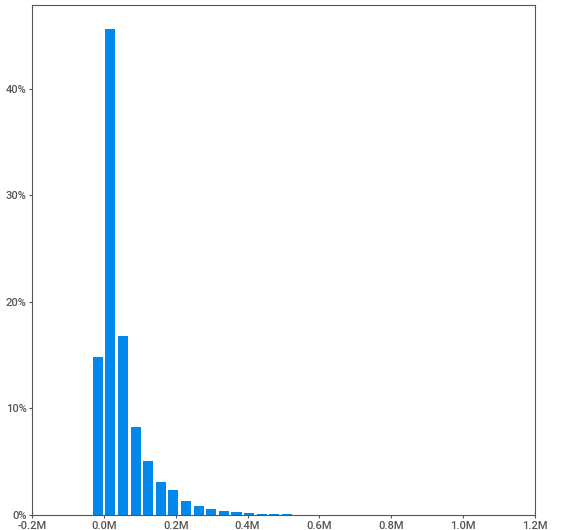
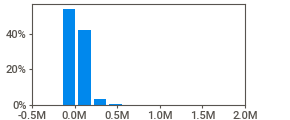
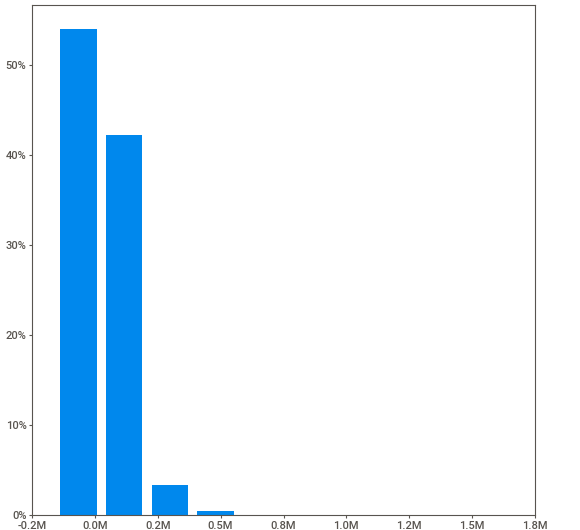
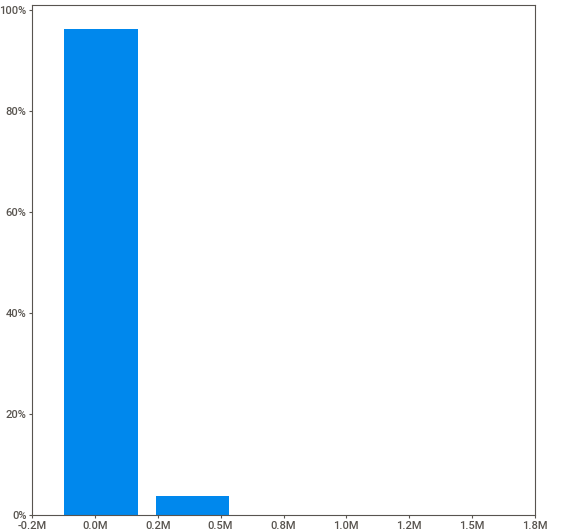
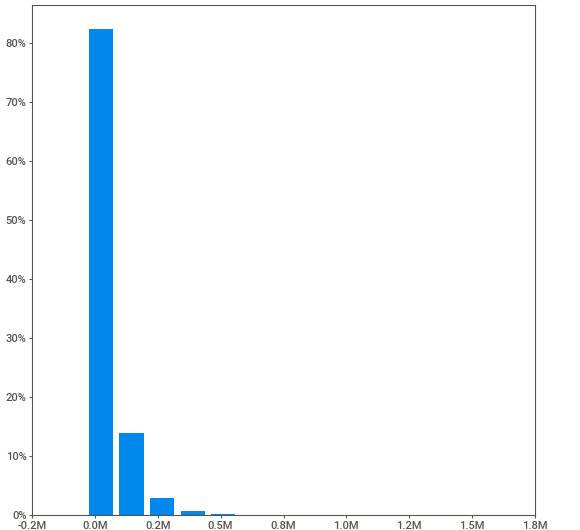
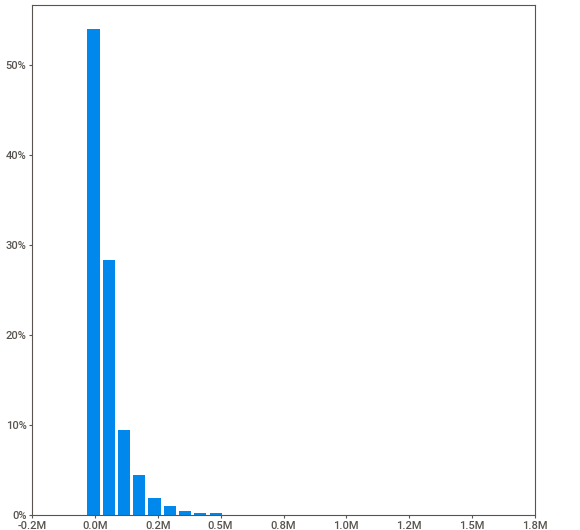
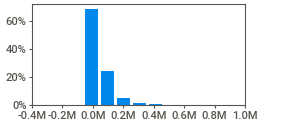
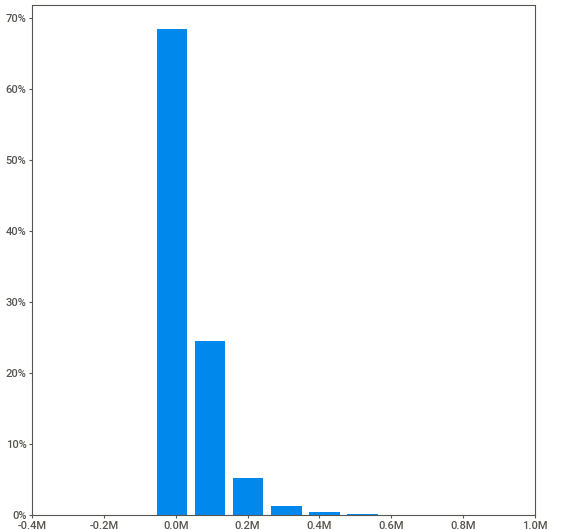
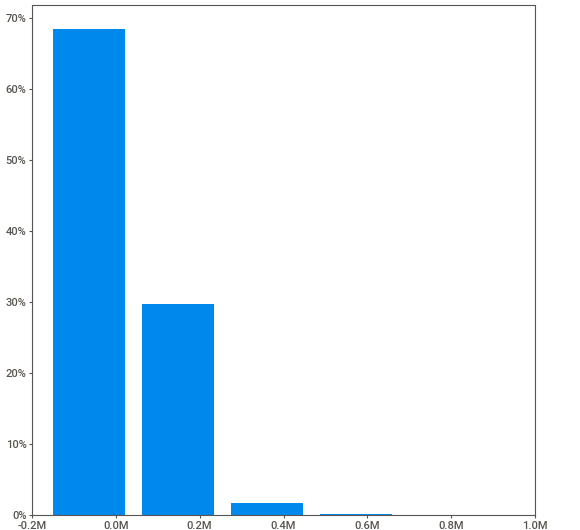
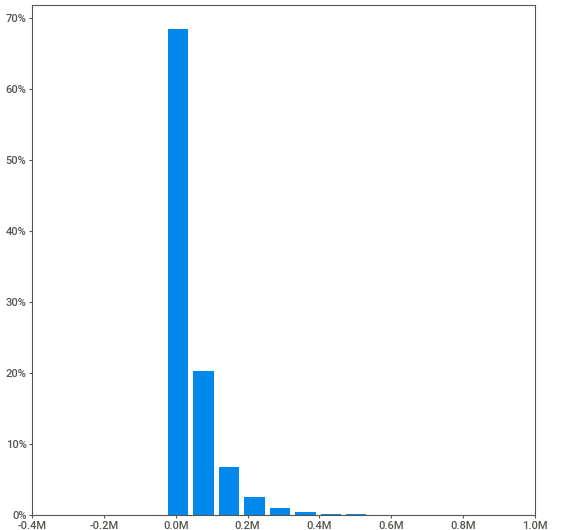
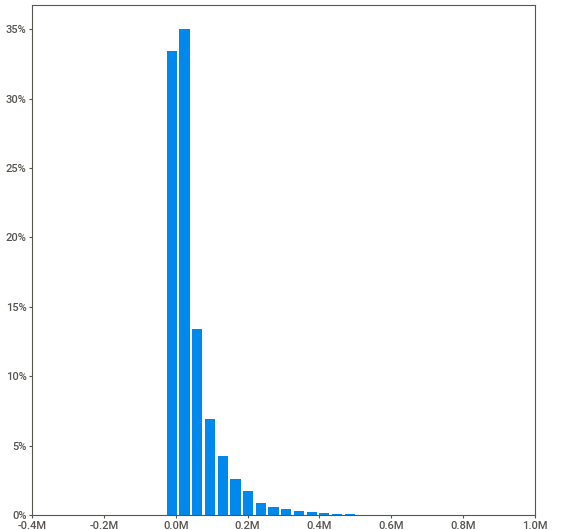
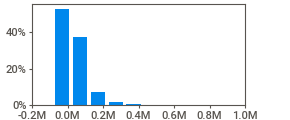
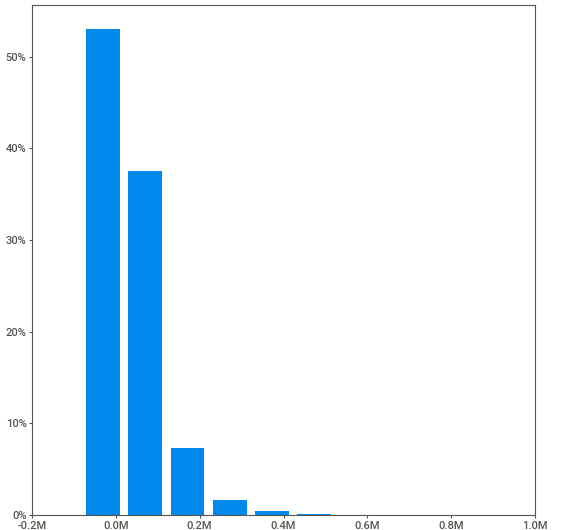
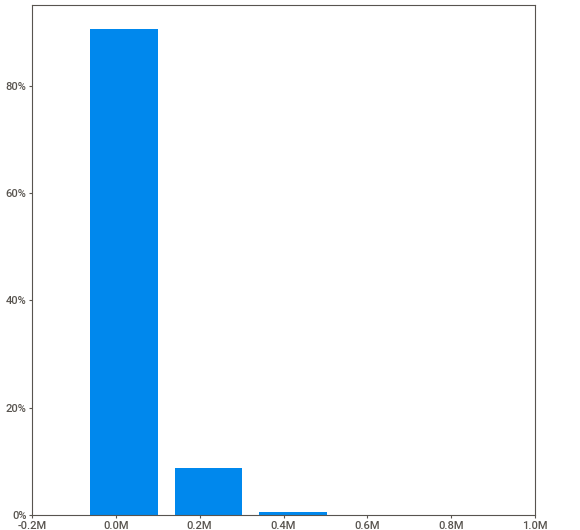
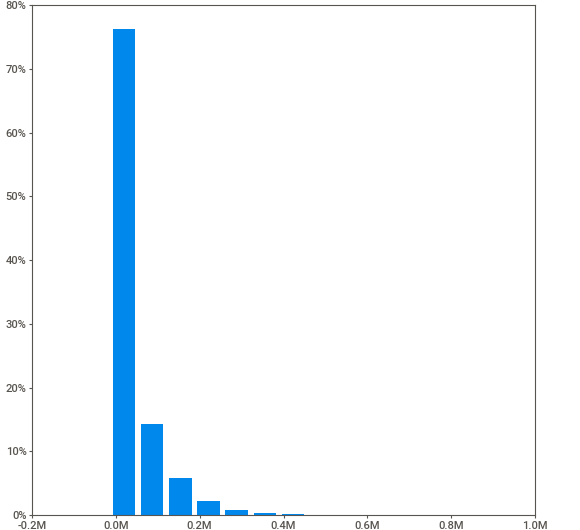
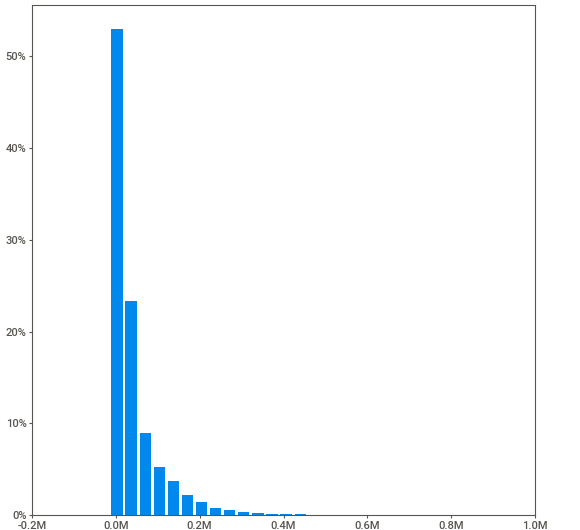
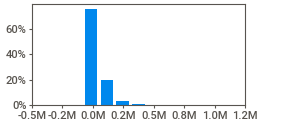
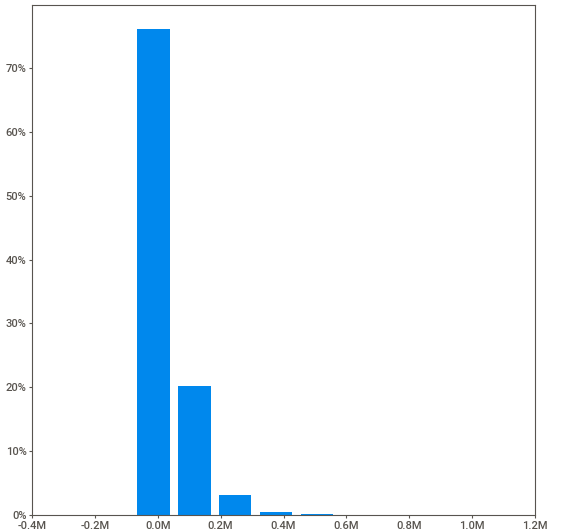
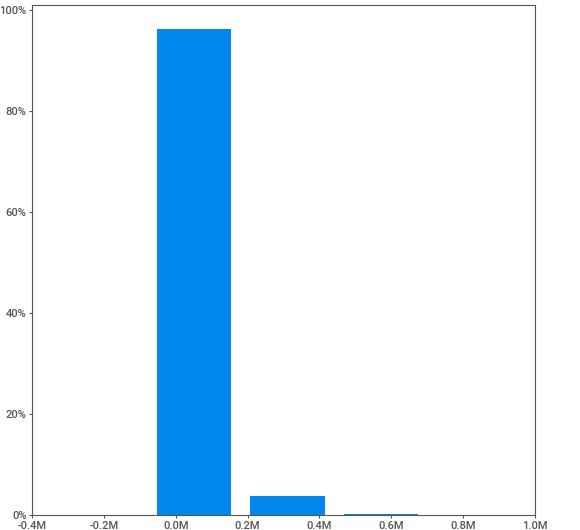
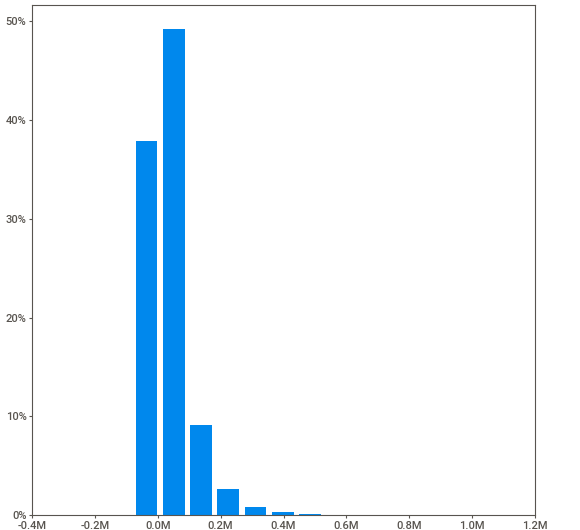
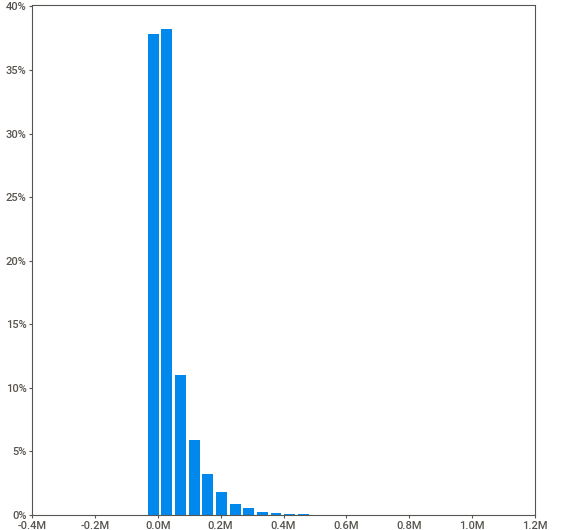
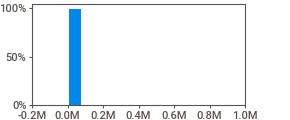
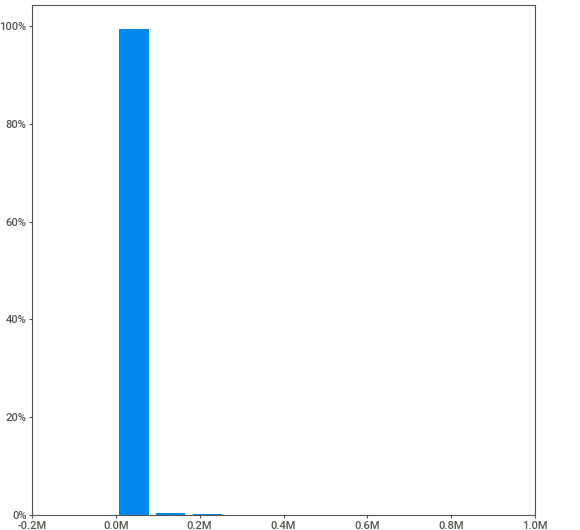
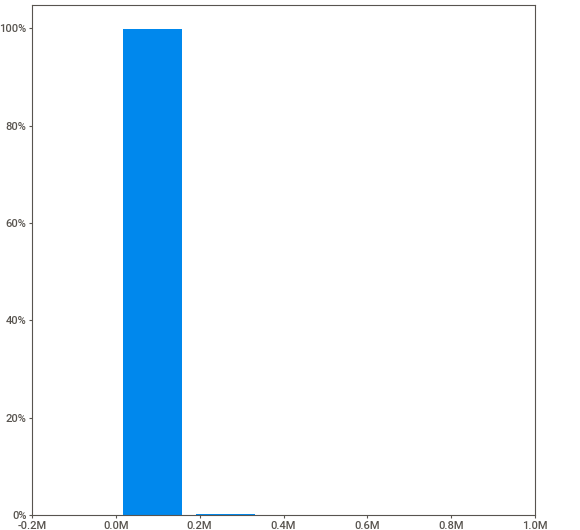
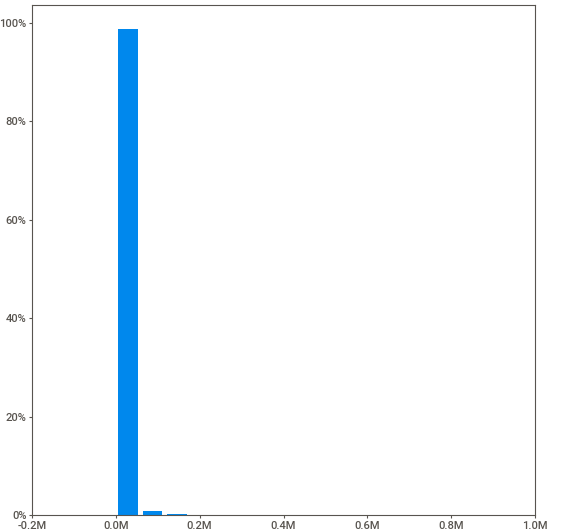
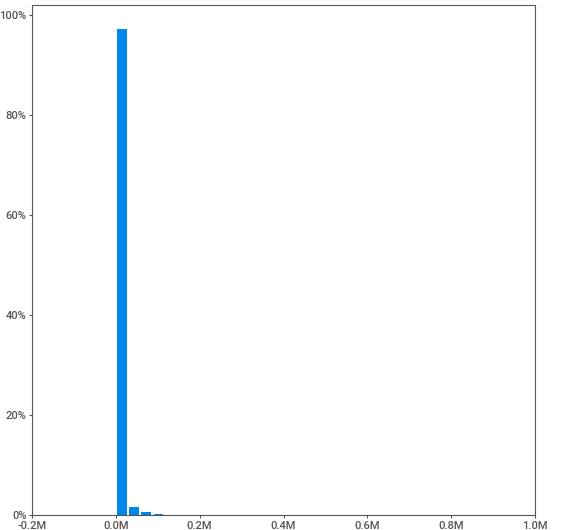
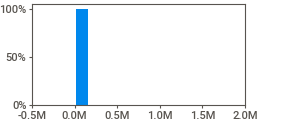
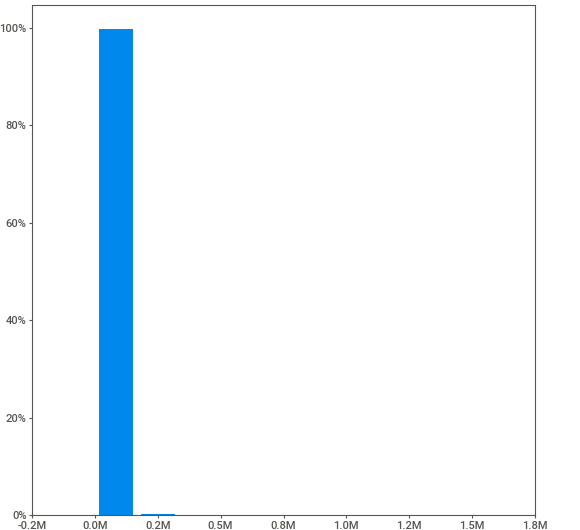
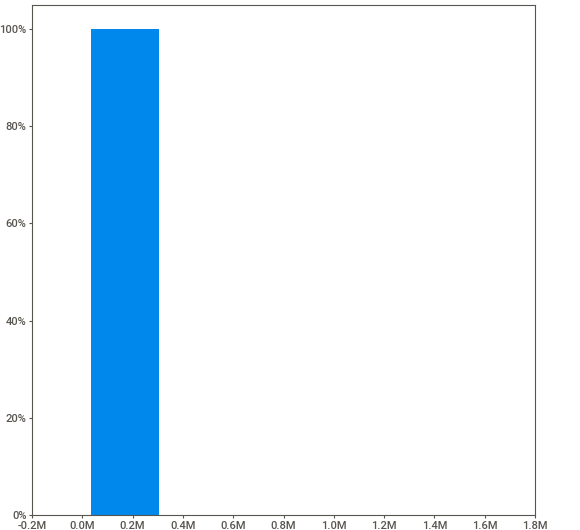
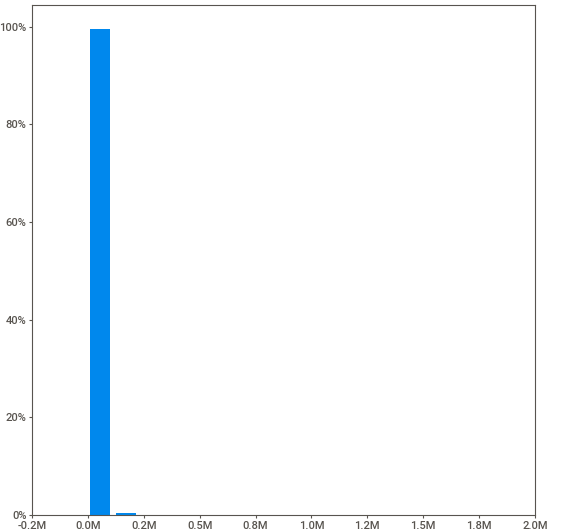
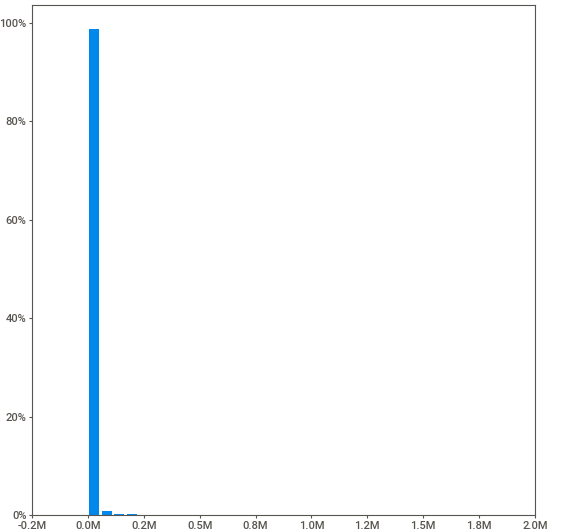
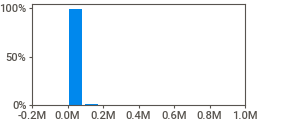
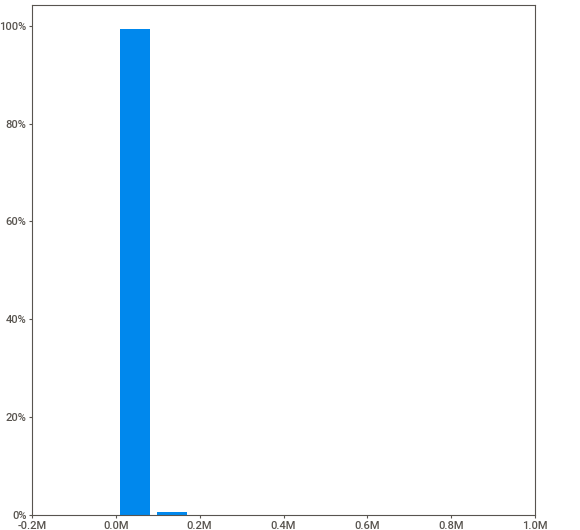
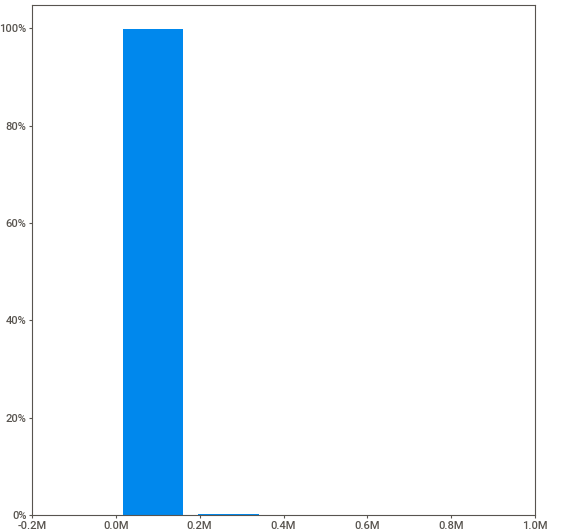
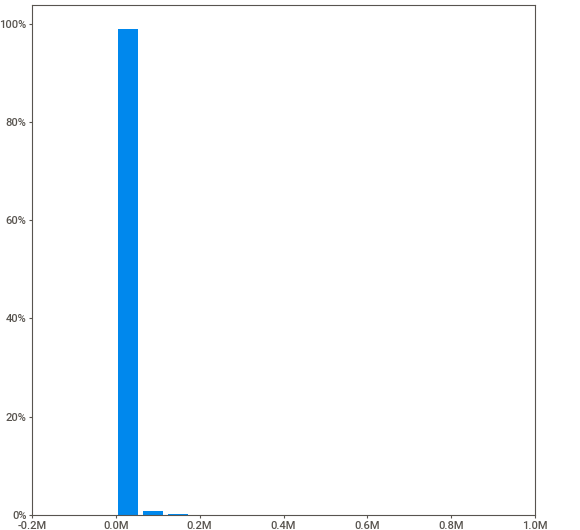
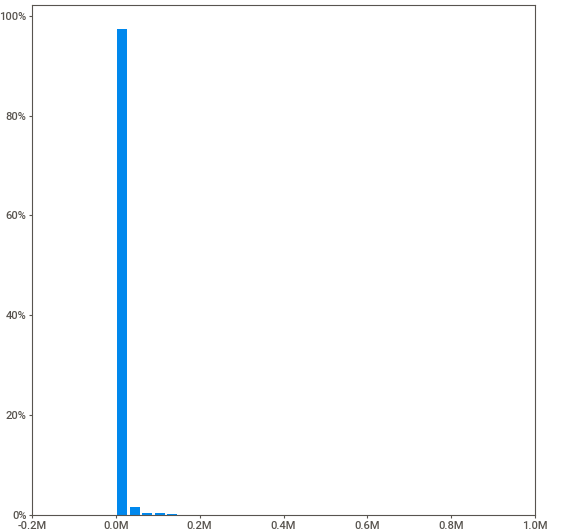
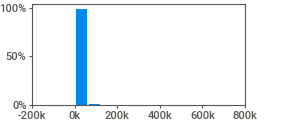
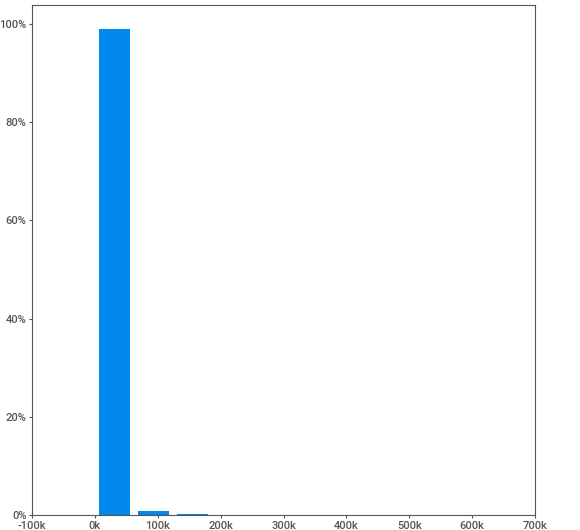
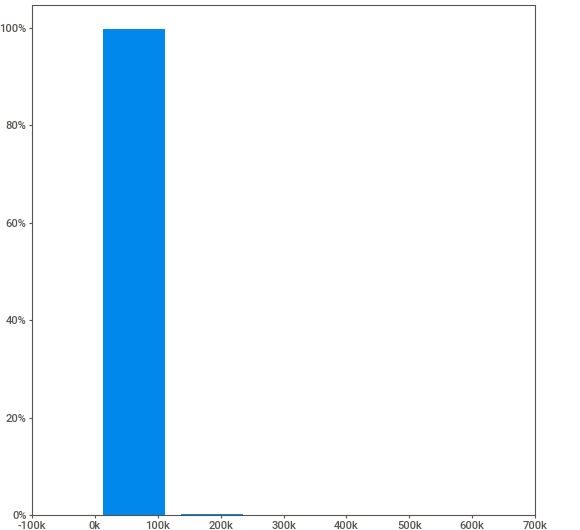
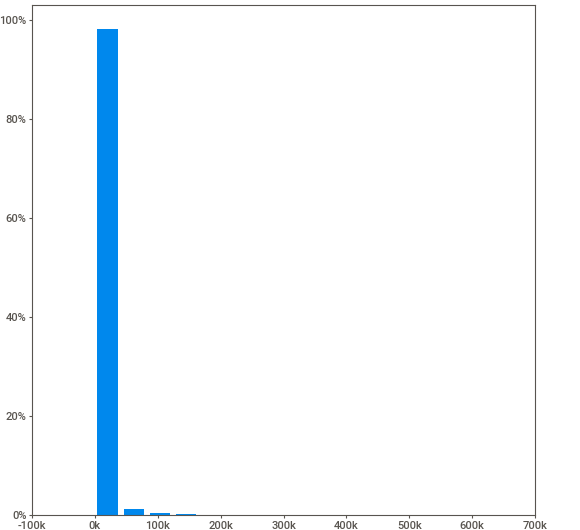
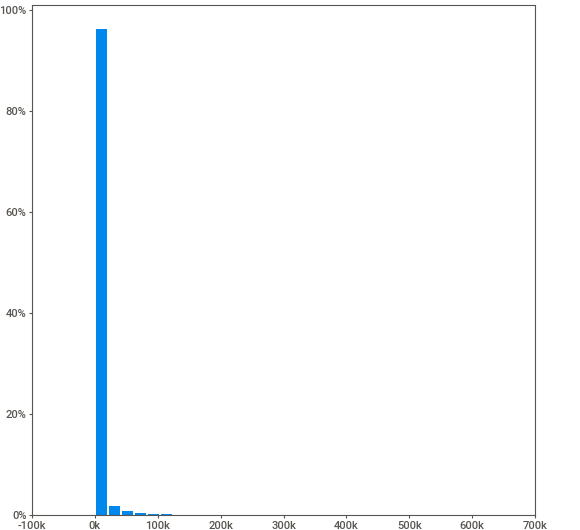
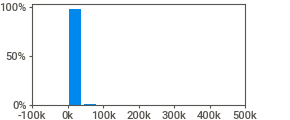
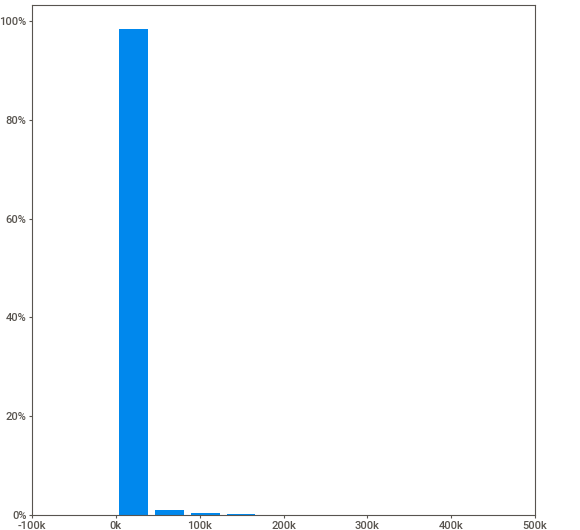
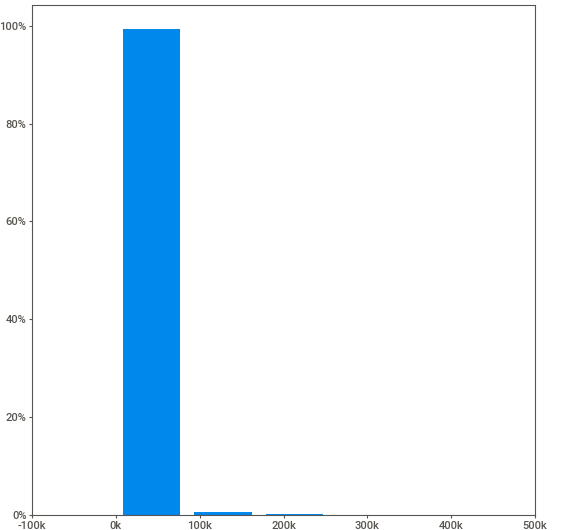
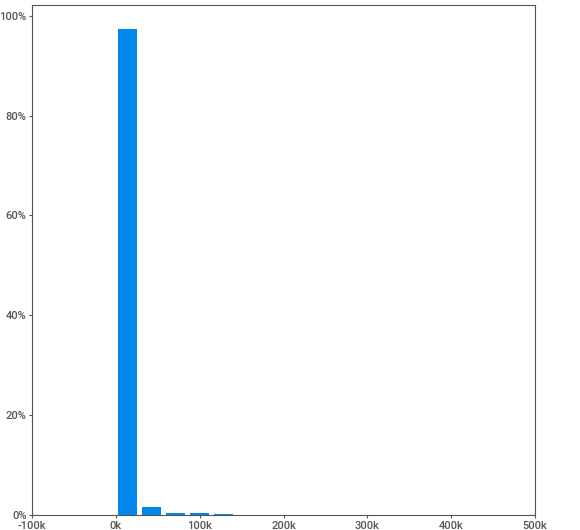
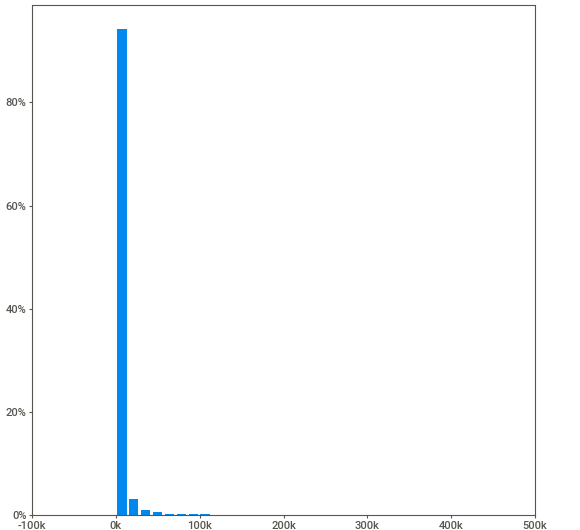
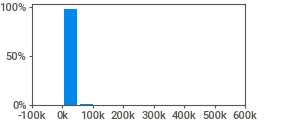
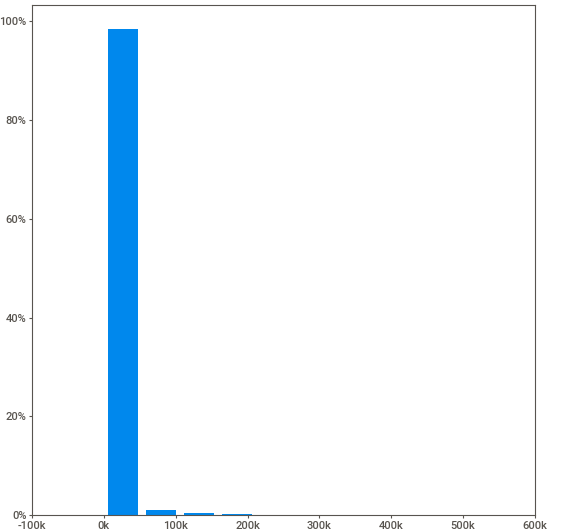
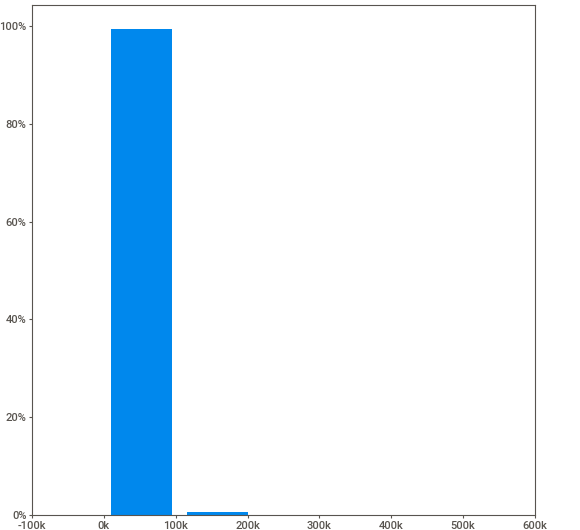
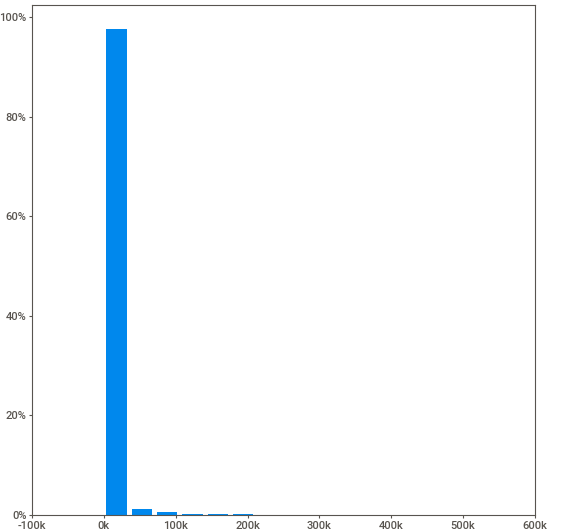
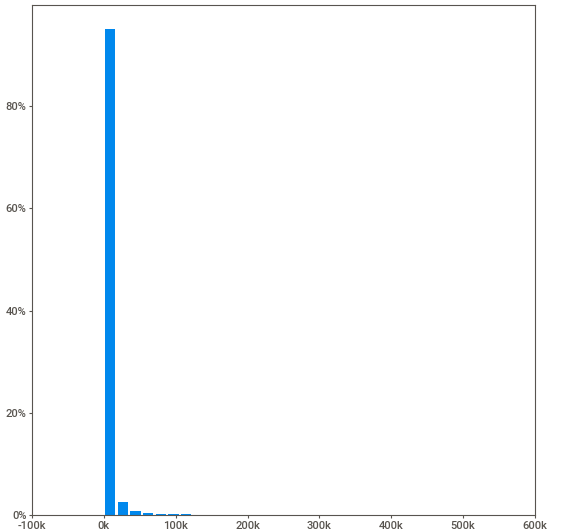
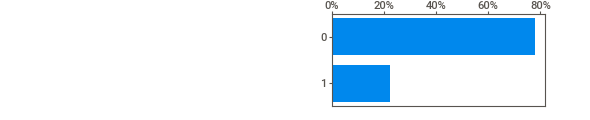
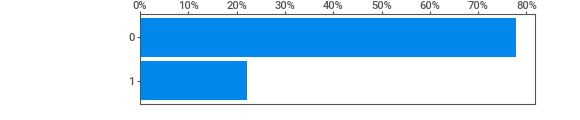
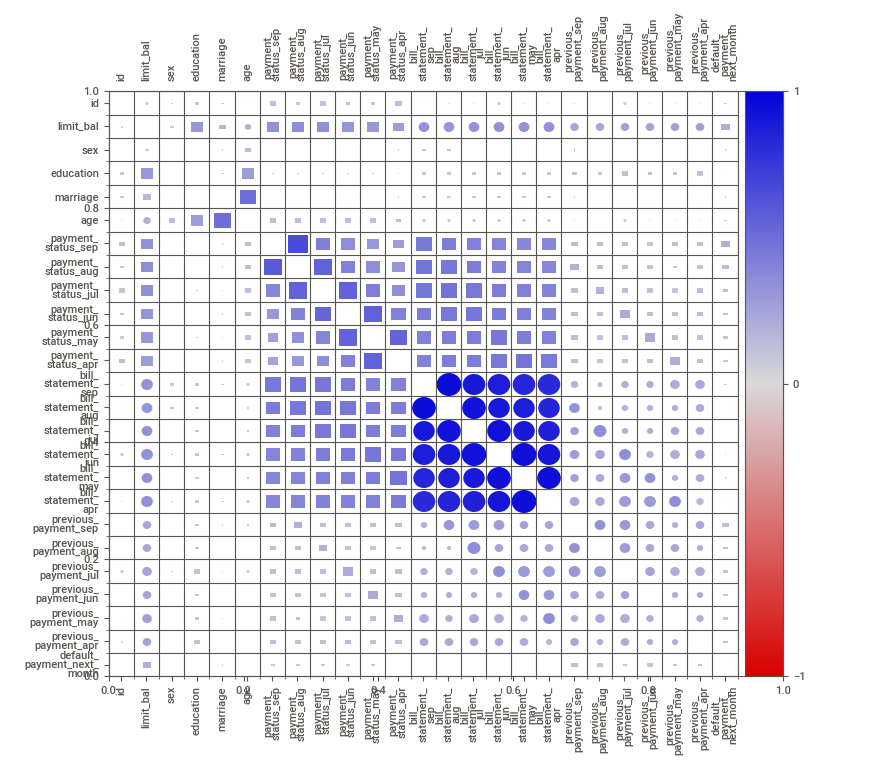
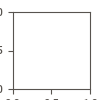

In [24]:
my_report.show_notebook()

In [25]:
my_analyse =  sv.analyze(source=raw_df , target_feat = "default payment next month")

Done! Use 'show' commands to display/save.   |██████████| [100%]   00:01 -> (00:00 left)



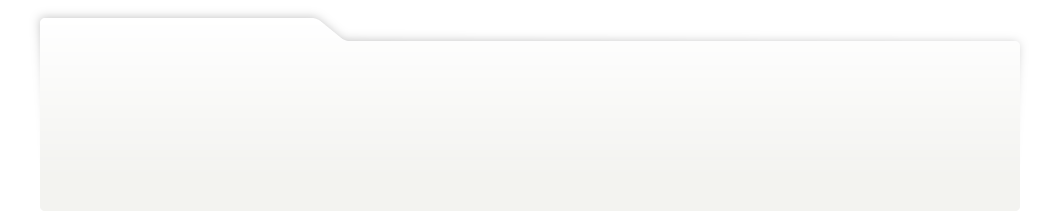
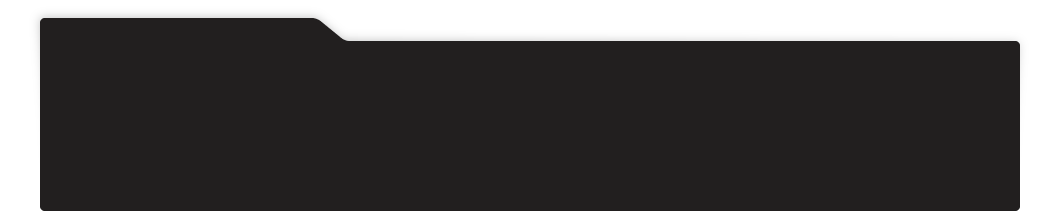
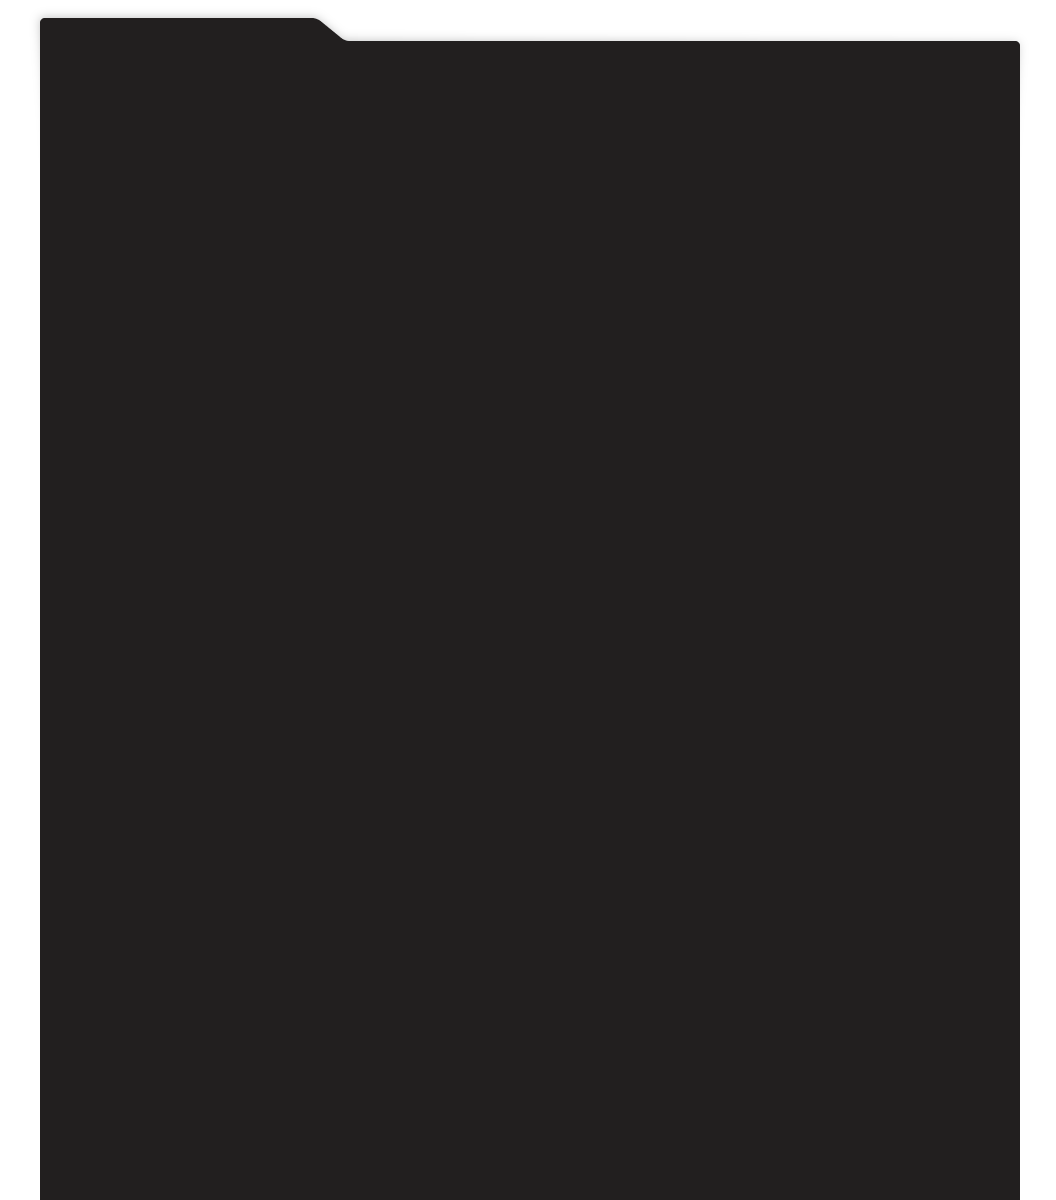
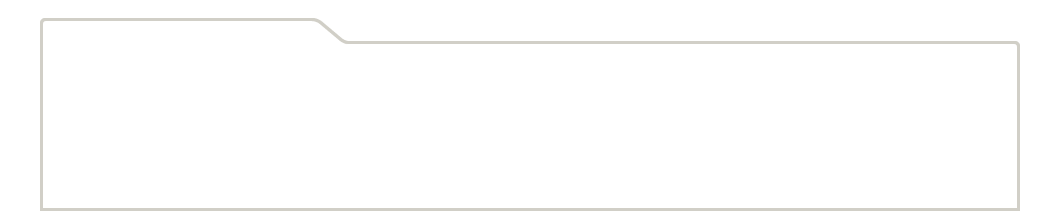
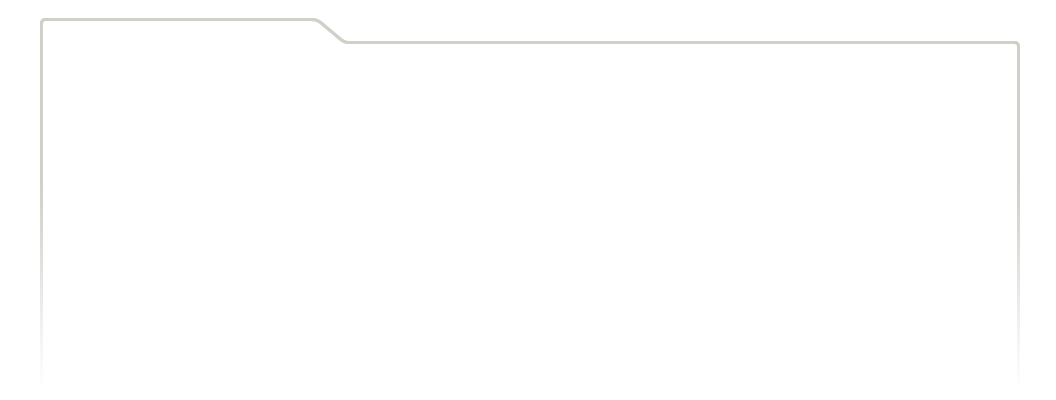
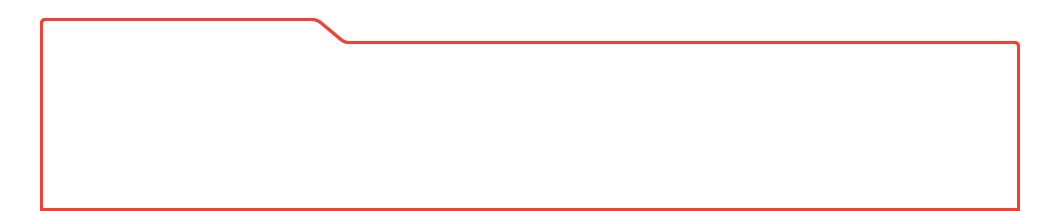
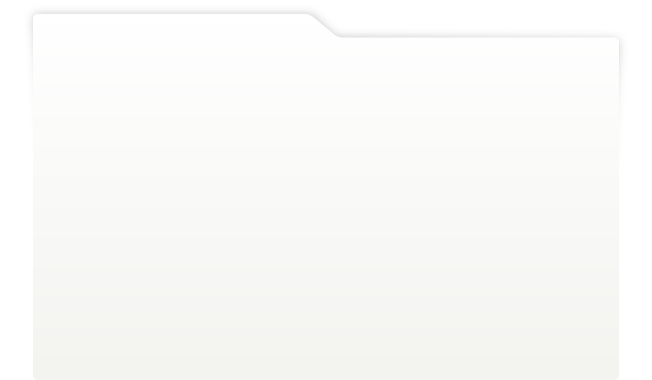
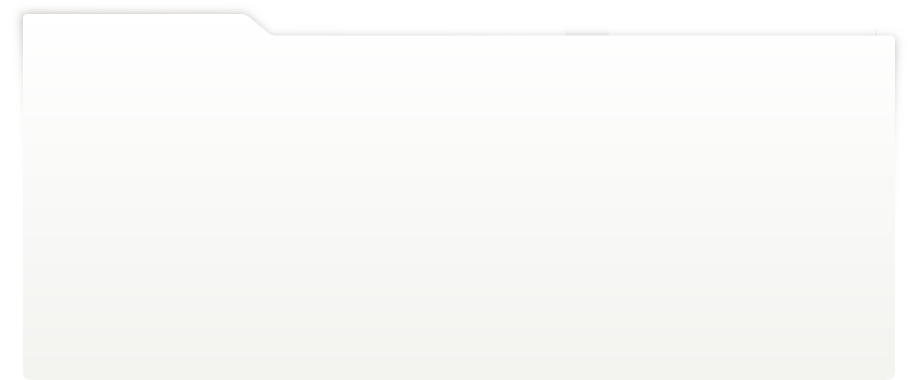
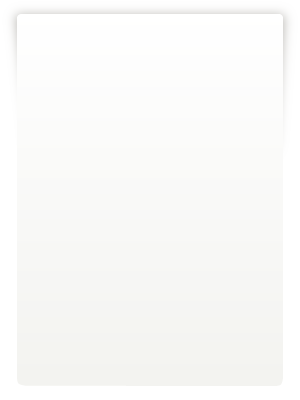
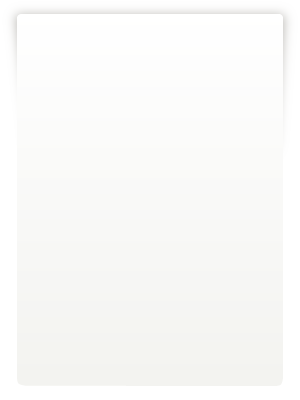
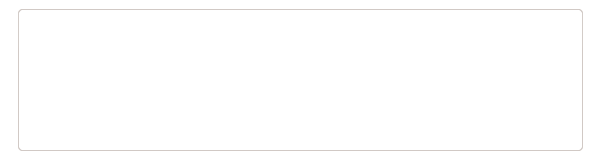
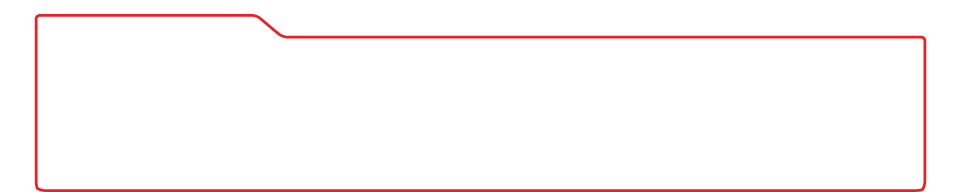
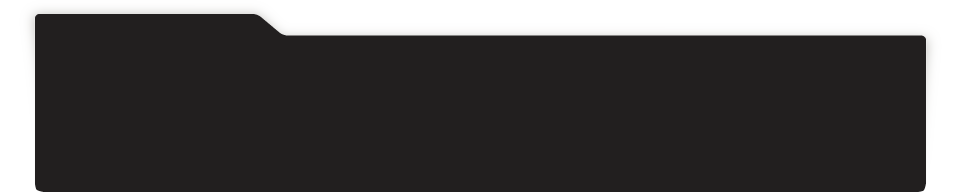
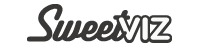
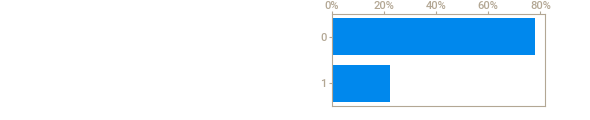
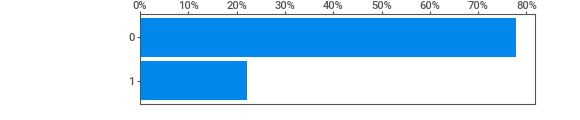
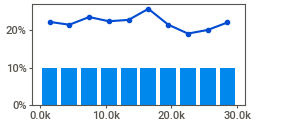
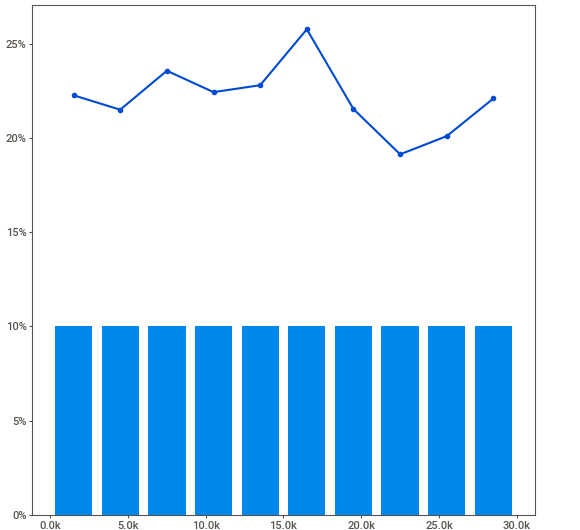
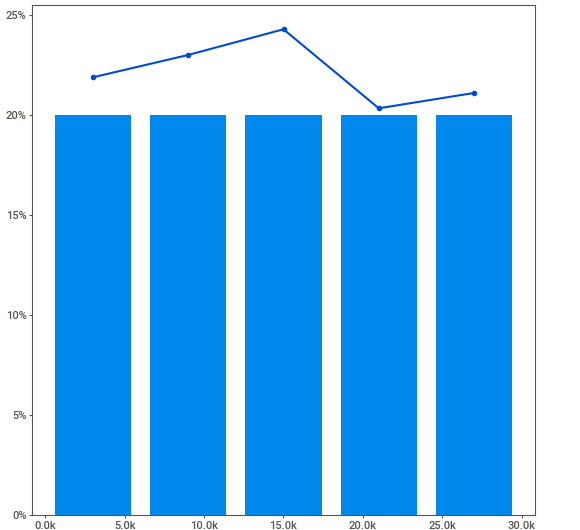
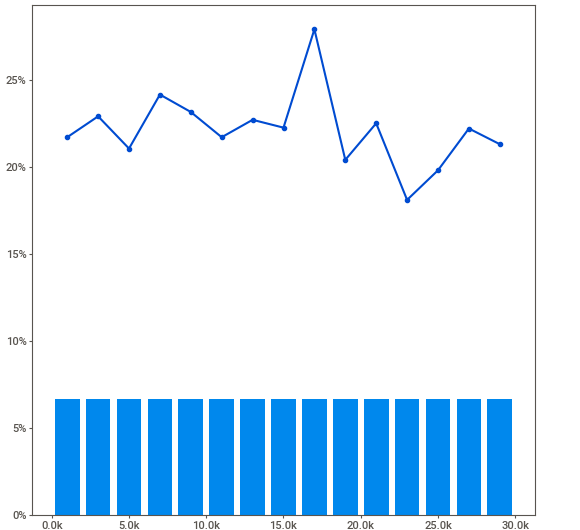
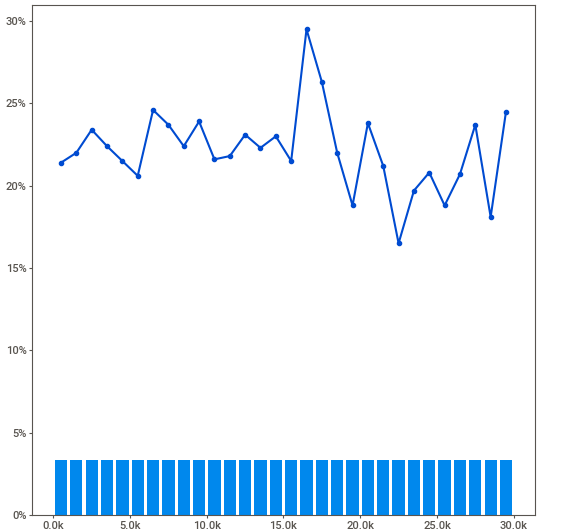
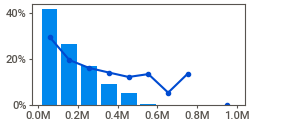
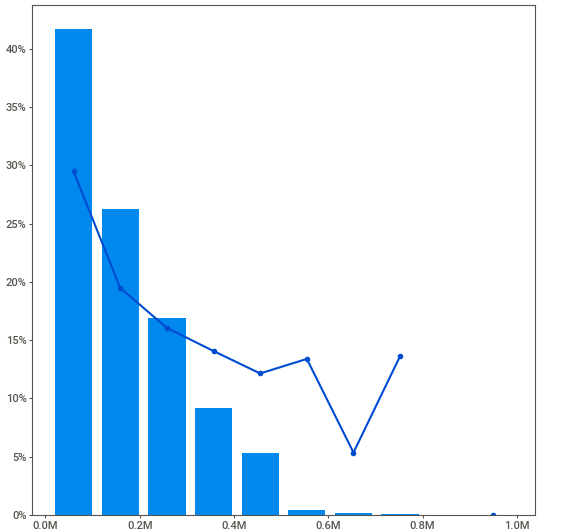
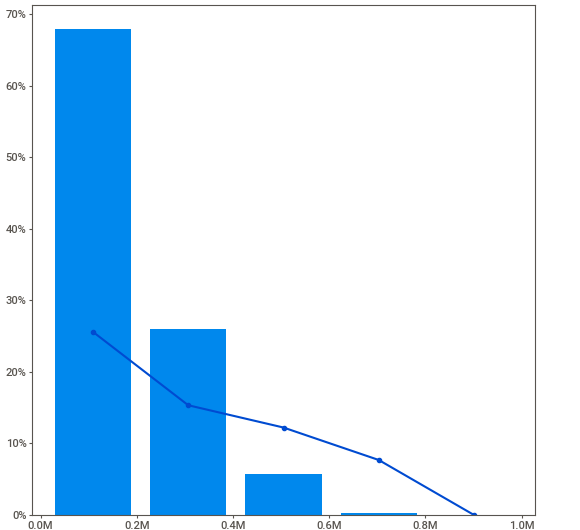
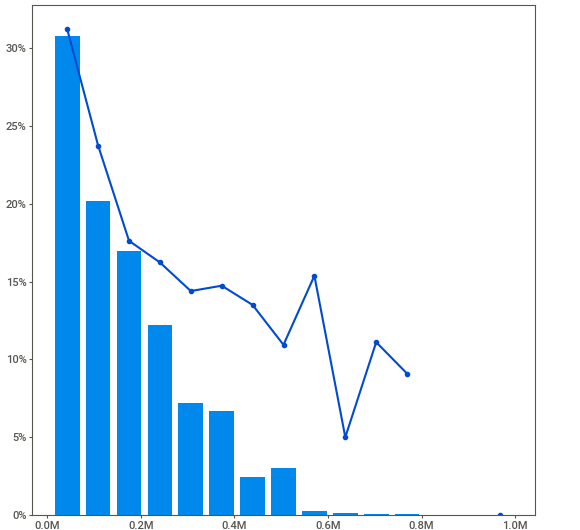
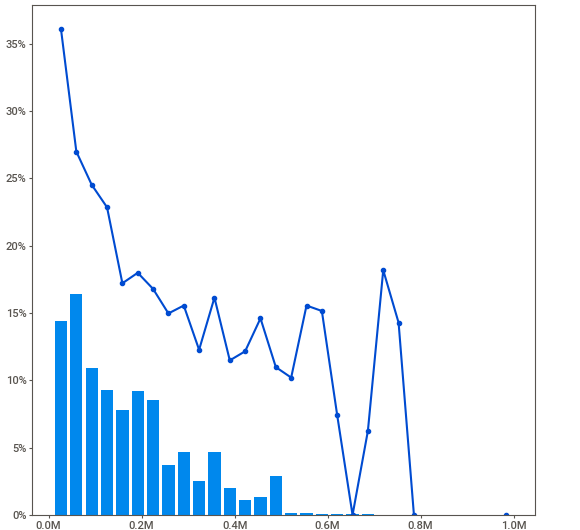
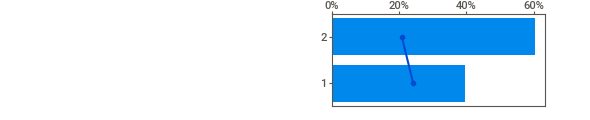
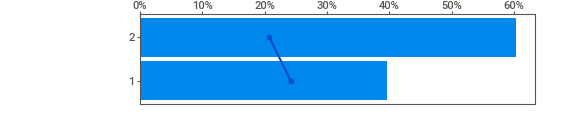
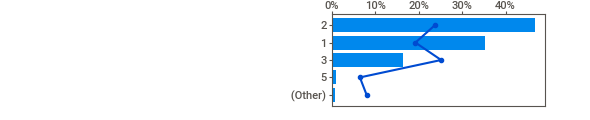
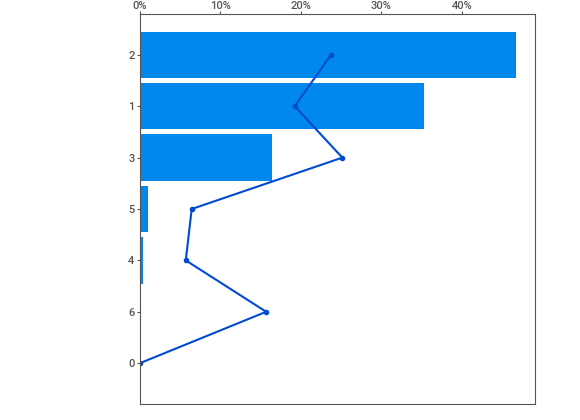
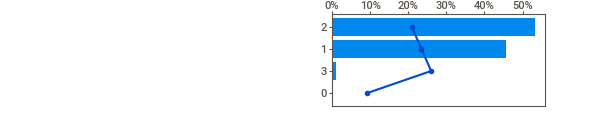
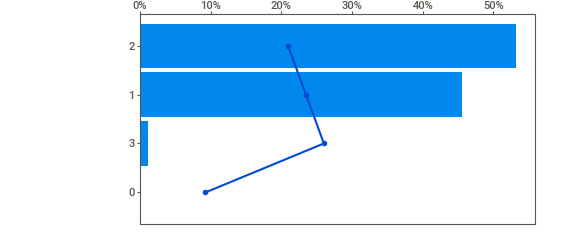
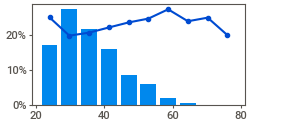
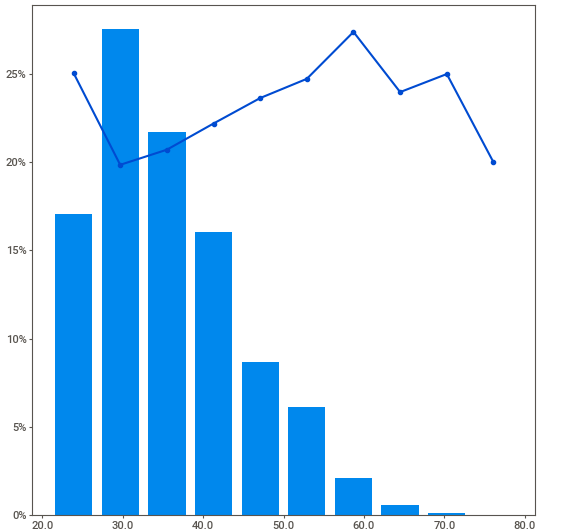
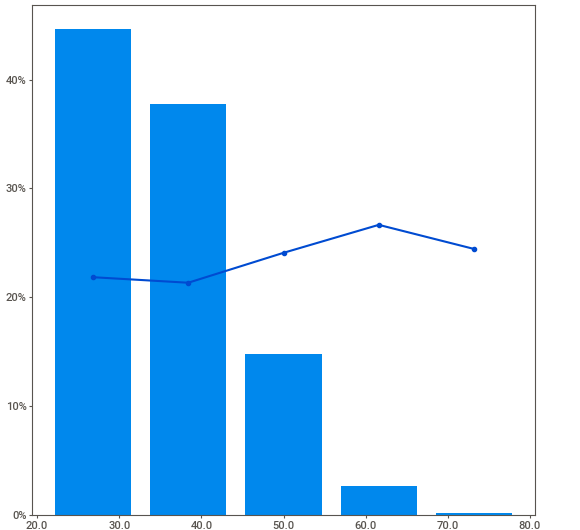
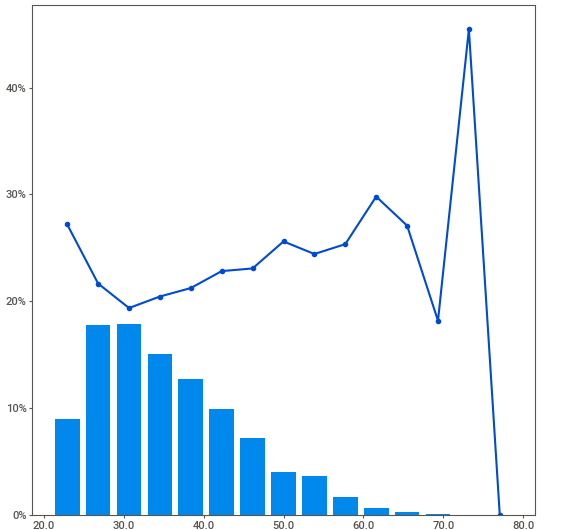
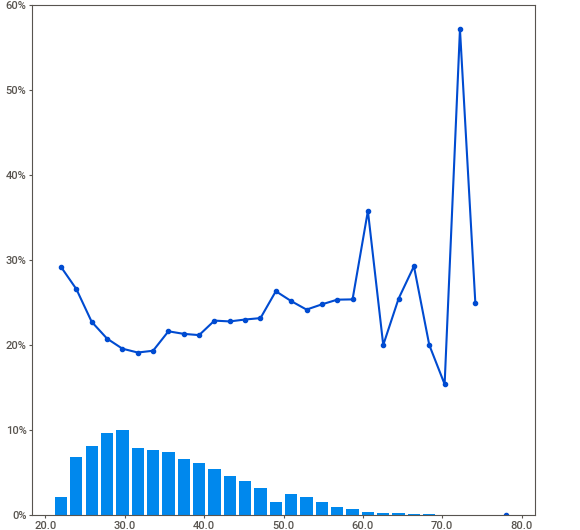
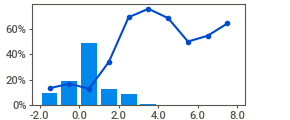
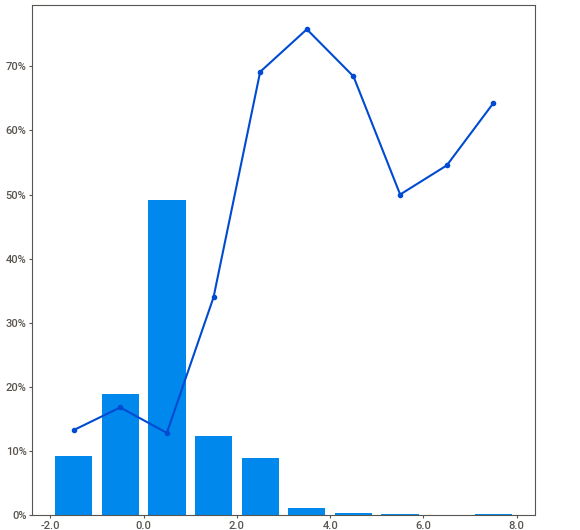
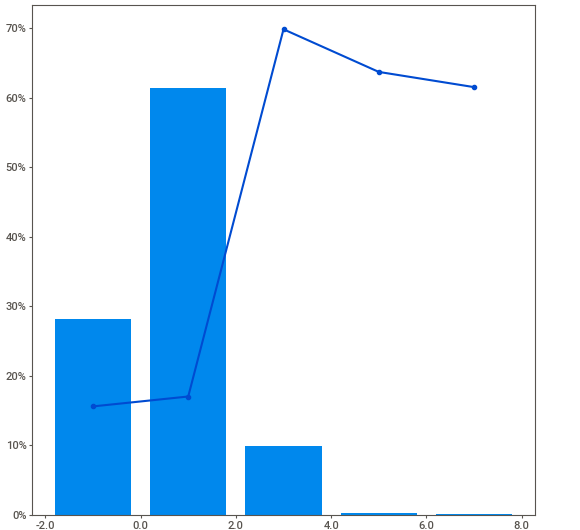
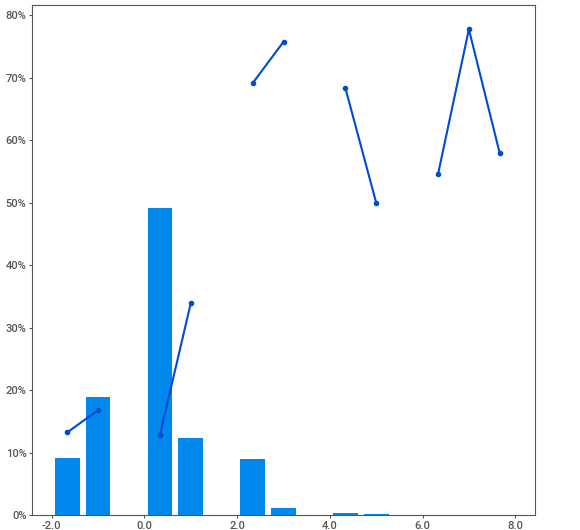
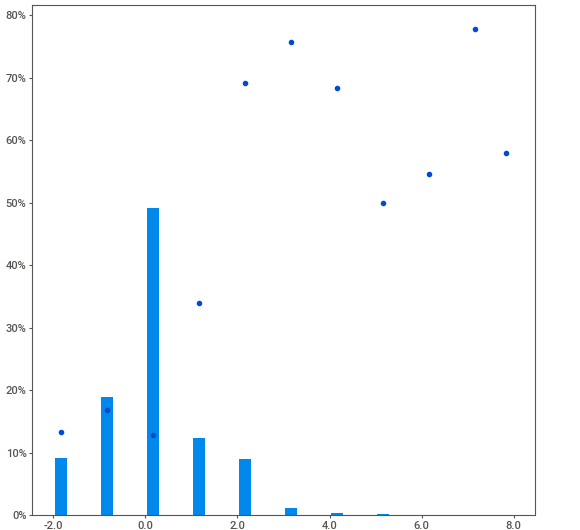
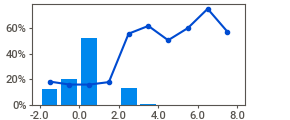
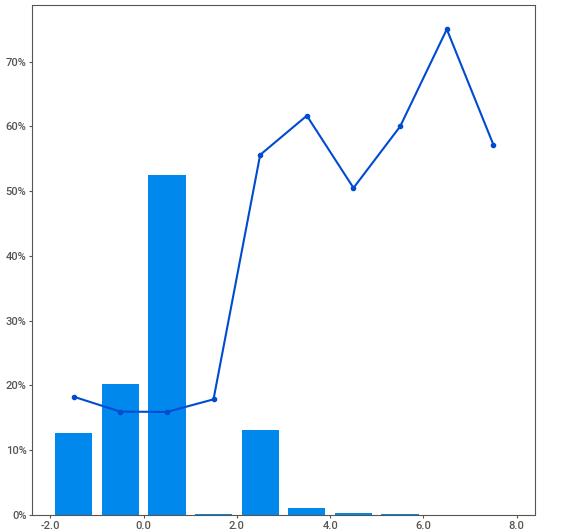
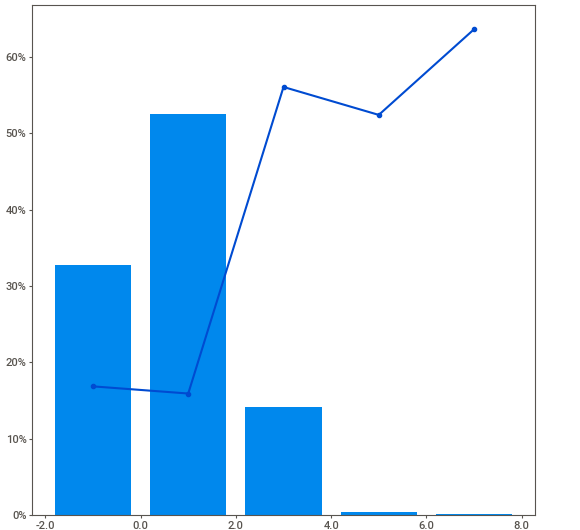
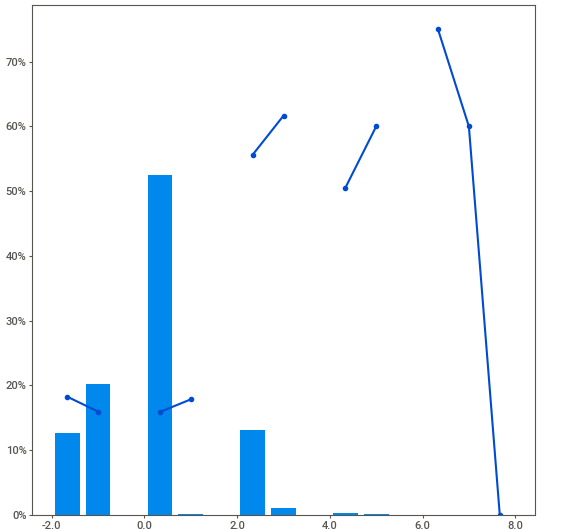
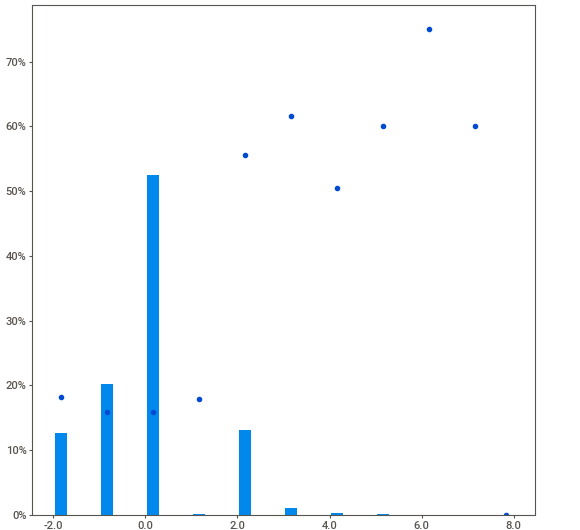
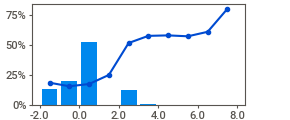
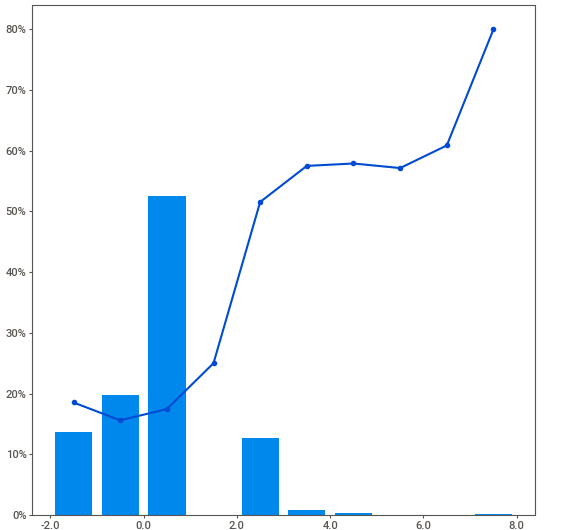
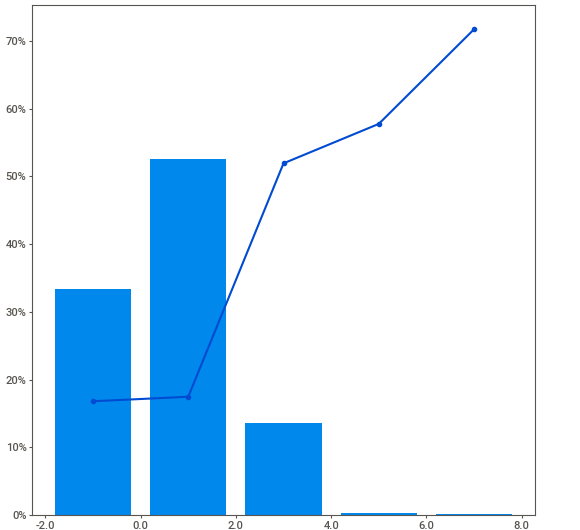
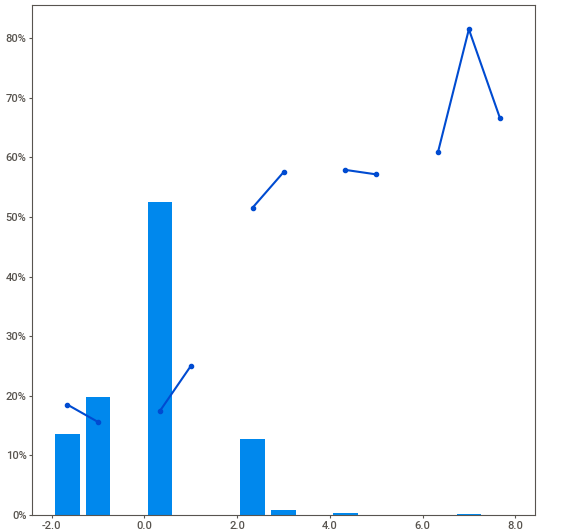
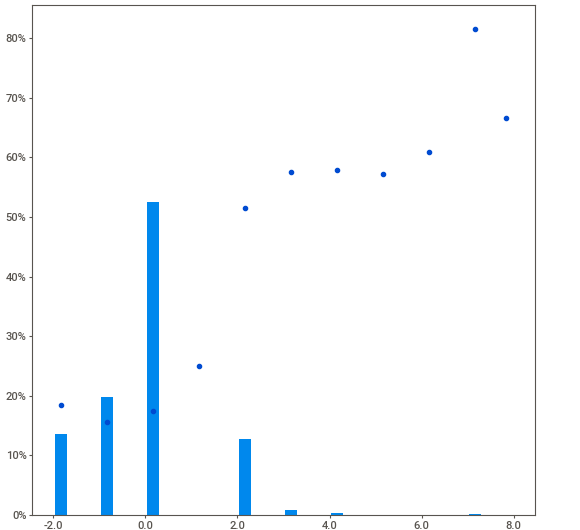
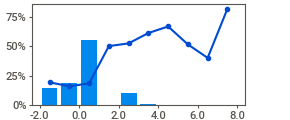
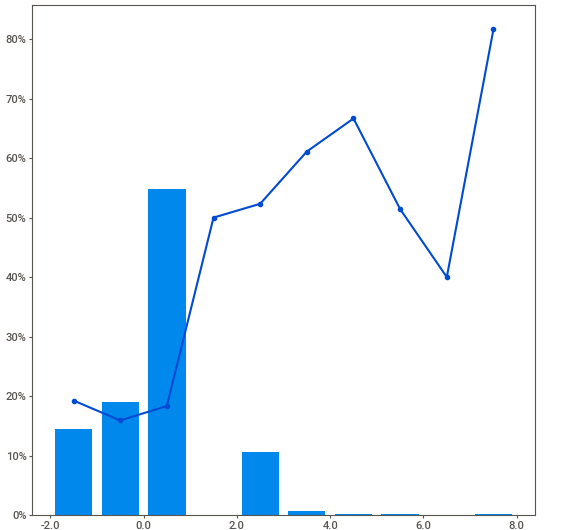
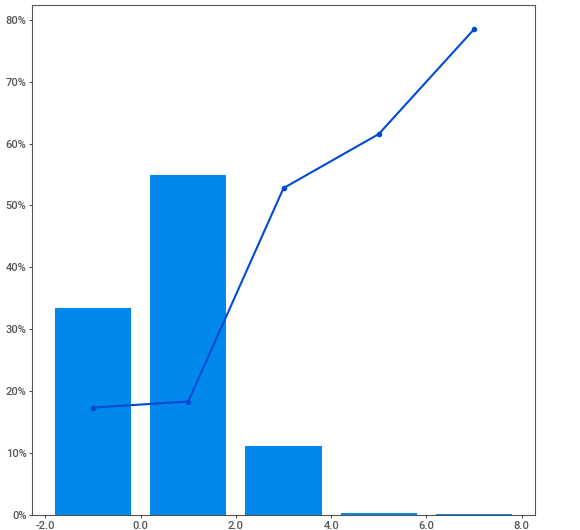
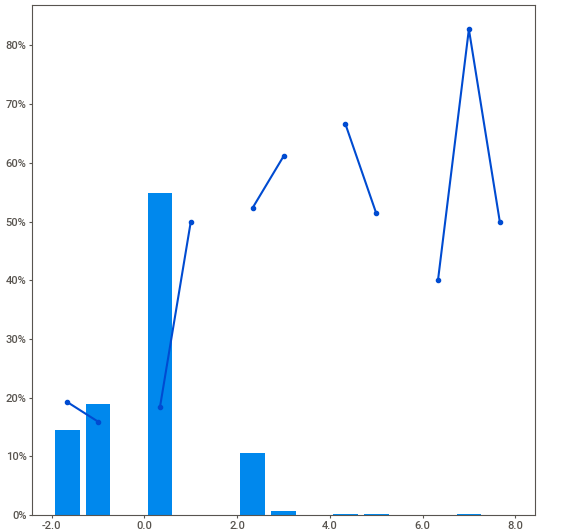
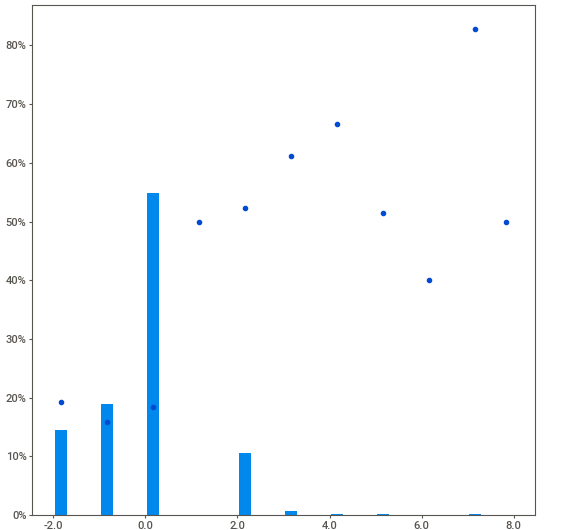
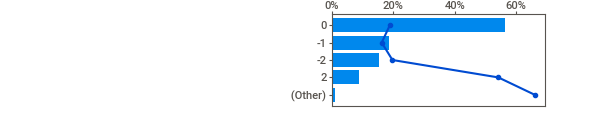
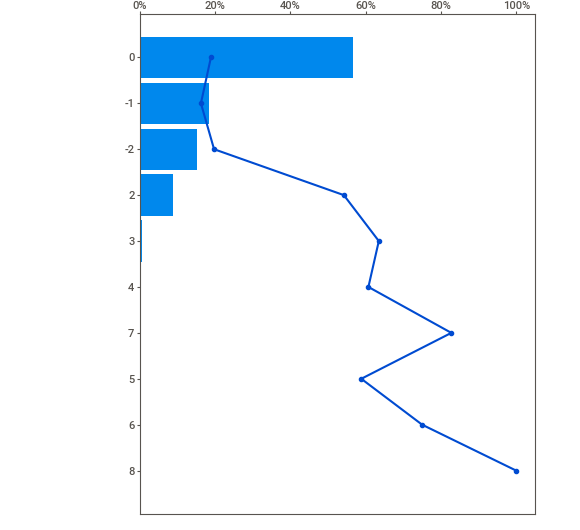
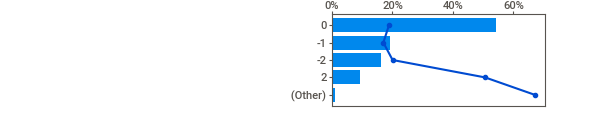
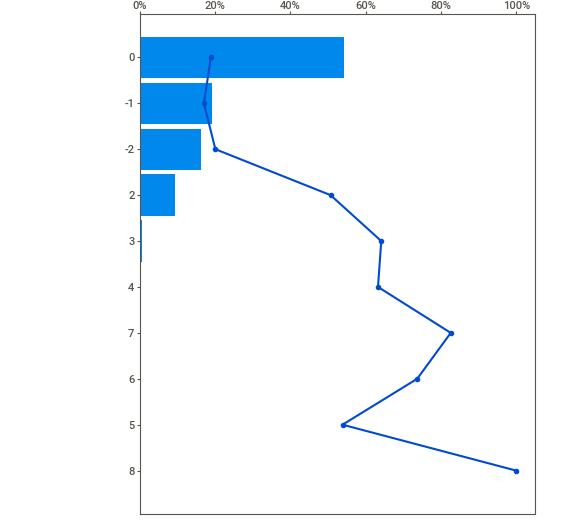
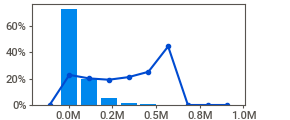
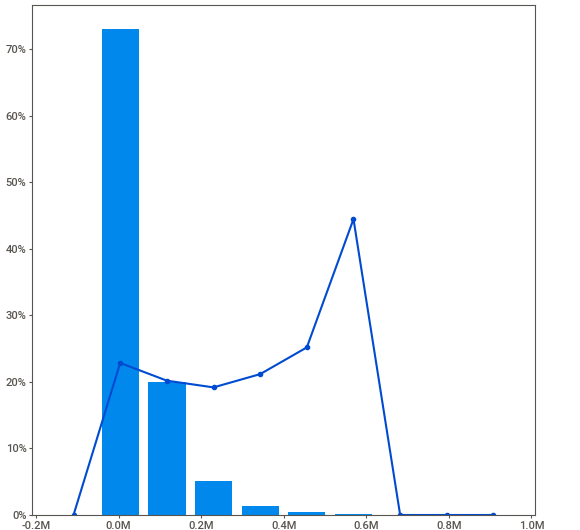
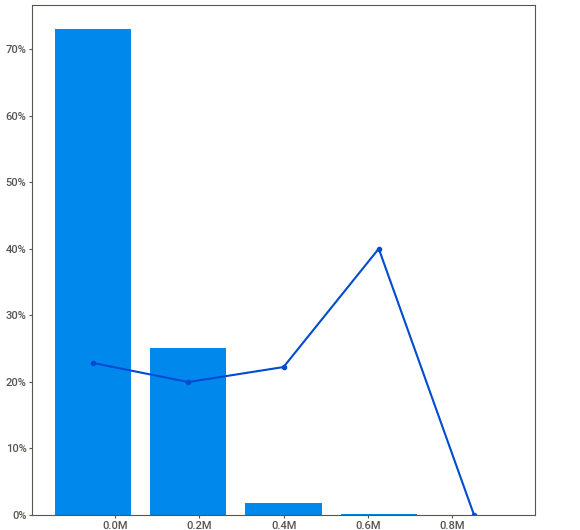
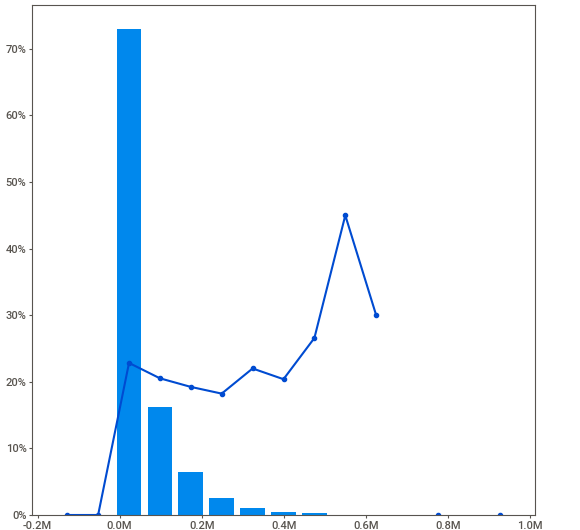
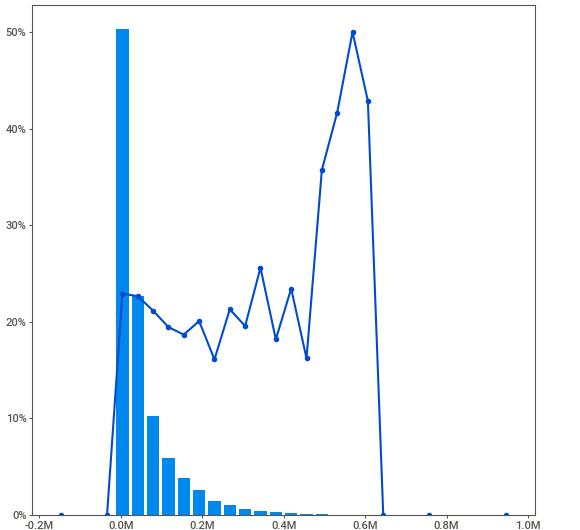
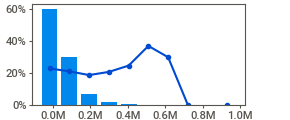
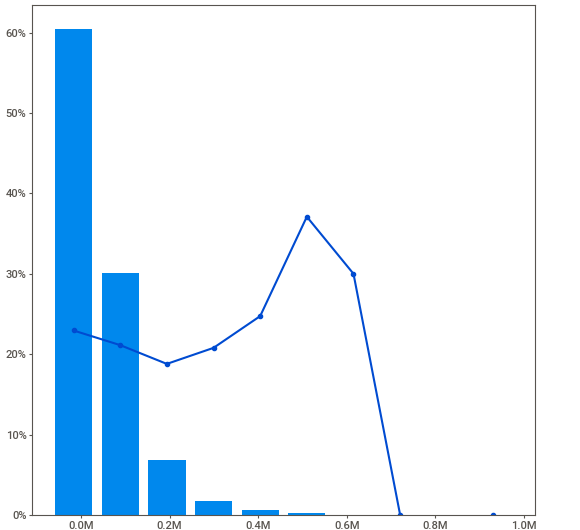
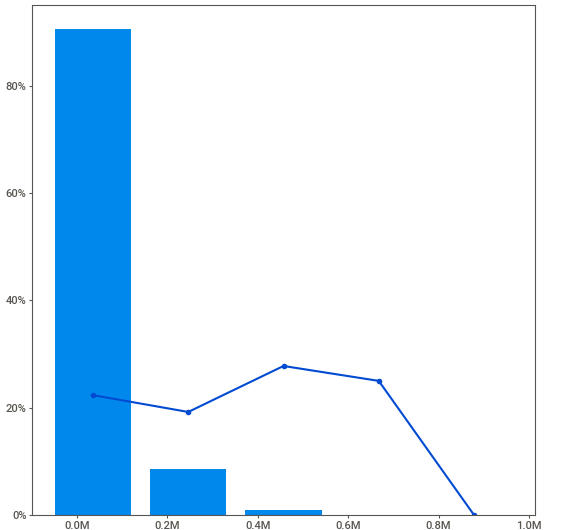
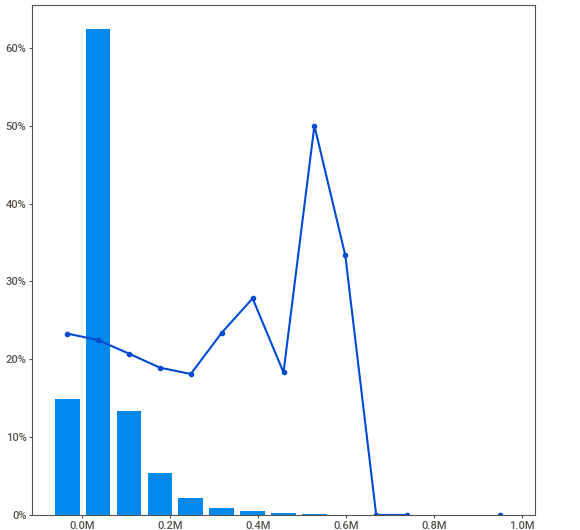
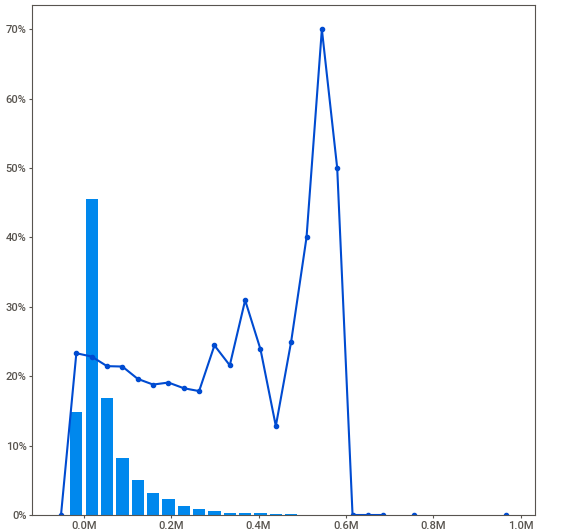
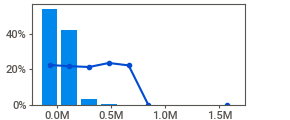
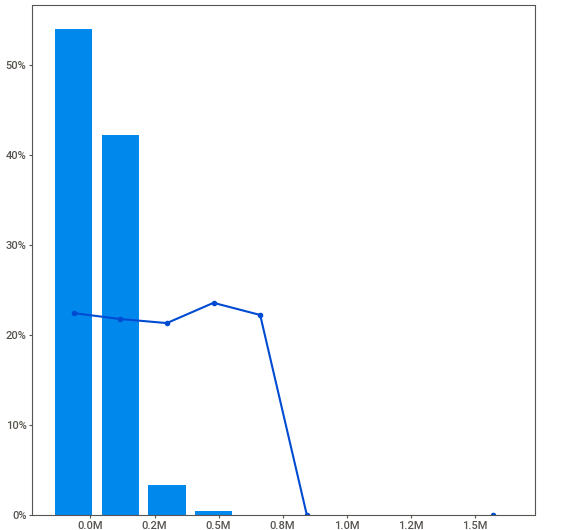
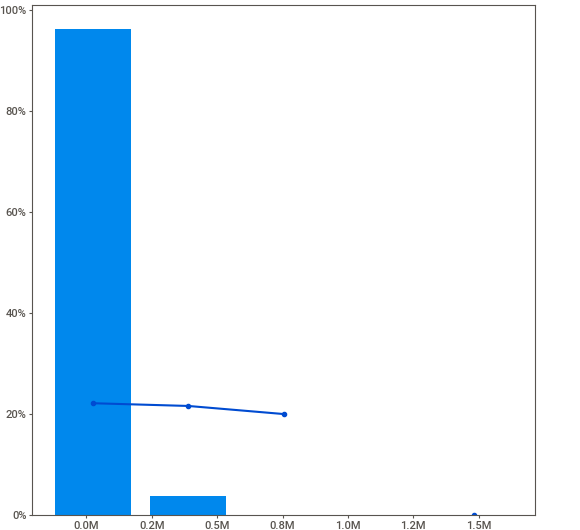
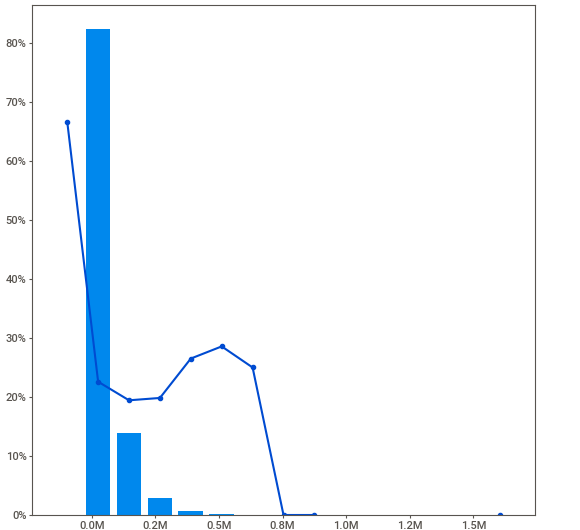
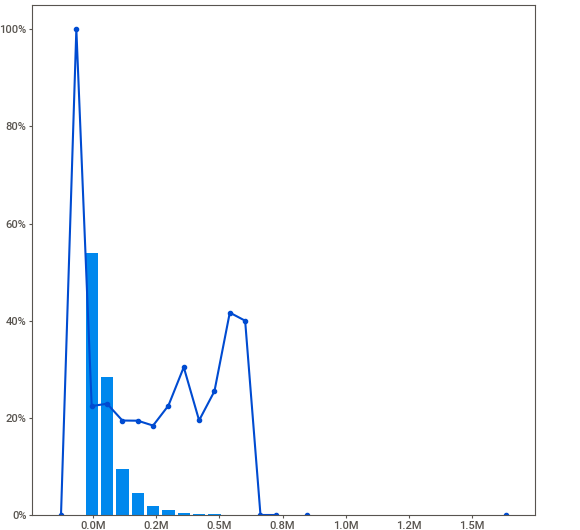
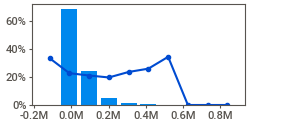
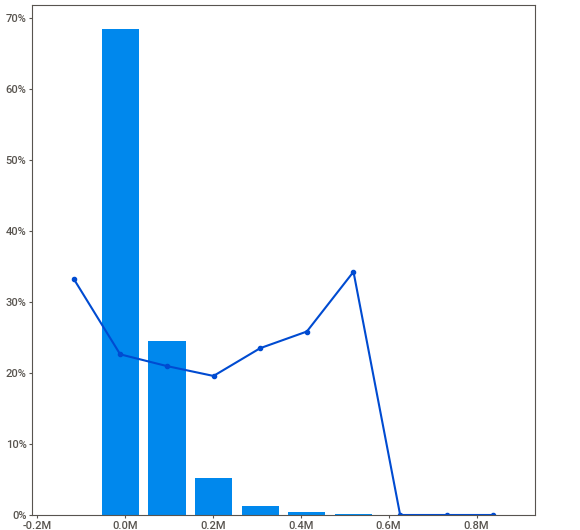
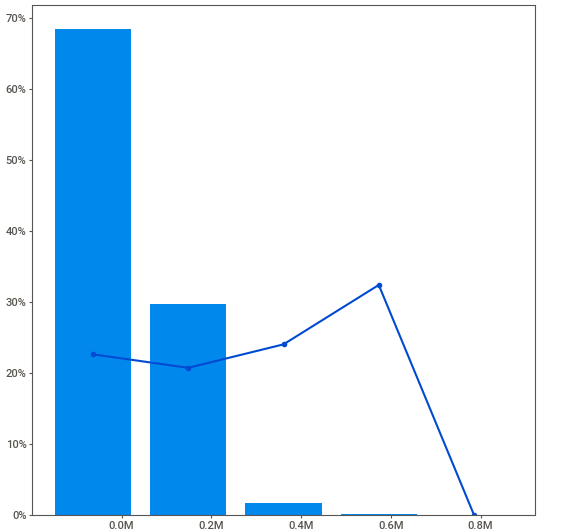
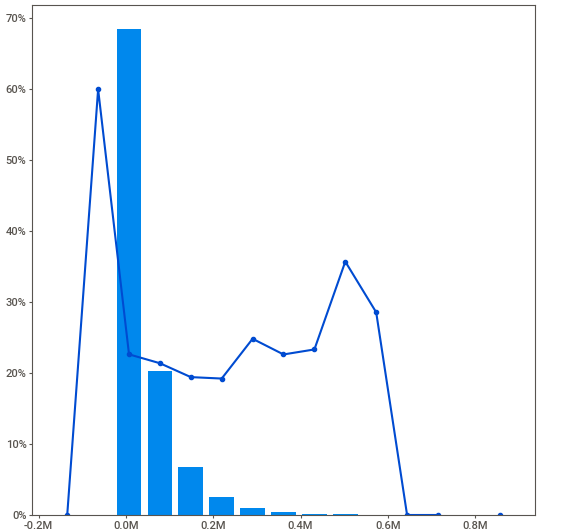
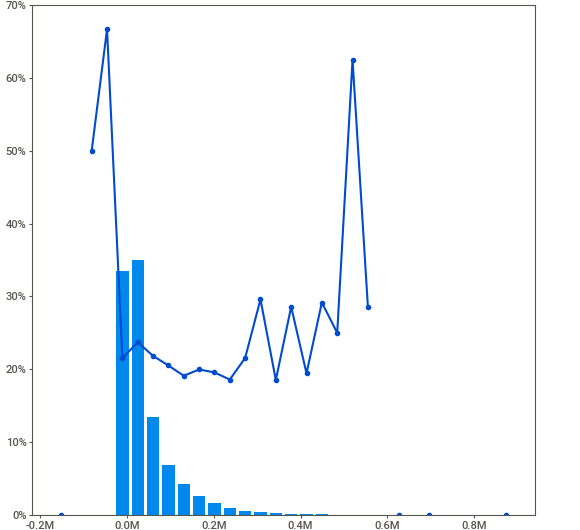
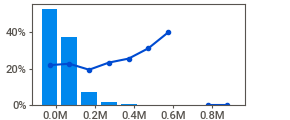
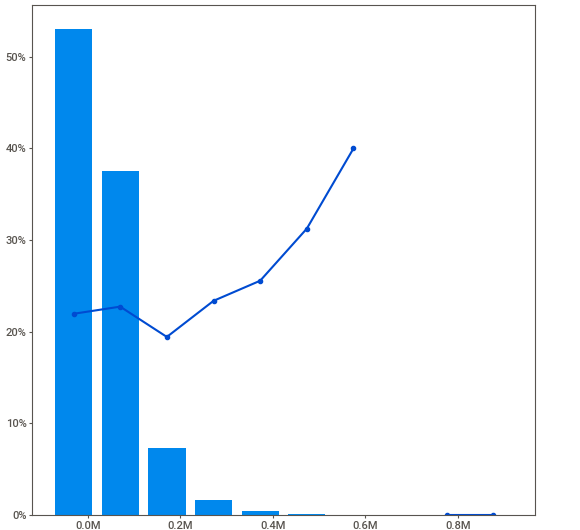
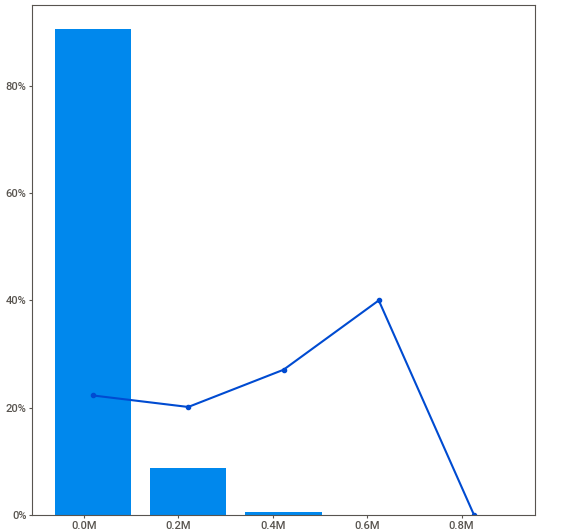
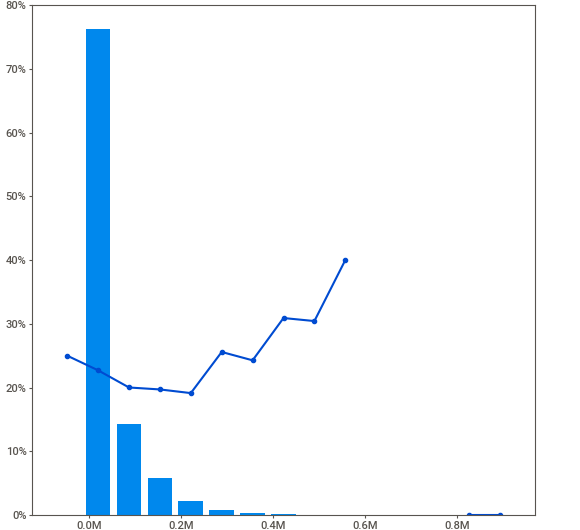
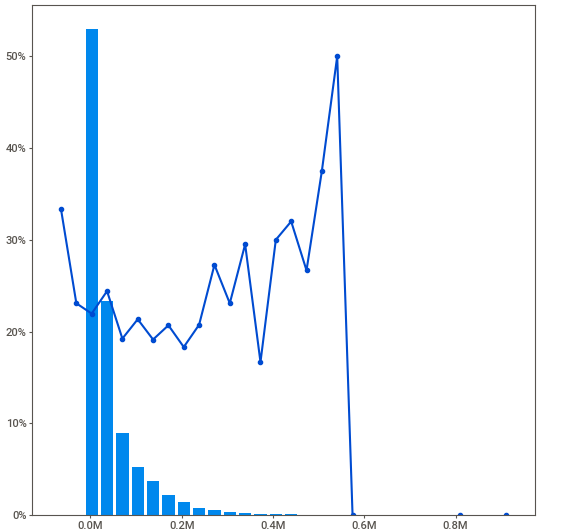
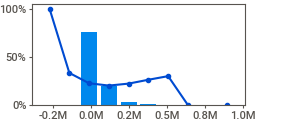
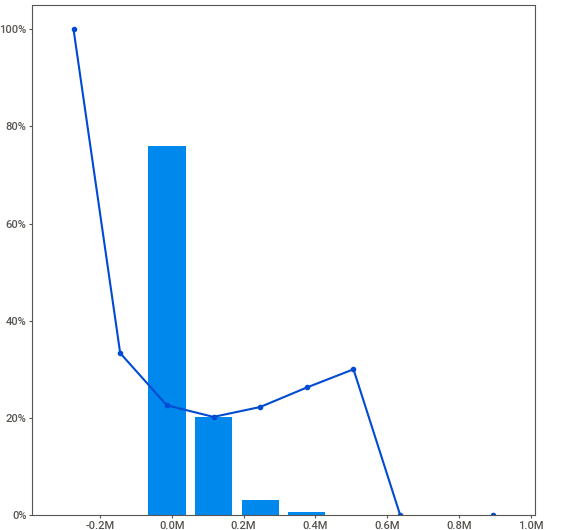
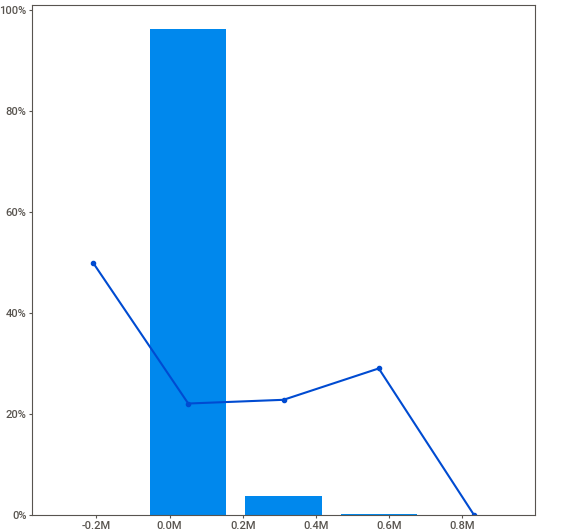
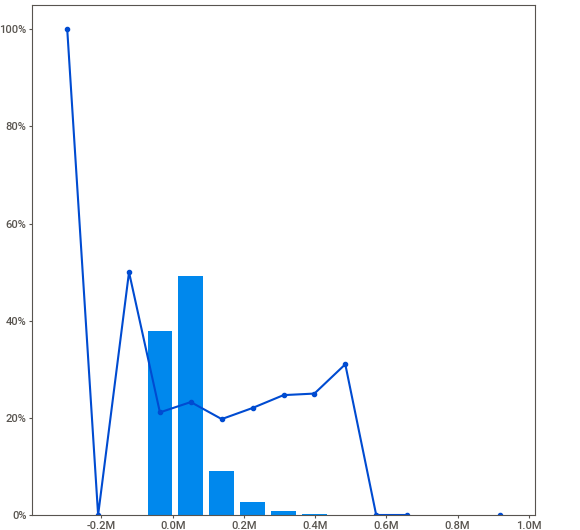
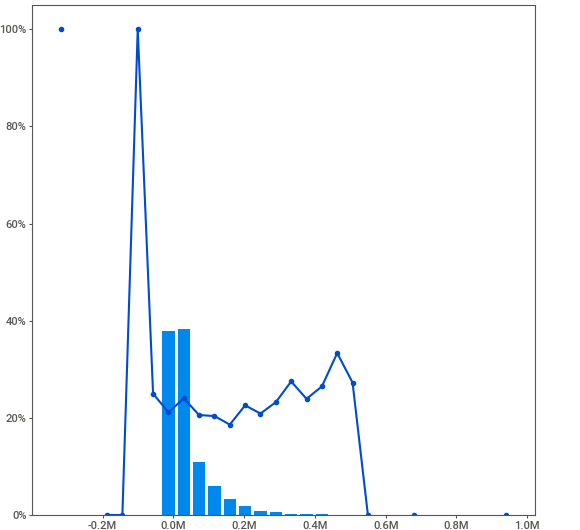
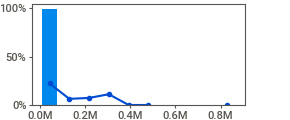
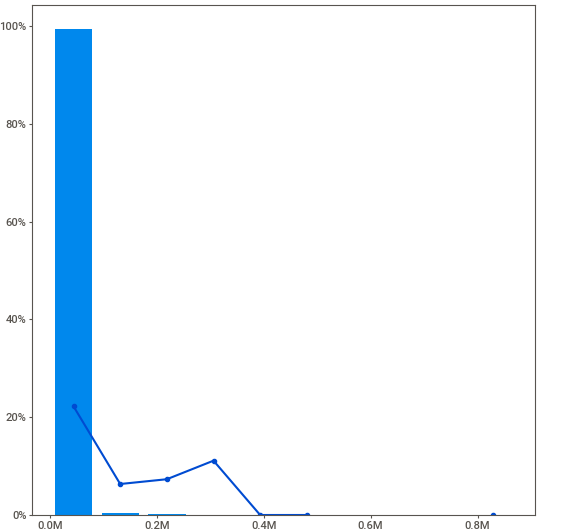
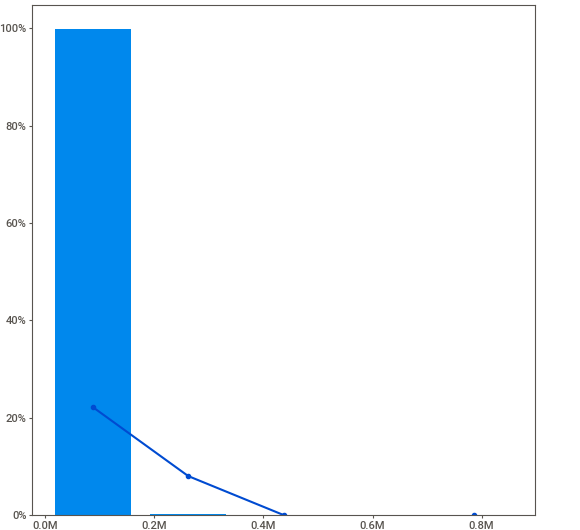
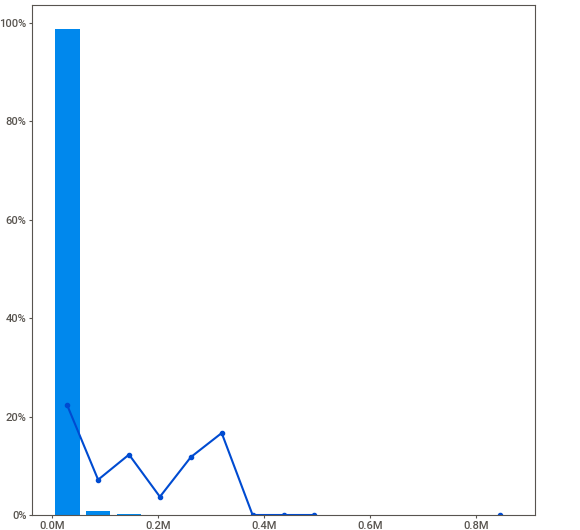
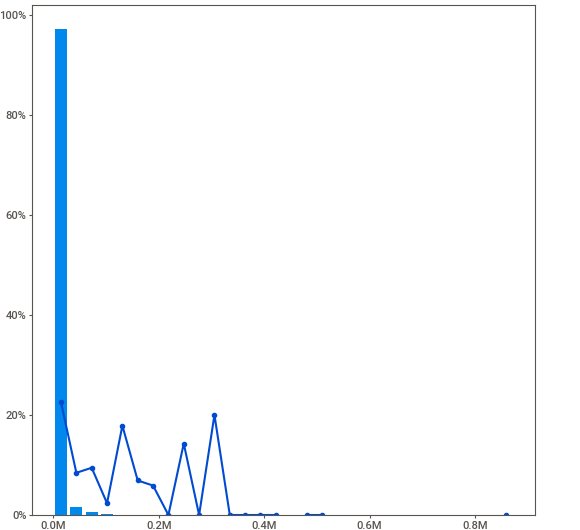
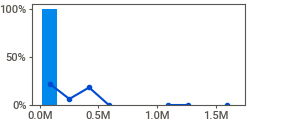
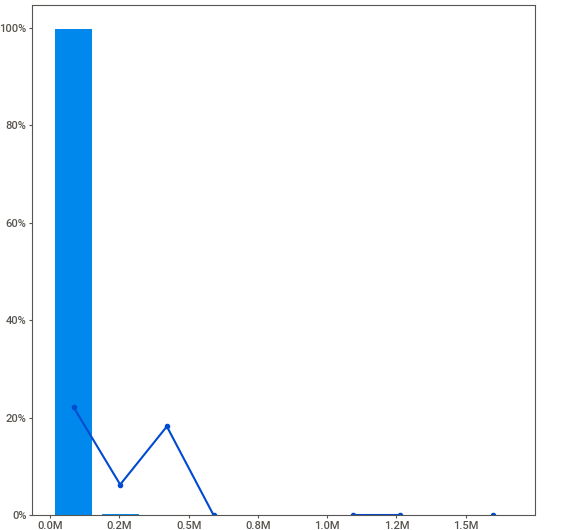
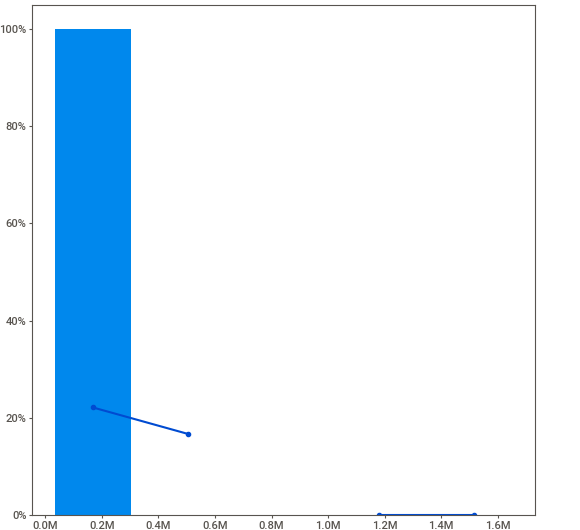
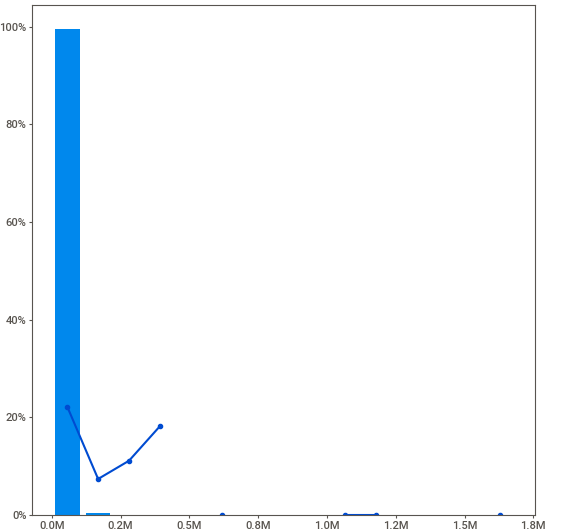
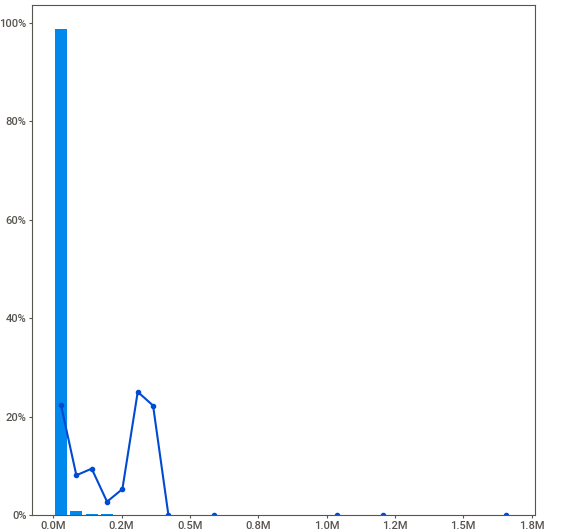
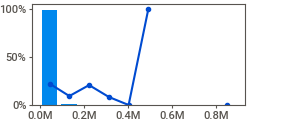
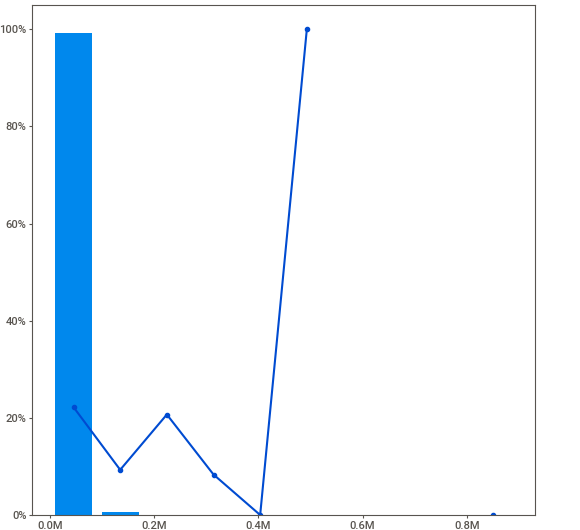
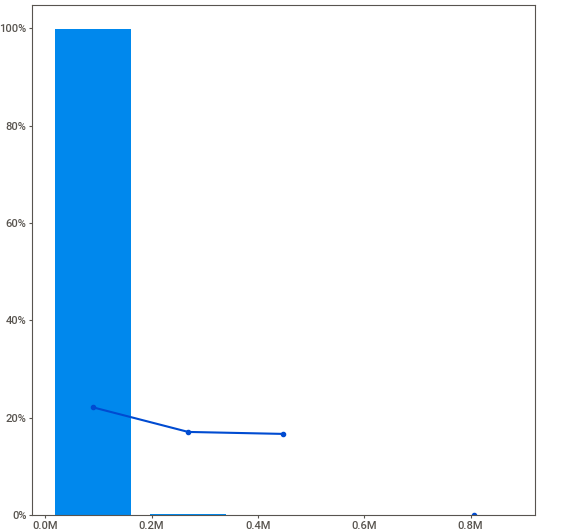
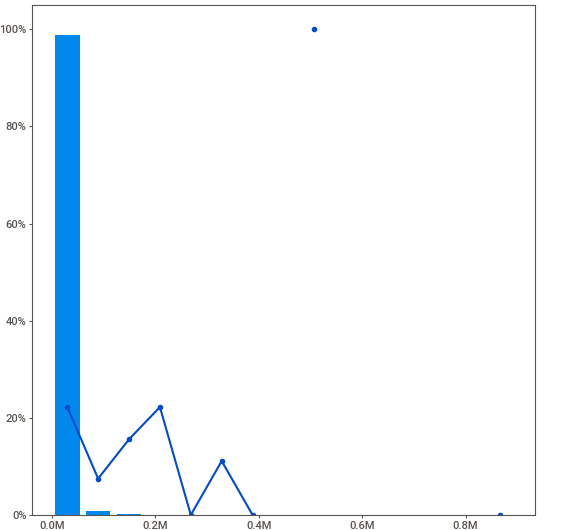
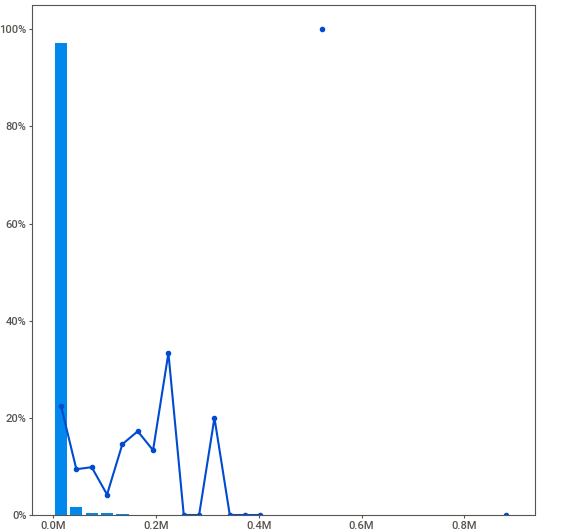
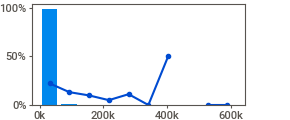
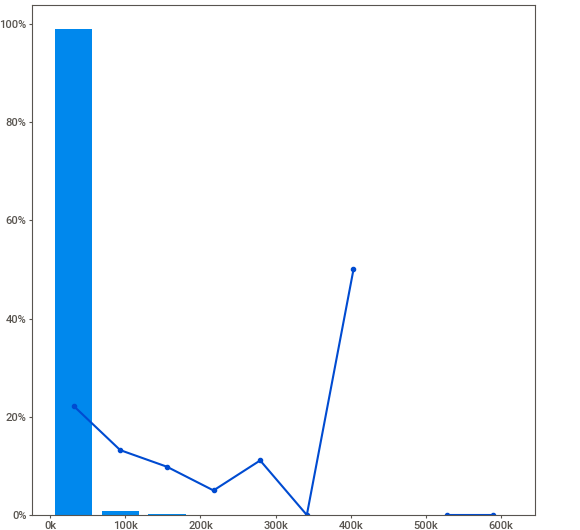
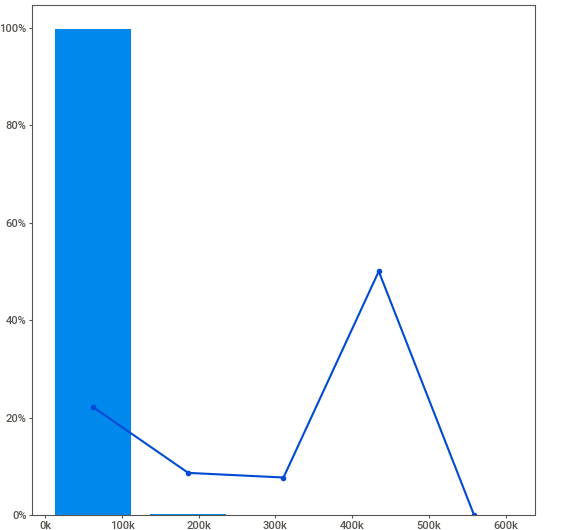
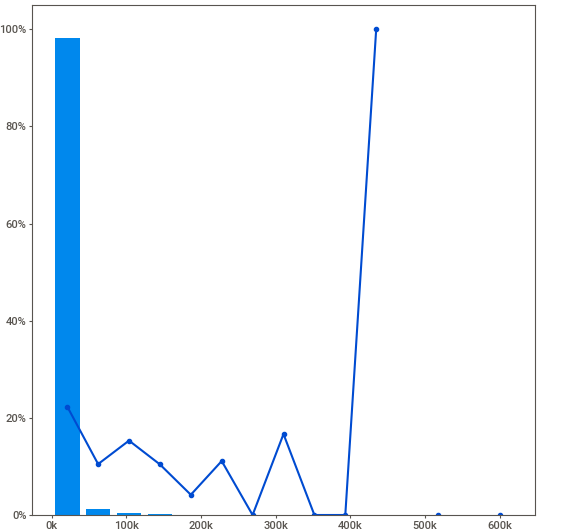
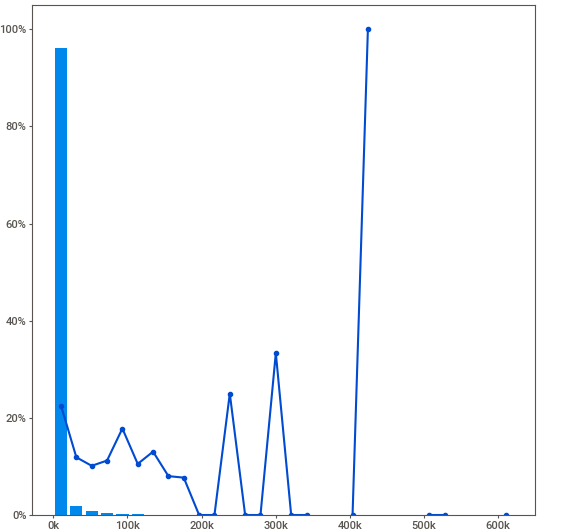
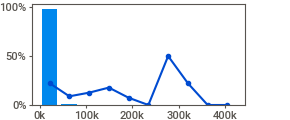
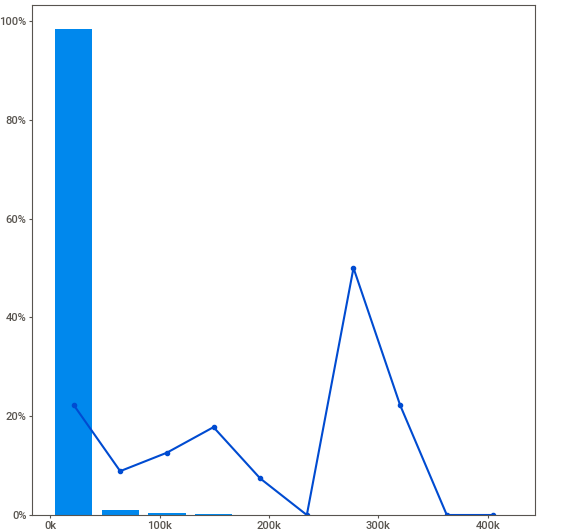
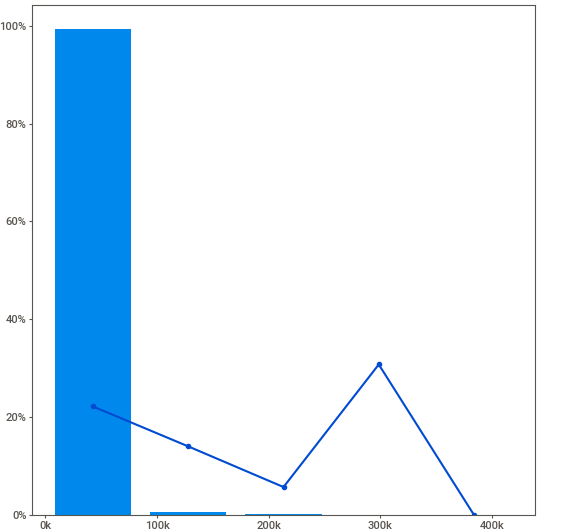
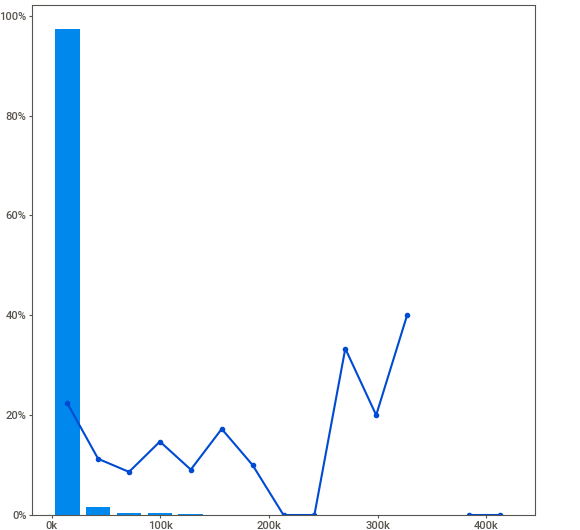
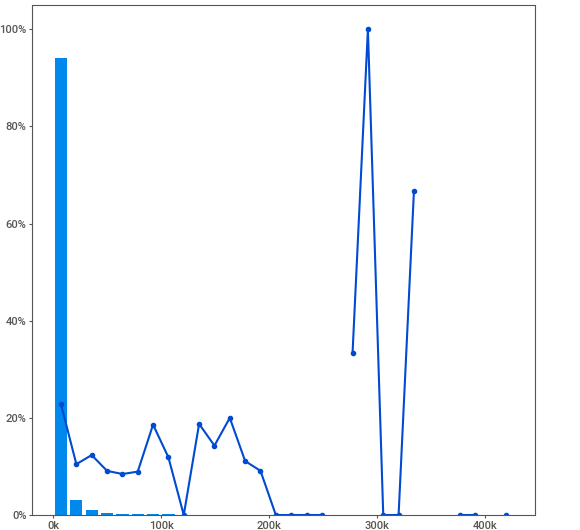
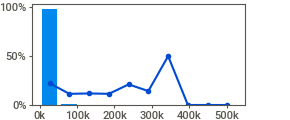
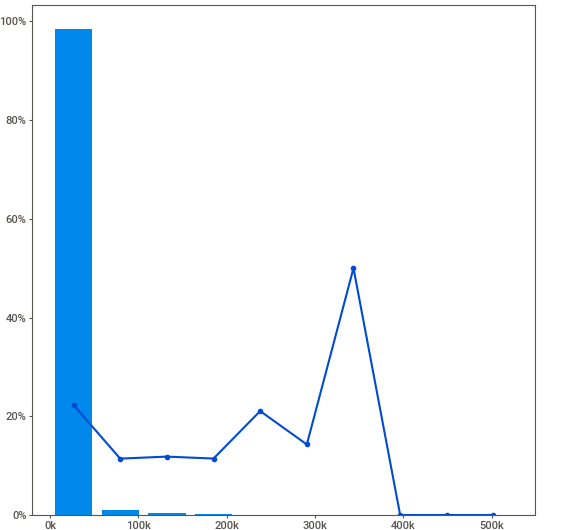
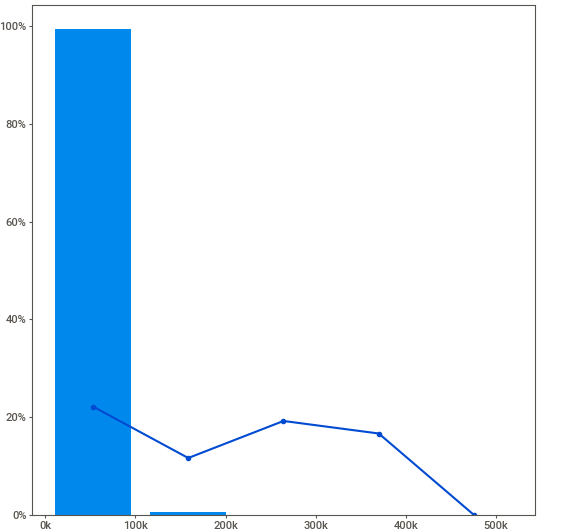
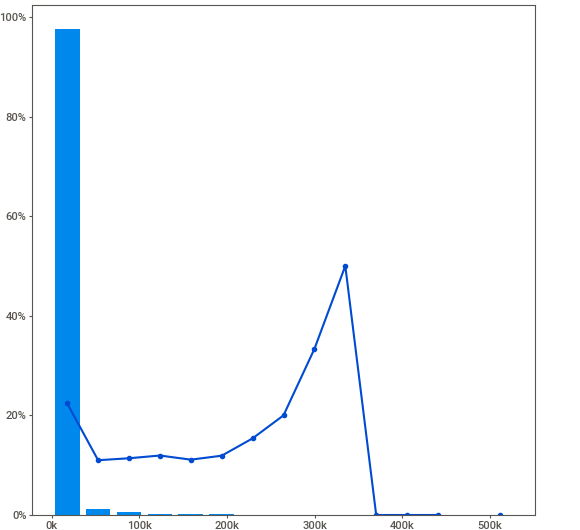
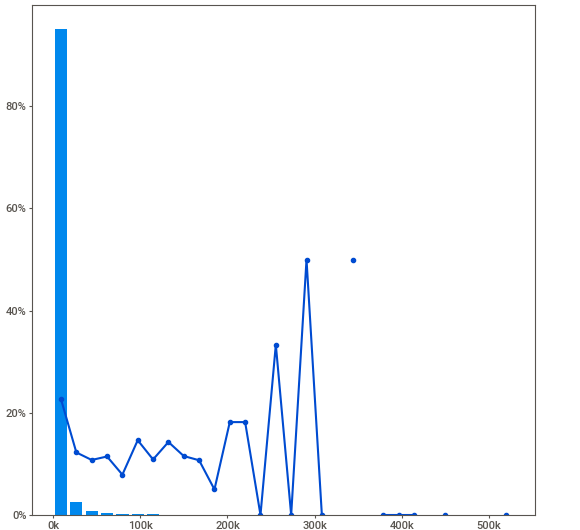
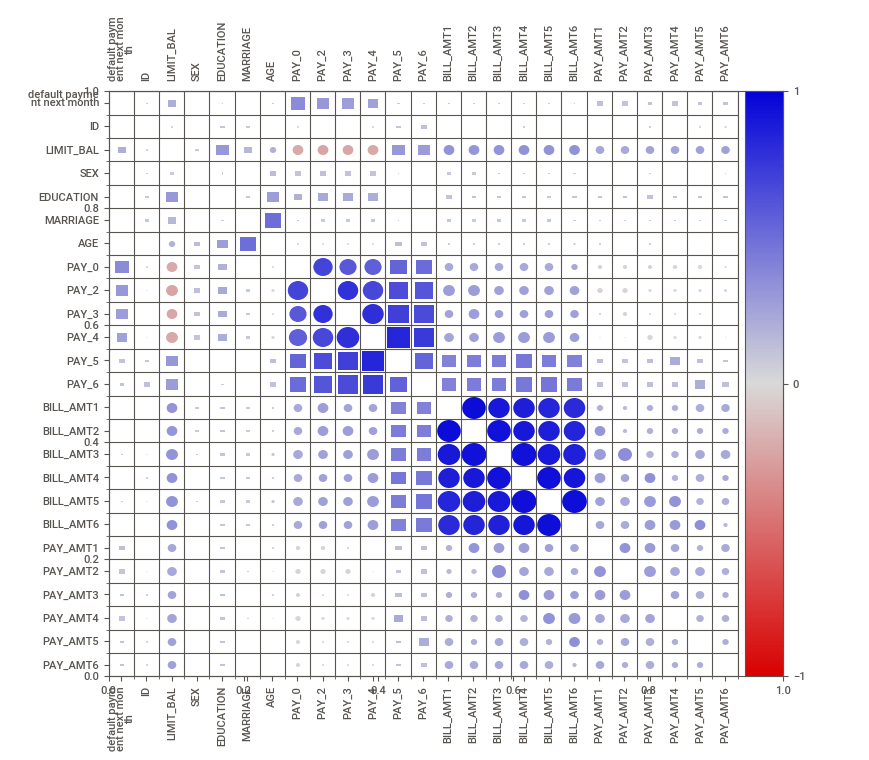
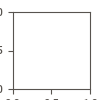

In [26]:
my_analyse.show_notebook()

# Division des données en 3 ensembles :  Entrainement , validation et test

In [27]:
from sklearn.model_selection import train_test_split
X=  df.drop(['id', 'default_payment_next_month'], axis=1)
y = df['default_payment_next_month']

X_train, X_temp , y_train ,  y_temp = train_test_split(X, y , test_size = 0.4 , random_state=42 , stratify=y)
X_val , X_test , y_val,y_test = train_test_split(X_temp , y_temp , test_size= 0.5 , stratify=y_temp , random_state=42)

print(X_train.shape , y_train.shape)
print(X_val.shape , y_val.shape)
print(X_test.shape , y_test.shape)

print(y.value_counts(normalize=True).values)
print(y_train.value_counts(normalize=True).values)
print(y_val.value_counts(normalize=True).values)
print(y_test.value_counts(normalize=True).values)

(18000, 23) (18000,)
(6000, 23) (6000,)
(6000, 23) (6000,)
[0.7788 0.2212]
[0.77877778 0.22122222]
[0.77883333 0.22116667]
[0.77883333 0.22116667]


In [28]:
X_train.isna().sum()

limit_bal               0
sex                     0
education               0
marriage                0
age                     0
payment_status_sep      0
payment_status_aug      0
payment_status_jul      0
payment_status_jun      0
payment_status_may      0
payment_status_apr      0
bill_statement_sep      0
bill_statement_aug      0
bill_statement_jul      0
bill_statement_jun      0
bill_statement_may      0
bill_statement_apr      0
previous_payment_sep    0
previous_payment_aug    0
previous_payment_jul    0
previous_payment_jun    0
previous_payment_may    0
previous_payment_apr    0
dtype: int64

# Pipeline de modelisation

In [29]:
cat_features = ['sex', 'education', 'marriage']
num_features = [ c for c  in X_train.columns if c not in cat_features]
num_features

['limit_bal',
 'age',
 'payment_status_sep',
 'payment_status_aug',
 'payment_status_jul',
 'payment_status_jun',
 'payment_status_may',
 'payment_status_apr',
 'bill_statement_sep',
 'bill_statement_aug',
 'bill_statement_jul',
 'bill_statement_jun',
 'bill_statement_may',
 'bill_statement_apr',
 'previous_payment_sep',
 'previous_payment_aug',
 'previous_payment_jul',
 'previous_payment_jun',
 'previous_payment_may',
 'previous_payment_apr']

In [30]:
import sklearn
print(sklearn.__version__)

1.4.2


In [31]:

cat_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder())
])
num_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])


preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_features),
        ('cat', cat_transformer, cat_features)
    ]
)

rf_model = RandomForestClassifier(random_state=42)


pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', rf_model)
])


pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['limit_bal', 'age',
                                                   'payment_status_sep',
                                                   'payment_status_aug',
                                                   'payment_status_jul',
                                                   'payment_status_jun',
                                                   'payment_status_may',
                                                   'payment_status_apr',
                                                   'bill_statement_sep',
                                                   'bill_statement_aug',
                                                   'bill_statement_jul',
                                                   'bill_statement_jun',
                                                   'bill_statement_may',
                                                   'bill_statement_apr',
                                                   'previous_payment_sep',
                                                   'previous_payment_aug',
                                                   'previous_payment_jul',
                                                   'previous_payment_jun',
                                                   'previous_payment_may',
                                                   'previous_payment_apr']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder())]),
                                                  ['sex', 'education',
                                                   'marriage'])])),
                ('model', RandomForestClassifier(random_state=42))])

In [32]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['limit_bal', 'age',
                                                   'payment_status_sep',
                                                   'payment_status_aug',
                                                   'payment_status_jul',
                                                   'payment_status_jun',
                                                   'payment_status_may',
                                                   'payment_status_apr',
                                                   'bill_statement_sep',
                                                   'bill_statement_aug',
                                                   'bill_statement_jul',
                                                   'bill_statement_jun',
                                                   'bill_statement_may',
                                                   'bill_statement_apr',
                                                   'previous_payment_sep',
                                                   'previous_payment_aug',
                                                   'previous_payment_jul',
                                                   'previous_payment_jun',
                                                   'previous_payment_may',
                                                   'previous_payment_apr']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder())]),
                                                  ['sex', 'education',
                                                   'marriage'])])),
                ('model', RandomForestClassifier(random_state=42))])

{'accuracy': 0.8081666666666667,
 'precision': 0.625,
 'recall': 0.3315749811605124,
 'specificity': 0.9435052428846565,
 'f1_score': 0.43328409650418515,
 'cohens_kappa': 0.33065725464411044,
 'matthews_corr_coeff': 0.35475816803994553,
 'roc_auc': 0.7601369989151875,
 'pr_auc': 0.5171804440586341,
 'average_precision': 0.5138394330459053}

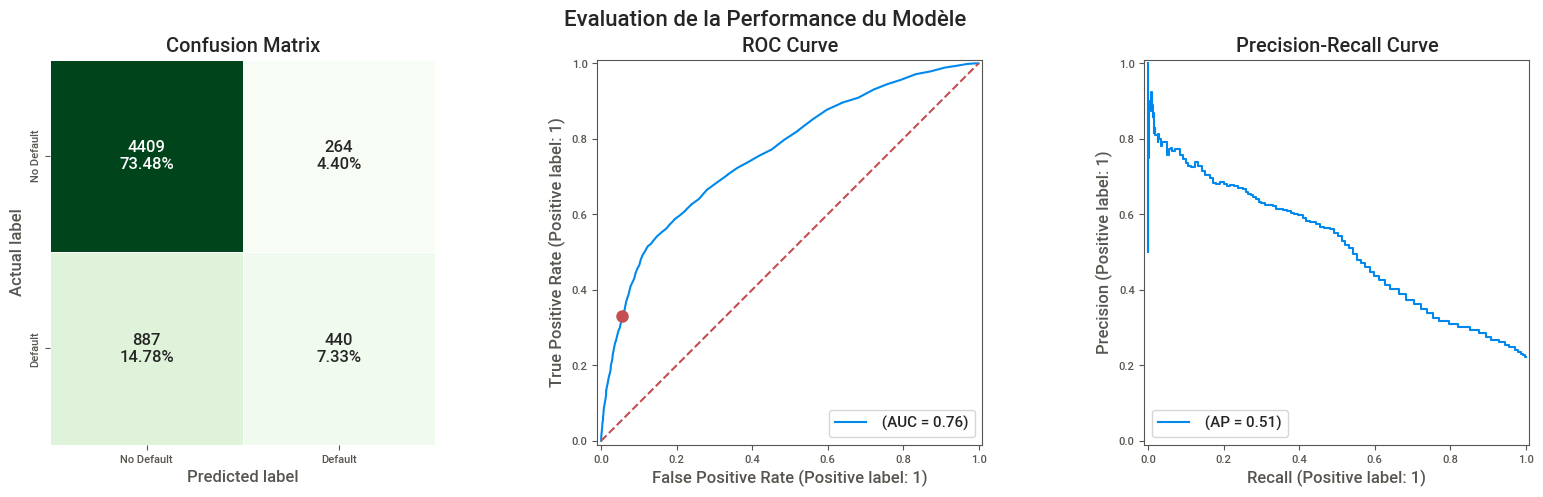

In [40]:
LABELS = ['No Default' , 'Default']
performance_evaluation_report ( pipeline , X_val ,y_val, labels=LABELS,
    show_plot=True , show_pr_curve = True)


## Reglage des Hyperparametres avec une recherche par grille(Grid Search)

In [42]:
k_fold = StratifiedKFold(5 , shuffle=True , random_state=42) #objet de validation croisée

In [45]:
scores_cv = cross_val_score(pipeline , X_train , y_train , cv=k_fold , scoring='roc_auc') 

In [46]:
print(scores_cv)

[0.76734869 0.76284799 0.76150367 0.74857531 0.76136184]


In [47]:
print(np.mean(scores_cv))
print(np.std(scores_cv))

0.7603274984178421
0.00626445887647649


In [48]:
param_grid = {
    "model__criterion":["entropy", "gini"],
    "model__max_depth":range(7,11),
    "model__n_estimators":[100,150,200]
}

classifier_gs = GridSearchCV(
    pipeline, param_grid, scoring = 'roc_auc',
    cv=k_fold , n_jobs=-1
)

classifier_gs.fit(X_train , y_train)

print(classifier_gs.best_params_)
print("Meilleur AUC sur le train set : ", classifier_gs.best_params_)
print("Meilleur AUC sur les données  de validation:", metrics.roc_auc_score(y_val, classifier_gs.predict(X_val)))


{'model__criterion': 'entropy', 'model__max_depth': 9, 'model__n_estimators': 200}
Meilleur AUC sur le train set :  {'model__criterion': 'entropy', 'model__max_depth': 9, 'model__n_estimators': 200}
Meilleur AUC sur les données  de validation: 0.6347168094027628


In [49]:
classifier_gs

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['limit_bal',
                                                                          'age',
                                                                          'payment_status_sep',
                                                                          'payment_status_aug',
                                                                          'payment_status_jul',
                                                                          'payment_status_jun',
                                                                          'payment_status_may',
                                                                          'payment_status_apr',
                                                                          'bill...
                                                                          'previous_payment_jun',
                                                                          'previous_payment_may',
                                                                          'previous_payment_apr']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('onehot',
                                                                                          OneHotEncoder())]),
                                                                         ['sex',
                                                                          'education',
                                                                          'marriage'])])),
                                       ('model',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'model__criterion': ['entropy', 'gini'],
                         'model__max_depth': range(7, 11),
                         'model__n_estimators': [100, 150, 200]},
             scoring='roc_auc')

In [50]:
best_model = classifier_gs.best_estimator_

best_model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['limit_bal', 'age',
                                                   'payment_status_sep',
                                                   'payment_status_aug',
                                                   'payment_status_jul',
                                                   'payment_status_jun',
                                                   'payment_status_may',
                                                   'payment_status_apr',
                                                   'bill_statement_sep',
                                                   'bill_statement_aug',
                                                   'bill_statement_jul',
                                                   'bill_statement_jun',
                                                   'bil...',
                                                   'bill_statement_apr',
                                                   'previous_payment_sep',
                                                   'previous_payment_aug',
                                                   'previous_payment_jul',
                                                   'previous_payment_jun',
                                                   'previous_payment_may',
                                                   'previous_payment_apr']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder())]),
                                                  ['sex', 'education',
                                                   'marriage'])])),
                ('model',
                 RandomForestClassifier(criterion='entropy', max_depth=9,
                                        n_estimators=200, random_state=42))])

{'accuracy': 0.8213333333333334,
 'precision': 0.6872246696035242,
 'recall': 0.35267520723436324,
 'specificity': 0.9544190027819388,
 'f1_score': 0.46613545816733065,
 'cohens_kappa': 0.37191339670055334,
 'matthews_corr_coeff': 0.4018060106588066,
 'roc_auc': 0.7827271289104737,
 'pr_auc': 0.5683104291546182,
 'average_precision': 0.5685597967028445}

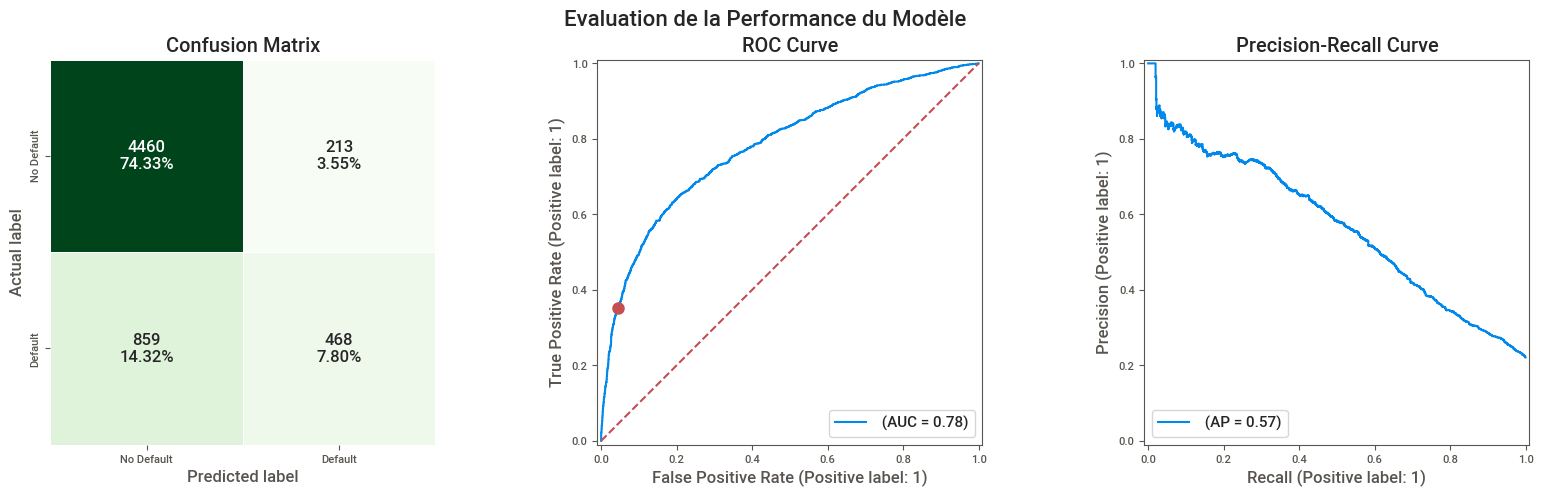

In [51]:
performance_evaluation_report(
   best_model , X_test , y_test , labels=LABELS,
   show_plot=True , show_pr_curve=True
)

## Enregistrement de mon modele 

In [52]:
import joblib

In [53]:
joblib.dump ( best_model, "best_model.pkl")

['best_model.pkl']

## Utilisation du modèle

In [75]:
def make_prediction(model , features):
    prediction = model.predict(features)
    probability = model.predict_proba(features)
    probability= np.round(probability*100, 2)

    return prediction , probability

In [70]:
new_data = X_train.head(5) #prendre 5 clients aléatoires du X_train

new_data

limit_bal     sex        education marriage  age payment_status_sep  \
28831     180000  Female      High school  Married   31                  0   
24438     320000    Male  Graduate school   Single   32                 -1   
555       630000  Female       University  Married   47                  0   
13346     210000  Female  Graduate school  Married   23                 -2   
1575      230000  Female       University   Single   25                  0   

      payment_status_aug payment_status_jul payment_status_jun  \
28831                  0                  0                  0   
24438                 -1                 -1                  0   
555                    0                  0                 -1   
13346                 -2                 -2                 -1   
1575                   0                  0                  0   

      payment_status_may  ... bill_statement_jul  bill_statement_jun  \
28831                  0  ...              71298               72729   
24438                 -1  ...              20012               34438   
555                   -1  ...               1207                2632   
13346                  0  ...                  0               29337   
1575                   0  ...              93143               87654   

       bill_statement_may  bill_statement_apr  previous_payment_sep  \
28831               73627               75086                  3100   
24438                1082                8807                     0   
555                  8654                   0                 38187   
13346               30362               31356                     0   
1575                90172               86850                  4500   

       previous_payment_aug  previous_payment_jul  previous_payment_jun  \
28831                  3200                  3210                  2700   
24438                 20012                 15000                  1082   
555                    1207                  2632                  8654   
13346                     0                 29337                  1500   
1575                   4114                  3500                  4000   

       previous_payment_may  previous_payment_apr  
28831                  2800                  3000  
24438                  8807                   787  
555                       0                  4981  
13346                  1500                  1500  
1575                   3000                  3000  

[5 rows x 23 columns]

In [76]:
loaded_model = joblib.load('best_model.pkl')

In [72]:
#prediction sur les 5 clients aléatoires
make_prediction(loaded_model, new_data)

(array([0, 0, 0, 0, 0], dtype=int64),
 array([[92.4 ,  7.6 ],
        [87.18, 12.82],
        [91.35,  8.65],
        [81.39, 18.61],
        [86.27, 13.73]]))

In [79]:
y_train.head(5)

28831    0
24438    0
555      0
13346    1
1575     0
Name: default_payment_next_month, dtype: category
Categories (2, int64): [0, 1]

In [80]:
make_prediction(loaded_model ,new_data)

(array([0, 0, 0, 0, 0], dtype=int64),
 array([[92.4 ,  7.6 ],
        [87.18, 12.82],
        [91.35,  8.65],
        [81.39, 18.61],
        [86.27, 13.73]]))

d'apres les resultats on se rend compte que sur le y_train , la 4e personne est en defaut de paiement par contre lorsque on execute le meme modele sur les memes données d'entrainement , la 4e personne n'est pas en defaut de paiement